In [1]:
ARCHITECTURE = 'ResNet'
EXPERIMENT_TYPE = 'fixed-eps'
ITERATIONS = 2

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tqdm import tqdm
import matplotlib.pyplot as plt
import pathlib
import os
import random
from secrets import randbelow
import foolbox as fb
from datetime import datetime

AUTOTUNE = tf.data.experimental.AUTOTUNE
tf.keras.backend.clear_session()  # For easy reset of notebook state.
#tf.config.experimental_run_functions_eagerly(True)
tf.__version__
#tf.executing_eagerly()


'2.2.0'

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 9.5)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [ ]:

tf.get_logger().setLevel('ERROR')

  0%|          | 0/2 [00:00<?, ?it/s]

74/74 [==============================] - 12s 168ms/step - loss: 2.3484 - accuracy: 0.2369 - val_loss: 2.3087 - val_accuracy: 0.1187



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 1.9414 - accuracy: 0.3129 - val_loss: 2.2705 - val_accuracy: 0.1893 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 168ms/step - loss: 1.7040 - accuracy: 0.4108 - val_loss: 2.4897 - val_accuracy: 0.1513 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 1.5577 - accuracy: 0.4720 - val_loss: 2.1932 - val_accuracy: 0.1946 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 1.4608 - accuracy: 0.5114 - val_loss: 2.2432 - val_accuracy: 0.2390 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 1.3382 - accuracy: 0.5466 - val_loss: 1.8694 - val_accuracy: 0.3417 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 1.2383 - accuracy: 0.5853 - val_loss: 2.3469 - val_accuracy: 0.3297 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

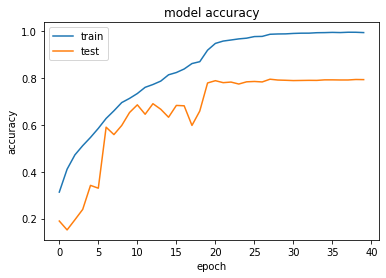

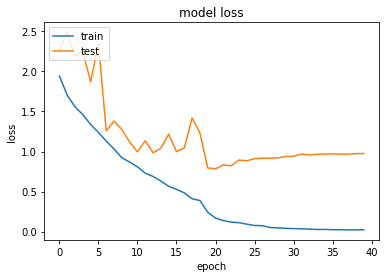

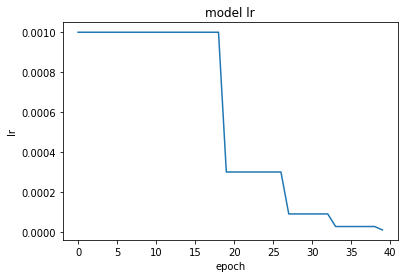

starting bb0 09:08:52
bb0 batch 0 09:08:52
bb0 batch 1 09:20:40
bb0 batch 2 09:32:33
bb0 batch 3 09:44:24
ending bb0 09:56:13
starting pgd 09:56:13
pgd batch 0 09:56:13
pgd batch 1 09:56:34
pgd batch 2 09:56:55
pgd batch 3 09:57:15
ending pgd 09:57:36
starting cw 09:57:36
cw batch 0 09:57:36
cw batch 1 10:04:34
cw batch 2 10:11:32
cw batch 3 10:18:29



1it [1:25:20, 5120.22s/it]

ending cw 10:25:27
current pruning ratio is0.5, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 0.5087 - accuracy: 0.8359 - val_loss: 2.6522 - val_accuracy: 0.1934 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.3573 - accuracy: 0.8817 - val_loss: 1.5941 - val_accuracy: 0.5175 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2895 - accuracy: 0.9031 - val_loss: 1.2479 - val_accuracy: 0.6413 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2811 - accuracy: 0.9067 - val_loss: 1.2328 - val_accuracy: 0.6561 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2373 - accuracy: 0.9203 - val_loss: 1.2110 - val_accuracy: 0.7004 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2230 - accuracy: 0.9238 - val_loss: 1.0276 - val_accuracy: 0.7417 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

Epoch 52/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0040 - accuracy: 0.9997 - val_loss: 1.1355 - val_accuracy: 0.8036 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 1.1363 - val_accuracy: 0.8020 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0057 - accuracy: 0.9989 - val_loss: 1.1345 - val_accuracy: 0.8008 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 1.1393 - val_accuracy: 0.8008 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 1.1455 - val_accuracy: 0.8005 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 1.1468 - val_accuracy: 0.8018 - lr: 1.0000e-05
Epoch 58/100
74/74 [========

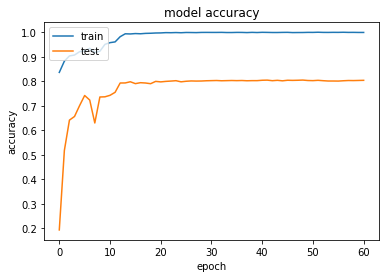

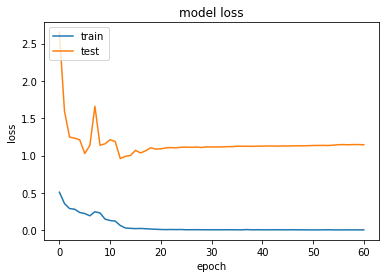

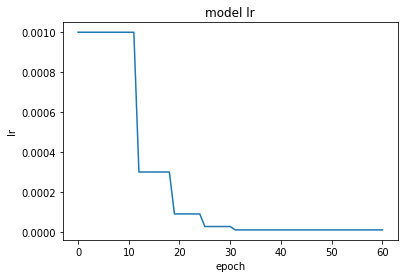

starting bb0 10:38:35
bb0 batch 0 10:38:35
bb0 batch 1 10:50:24
bb0 batch 2 11:02:19
bb0 batch 3 11:14:11
ending bb0 11:25:56
starting pgd 11:25:56
pgd batch 0 11:25:56
pgd batch 1 11:26:17
pgd batch 2 11:26:37
pgd batch 3 11:26:58
ending pgd 11:27:19
starting cw 11:27:19
cw batch 0 11:27:19
cw batch 1 11:34:17
cw batch 2 11:41:15
cw batch 3 11:48:15



2it [2:55:07, 5200.39s/it]

ending cw 11:55:14
current pruning ratio is0.75, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.6713 - accuracy: 0.7824 - val_loss: 2.7296 - val_accuracy: 0.1203 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 168ms/step - loss: 0.3951 - accuracy: 0.8662 - val_loss: 2.7693 - val_accuracy: 0.1674 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 0.3292 - accuracy: 0.8894 - val_loss: 1.8642 - val_accuracy: 0.4741 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2420 - accuracy: 0.9166 - val_loss: 1.2611 - val_accuracy: 0.6571 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2233 - accuracy: 0.9242 - val_loss: 1.1387 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2021 - accuracy: 0.9317 - val_loss: 1.0044 - val_accuracy: 0.7434 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

Epoch 52/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 1.2057 - val_accuracy: 0.8013 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 1.2032 - val_accuracy: 0.8015 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 1.2073 - val_accuracy: 0.8010 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0052 - accuracy: 0.9988 - val_loss: 1.2086 - val_accuracy: 0.8005 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 1.2034 - val_accuracy: 0.8003 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 1.2075 - val_accuracy: 0.8010 - lr: 1.0000e-05
Epoch 58/100
74/74 [========

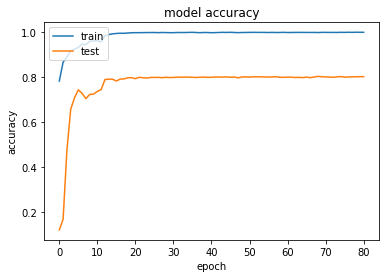

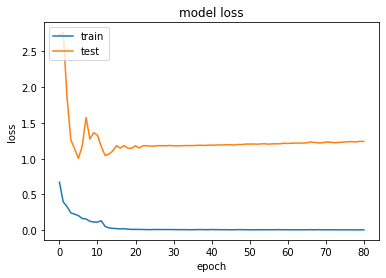

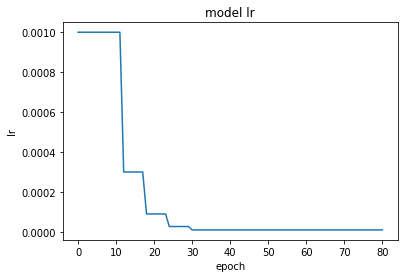

starting bb0 12:12:25
bb0 batch 0 12:12:25
bb0 batch 1 12:24:27
bb0 batch 2 12:36:35
bb0 batch 3 12:48:30
ending bb0 13:00:28
starting pgd 13:00:28
pgd batch 0 13:00:28
pgd batch 1 13:00:48
pgd batch 2 13:01:09
pgd batch 3 13:01:30
ending pgd 13:01:51
starting cw 13:01:51
cw batch 0 13:01:51
cw batch 1 13:14:13
cw batch 2 13:21:12
cw batch 3 13:32:48



3it [4:39:39, 5521.84s/it]

ending cw 13:39:46
current pruning ratio is0.875, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.8836 - accuracy: 0.7164 - val_loss: 2.6446 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 0.5244 - accuracy: 0.8221 - val_loss: 2.2086 - val_accuracy: 0.3338 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.4091 - accuracy: 0.8588 - val_loss: 1.1038 - val_accuracy: 0.6701 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.3278 - accuracy: 0.8900 - val_loss: 1.1256 - val_accuracy: 0.6917 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2853 - accuracy: 0.9016 - val_loss: 1.1267 - val_accuracy: 0.7294 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2311 - accuracy: 0.9225 - val_loss: 1.2910 - val_accuracy: 0.7004 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

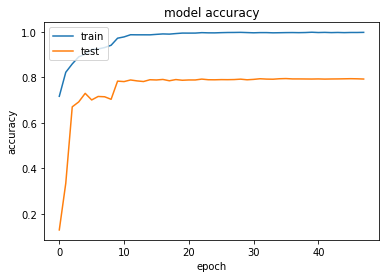

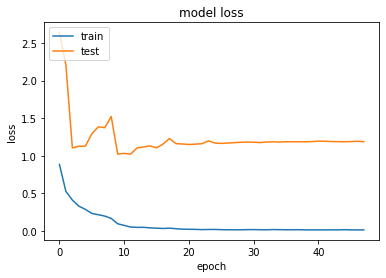

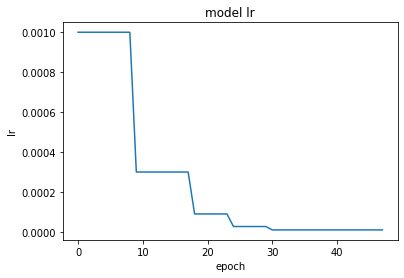

starting bb0 13:50:03
bb0 batch 0 13:50:03
bb0 batch 1 14:02:23
bb0 batch 2 14:14:39
bb0 batch 3 14:27:02
ending bb0 14:39:19
starting pgd 14:39:19
pgd batch 0 14:39:19
pgd batch 1 14:39:40
pgd batch 2 14:40:01
pgd batch 3 14:40:22
ending pgd 14:40:43
starting cw 14:40:43
cw batch 0 14:40:43
cw batch 1 14:47:46
cw batch 2 14:54:44
cw batch 3 15:01:44



4it [6:08:34, 5465.74s/it]

ending cw 15:08:41
current pruning ratio is0.9375, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.2849 - accuracy: 0.9165 - val_loss: 1.2167 - val_accuracy: 0.7037 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1467 - accuracy: 0.9536 - val_loss: 1.0364 - val_accuracy: 0.7470 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 168ms/step - loss: 0.1243 - accuracy: 0.9611 - val_loss: 1.3011 - val_accuracy: 0.7340 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 168ms/step - loss: 0.1330 - accuracy: 0.9577 - val_loss: 1.5302 - val_accuracy: 0.7004 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 168ms/step - loss: 0.1362 - accuracy: 0.9552 - val_loss: 1.5750 - val_accuracy: 0.6950 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1063 - accuracy: 0.9648 - val_loss: 1.2765 - val_accuracy: 0.7493 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 168ms/step - 

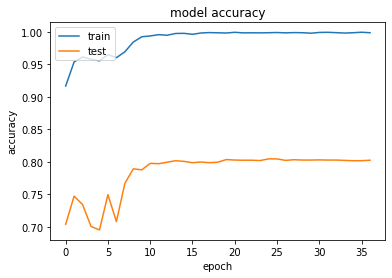

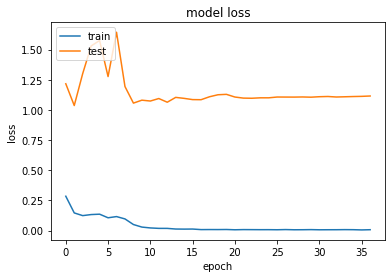

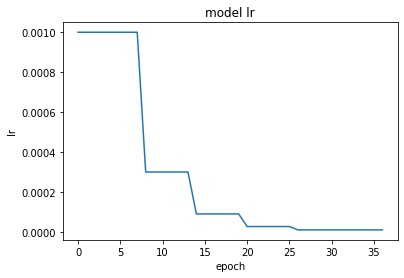

starting bb0 15:16:40
bb0 batch 0 15:16:40
bb0 batch 1 15:28:52
bb0 batch 2 15:41:06
bb0 batch 3 15:53:18
ending bb0 16:05:31
starting pgd 16:05:31
pgd batch 0 16:05:31
pgd batch 1 16:05:52
pgd batch 2 16:06:12
pgd batch 3 16:06:33
ending pgd 16:06:54
starting cw 16:06:54
cw batch 0 16:06:54
cw batch 1 16:13:52
cw batch 2 16:20:49
cw batch 3 16:27:46



5it [7:34:36, 5374.59s/it]

ending cw 16:34:43
current pruning ratio is0.96875, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 2.3068 - accuracy: 0.0980 - val_loss: 2.3116 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 166ms/step - loss: 2.3033 - accuracy: 0.1002 - val_loss: 2.3126 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3038 - accuracy: 0.0969 - val_loss: 2.3061 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3030 - accuracy: 0.0953 - val_loss: 2.3067 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3036 - accuracy: 0.0980 - val_loss: 2.3060 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3035 - accuracy: 0.0997 - val_loss: 2.3047 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/step - 

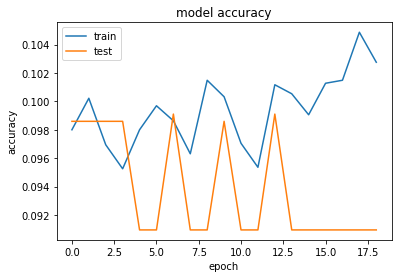

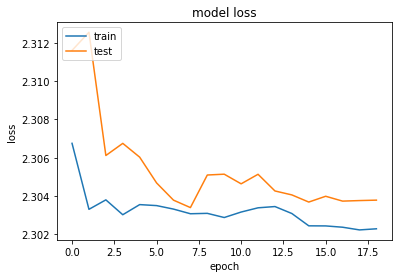

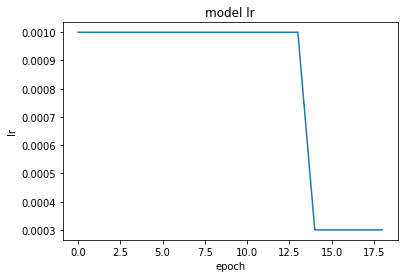

starting pgd 16:38:58
pgd batch 0 16:38:58
pgd batch 1 16:39:19
pgd batch 2 16:39:39
pgd batch 3 16:40:00
ending pgd 16:40:21
starting cw 16:40:21
cw batch 0 16:40:21
cw batch 1 16:47:18
cw batch 2 16:54:14
cw batch 3 17:01:12



6it [8:08:02, 4363.96s/it]

ending cw 17:08:08
current pruning ratio is0.984375, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 2.3031 - accuracy: 0.1011 - val_loss: 2.3034 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 167ms/step - loss: 2.3026 - accuracy: 0.1004 - val_loss: 2.3038 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3025 - accuracy: 0.1049 - val_loss: 2.3037 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 167ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 2.3039 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3023 - accuracy: 0.1049 - val_loss: 2.3037 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 167ms/step - loss: 2.3025 - accuracy: 0.0992 - val_loss: 2.3040 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/step - 

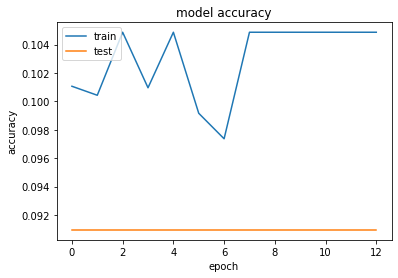

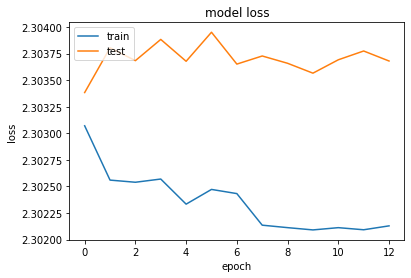

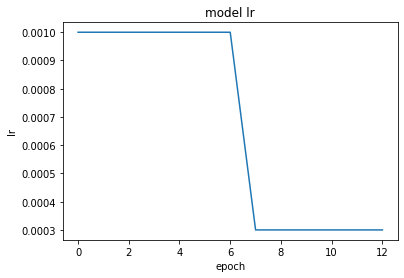

starting pgd 17:11:10
pgd batch 0 17:11:10
pgd batch 1 17:11:31
pgd batch 2 17:11:52
pgd batch 3 17:12:12
ending pgd 17:12:33
starting cw 17:12:33
cw batch 0 17:12:33
cw batch 1 17:19:32
cw batch 2 17:26:30
cw batch 3 17:33:27



7it [8:40:19, 4459.88s/it]
 50%|█████     | 1/2 [8:40:33<8:40:33, 31233.43s/it]

ending cw 17:40:25


74/74 [==============================] - 12s 167ms/step - loss: 2.4459 - accuracy: 0.2243 - val_loss: 2.3181 - val_accuracy: 0.0994



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 1.9208 - accuracy: 0.3250 - val_loss: 2.4811 - val_accuracy: 0.1001 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 167ms/step - loss: 1.7308 - accuracy: 0.4072 - val_loss: 2.8025 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 168ms/step - loss: 1.5728 - accuracy: 0.4641 - val_loss: 2.8768 - val_accuracy: 0.1608 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 1.4452 - accuracy: 0.5223 - val_loss: 2.0858 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 1.2796 - accuracy: 0.5780 - val_loss: 1.7792 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 1.2136 - accuracy: 0.6011 - val_loss: 2.0646 - val_accuracy: 0.3671 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

74/74 [==============================] - 12s 164ms/step - loss: 0.0135 - accuracy: 0.9974 - val_loss: 1.0396 - val_accuracy: 0.7885 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0156 - accuracy: 0.9966 - val_loss: 1.0416 - val_accuracy: 0.7888 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0144 - accuracy: 0.9969 - val_loss: 1.0418 - val_accuracy: 0.7890 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0159 - accuracy: 0.9960 - val_loss: 1.0405 - val_accuracy: 0.7862 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0139 - accuracy: 0.9971 - val_loss: 1.0407 - val_accuracy: 0.7875 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0144 - accuracy: 0.9970 - val_loss: 1.0444 - val_accuracy: 0.7870 - lr: 1.0000e-05
Epoch 58/100
74/74 [=====================

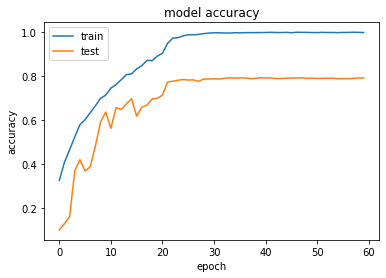

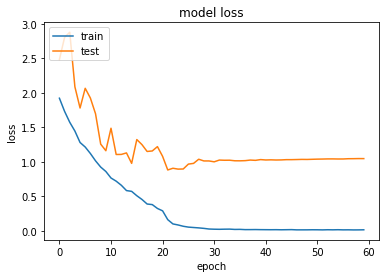

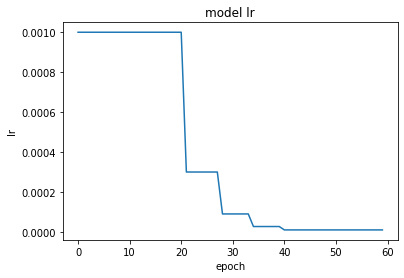

starting bb0 17:53:30
bb0 batch 0 17:53:30
bb0 batch 1 18:05:11
bb0 batch 2 18:16:57
bb0 batch 3 18:28:37
ending bb0 18:40:18
starting pgd 18:40:18
pgd batch 0 18:40:18
pgd batch 1 18:40:39
pgd batch 2 18:41:00
pgd batch 3 18:41:21
ending pgd 18:41:41
starting cw 18:41:41
cw batch 0 18:41:41
cw batch 1 18:48:37
cw batch 2 18:55:35
cw batch 3 19:02:32



1it [1:28:49, 5329.16s/it]

ending cw 19:09:29
current pruning ratio is0.5, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 0.4835 - accuracy: 0.8444 - val_loss: 2.4072 - val_accuracy: 0.1590 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 0.3149 - accuracy: 0.8951 - val_loss: 2.0228 - val_accuracy: 0.4413 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2549 - accuracy: 0.9134 - val_loss: 1.1254 - val_accuracy: 0.6983 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2470 - accuracy: 0.9168 - val_loss: 1.3641 - val_accuracy: 0.6744 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2290 - accuracy: 0.9222 - val_loss: 1.1130 - val_accuracy: 0.7335 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1689 - accuracy: 0.9429 - val_loss: 1.2579 - val_accuracy: 0.7287 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

Epoch 52/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 1.1578 - val_accuracy: 0.8028 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 1.1572 - val_accuracy: 0.8025 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 1.1557 - val_accuracy: 0.8036 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 1.1527 - val_accuracy: 0.8038 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0038 - accuracy: 0.9997 - val_loss: 1.1587 - val_accuracy: 0.8038 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 1.1599 - val_accuracy: 0.8038 - lr: 1.0000e-05
Epoch 58/100
74/74 [========

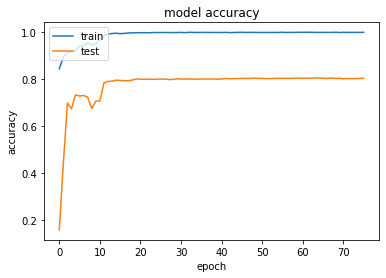

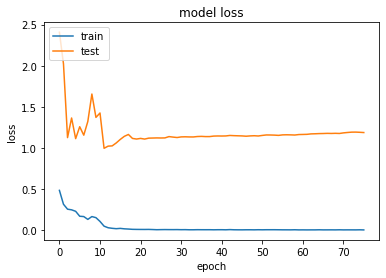

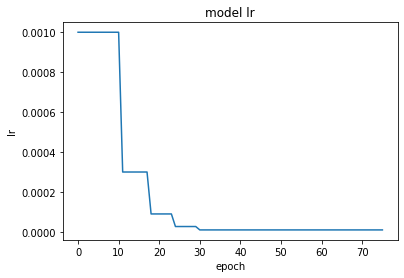

starting bb0 19:25:36
bb0 batch 0 19:25:36
bb0 batch 1 19:37:29
bb0 batch 2 19:49:21
bb0 batch 3 20:01:13
ending bb0 20:13:09
starting pgd 20:13:09
pgd batch 0 20:13:09
pgd batch 1 20:13:30
pgd batch 2 20:13:50
pgd batch 3 20:14:11
ending pgd 20:14:32
starting cw 20:14:32
cw batch 0 20:14:32
cw batch 1 20:25:20
cw batch 2 20:32:17
cw batch 3 20:42:20



2it [3:11:41, 5582.03s/it]

ending cw 20:52:21
current pruning ratio is0.75, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.7351 - accuracy: 0.7620 - val_loss: 2.7122 - val_accuracy: 0.0894 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 162ms/step - loss: 0.4367 - accuracy: 0.8542 - val_loss: 2.3125 - val_accuracy: 0.2087 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.3189 - accuracy: 0.8940 - val_loss: 1.4954 - val_accuracy: 0.5139 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2693 - accuracy: 0.9111 - val_loss: 1.2068 - val_accuracy: 0.6741 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2260 - accuracy: 0.9238 - val_loss: 1.2221 - val_accuracy: 0.7039 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1956 - accuracy: 0.9338 - val_loss: 1.0828 - val_accuracy: 0.7279 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

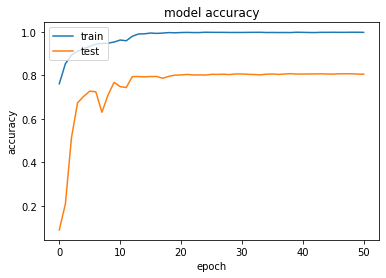

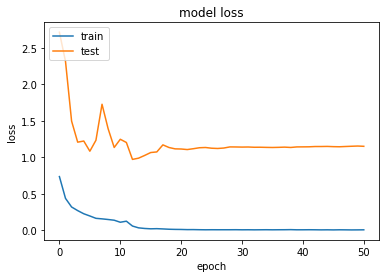

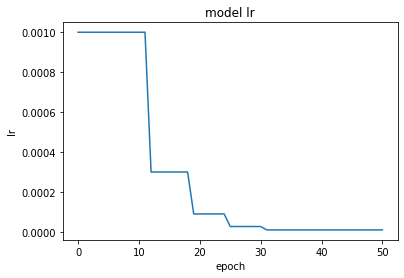

starting bb0 21:03:17
bb0 batch 0 21:03:17
bb0 batch 1 21:15:18
bb0 batch 2 21:27:19
bb0 batch 3 21:39:22
ending bb0 21:51:20
starting pgd 21:51:20
pgd batch 0 21:51:20
pgd batch 1 21:51:41
pgd batch 2 21:52:02
pgd batch 3 21:52:22
ending pgd 21:52:43
starting cw 21:52:43
cw batch 0 21:52:43
cw batch 1 21:59:40
cw batch 2 22:06:36
cw batch 3 22:13:33



3it [4:42:08, 5535.46s/it]

ending cw 22:22:48
current pruning ratio is0.875, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 0.8965 - accuracy: 0.7052 - val_loss: 2.4559 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 0.5184 - accuracy: 0.8266 - val_loss: 1.6739 - val_accuracy: 0.4497 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.4031 - accuracy: 0.8660 - val_loss: 1.2129 - val_accuracy: 0.6706 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.3425 - accuracy: 0.8831 - val_loss: 1.0762 - val_accuracy: 0.7187 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2783 - accuracy: 0.9077 - val_loss: 1.3076 - val_accuracy: 0.6724 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2373 - accuracy: 0.9190 - val_loss: 0.9666 - val_accuracy: 0.7689 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

Epoch 52/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0115 - accuracy: 0.9974 - val_loss: 1.1102 - val_accuracy: 0.8005 - lr: 1.0000e-05


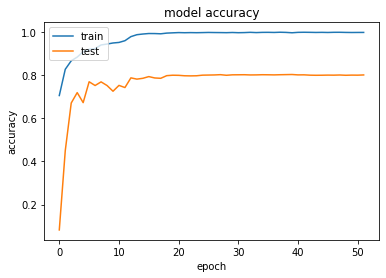

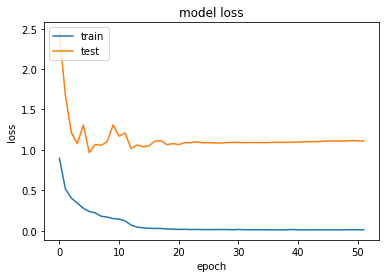

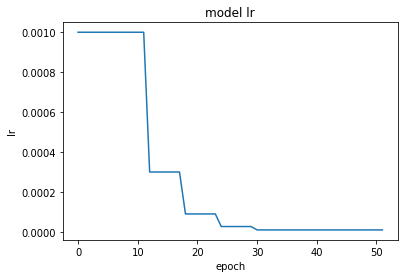

starting bb0 22:33:53
bb0 batch 0 22:33:53
bb0 batch 1 22:46:04
bb0 batch 2 22:58:13
bb0 batch 3 23:10:27
ending bb0 23:22:37
starting pgd 23:22:37
pgd batch 0 23:22:37
pgd batch 1 23:22:58
pgd batch 2 23:23:18
pgd batch 3 23:23:39
ending pgd 23:24:00
starting cw 23:24:00
cw batch 0 23:24:00
cw batch 1 23:37:53
cw batch 2 23:44:50
cw batch 3 23:51:47



4it [6:18:04, 5601.76s/it]

ending cw 23:58:44
current pruning ratio is0.9375, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.3422 - accuracy: 0.9024 - val_loss: 1.1726 - val_accuracy: 0.6958 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1495 - accuracy: 0.9530 - val_loss: 1.0540 - val_accuracy: 0.7516 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 168ms/step - loss: 0.1298 - accuracy: 0.9570 - val_loss: 1.2936 - val_accuracy: 0.7192 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1323 - accuracy: 0.9552 - val_loss: 1.1432 - val_accuracy: 0.7468 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 168ms/step - loss: 0.1228 - accuracy: 0.9588 - val_loss: 1.3660 - val_accuracy: 0.7129 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1034 - accuracy: 0.9646 - val_loss: 1.1542 - val_accuracy: 0.7541 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

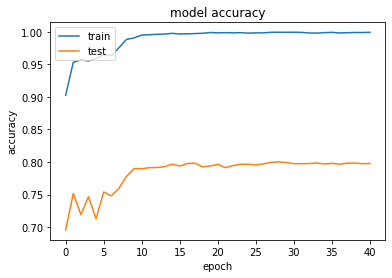

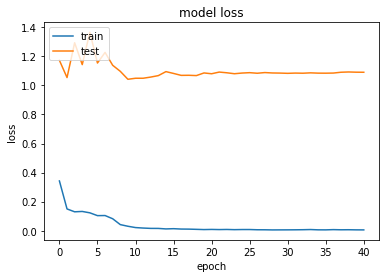

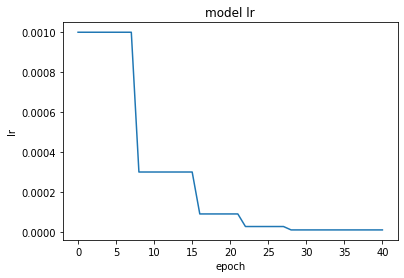

starting bb0 00:07:33
bb0 batch 0 00:07:33
bb0 batch 1 00:19:41
bb0 batch 2 00:31:48
bb0 batch 3 00:43:52
ending bb0 00:56:02
starting pgd 00:56:02
pgd batch 0 00:56:02
pgd batch 1 00:56:22
pgd batch 2 00:56:43
pgd batch 3 00:57:04
ending pgd 00:57:25
starting cw 00:57:25
cw batch 0 00:57:25
cw batch 1 01:04:23
cw batch 2 01:11:19
cw batch 3 01:18:17



5it [7:44:34, 5478.31s/it]

ending cw 01:25:14
current pruning ratio is0.96875, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 2.3061 - accuracy: 0.0997 - val_loss: 2.3141 - val_accuracy: 0.1042 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3034 - accuracy: 0.0998 - val_loss: 2.3074 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3030 - accuracy: 0.1038 - val_loss: 2.3070 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 2.3034 - accuracy: 0.1007 - val_loss: 2.3044 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3035 - accuracy: 0.0983 - val_loss: 2.3060 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 2.3036 - accuracy: 0.1005 - val_loss: 2.3042 - val_accuracy: 0.1006 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

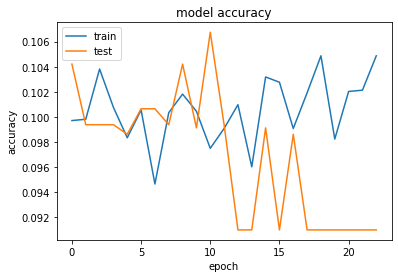

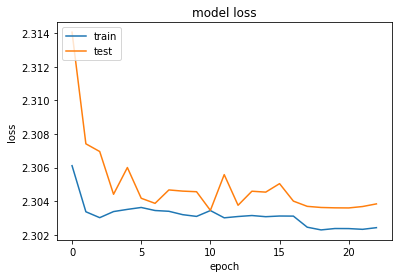

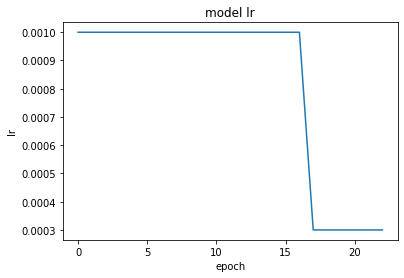

starting pgd 01:30:20
pgd batch 0 01:30:20
pgd batch 1 01:30:41
pgd batch 2 01:31:02
pgd batch 3 01:31:22
ending pgd 01:31:43
starting cw 01:31:43
cw batch 0 01:31:43
cw batch 1 01:38:41
cw batch 2 01:45:40
cw batch 3 01:52:38



6it [8:18:57, 4453.58s/it]

ending cw 01:59:37
current pruning ratio is0.984375, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 2.3031 - accuracy: 0.0976 - val_loss: 2.3035 - val_accuracy: 0.1006 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3026 - accuracy: 0.1029 - val_loss: 2.3035 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 166ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3037 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3025 - accuracy: 0.1049 - val_loss: 2.3035 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3026 - accuracy: 0.1036 - val_loss: 2.3034 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3026 - accuracy: 0.1049 - val_loss: 2.3035 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/step - 

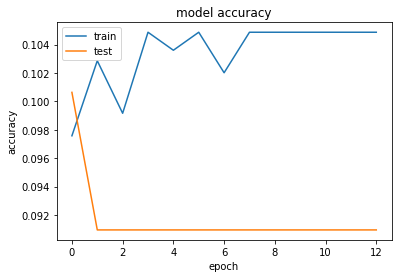

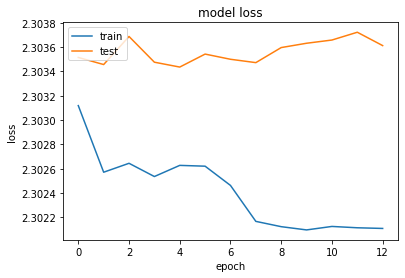

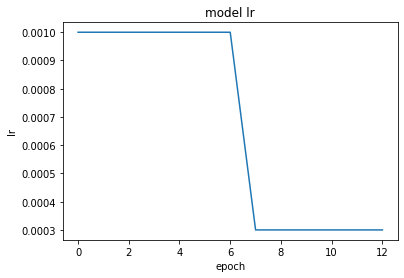

starting pgd 02:02:39
pgd batch 0 02:02:39
pgd batch 1 02:02:59
pgd batch 2 02:03:20
pgd batch 3 02:03:41
ending pgd 02:04:01
starting cw 02:04:02
cw batch 0 02:04:02
cw batch 1 02:11:00
cw batch 2 02:17:57
cw batch 3 02:24:54



7it [8:51:10, 4552.94s/it]
100%|██████████| 2/2 [17:31:58<00:00, 31559.04s/it] 

ending cw 02:31:50


In [13]:
run_experiment(
    structure='unstructured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/2 [00:00<?, ?it/s]

74/74 [==============================] - 16s 217ms/step - loss: 2.3506 - accuracy: 0.2415 - val_loss: 2.3881 - val_accuracy: 0.0996



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 1.9171 - accuracy: 0.3240 - val_loss: 2.3181 - val_accuracy: 0.1406 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 13s 169ms/step - loss: 1.7069 - accuracy: 0.4180 - val_loss: 2.5267 - val_accuracy: 0.1485 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 166ms/step - loss: 1.5390 - accuracy: 0.4761 - val_loss: 2.4872 - val_accuracy: 0.2153 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 167ms/step - loss: 1.3662 - accuracy: 0.5412 - val_loss: 1.7014 - val_accuracy: 0.4206 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 168ms/step - loss: 1.2322 - accuracy: 0.5964 - val_loss: 1.4449 - val_accuracy: 0.5292 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 13s 174ms/step - loss: 1.1294 - accuracy: 0.6278 - val_loss: 2.9371 - val_accuracy: 0.2606 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 13s 170ms/step - 

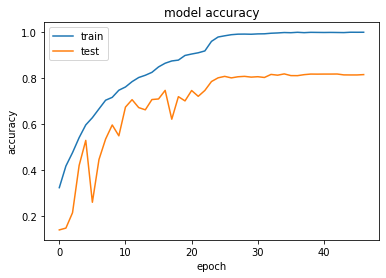

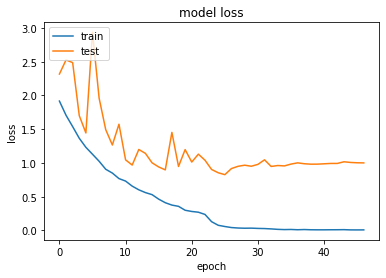

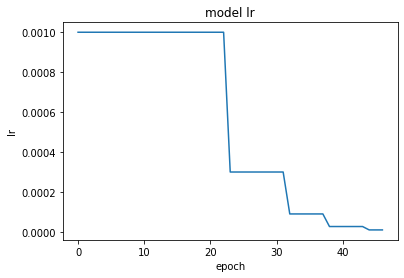

starting bb0 14:54:16
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


bb0 batch 0 14:54:17
bb0 batch 1 15:06:54
bb0 batch 2 15:19:11
bb0 batch 3 15:31:27
ending bb0 15:43:37
starting pgd 15:43:37
pgd batch 0 15:43:37
pgd batch 1 15:43:58
pgd batch 2 15:44:19
pgd batch 3 15:44:40
ending pgd 15:45:01
starting cw 15:45:01
cw batch 0 15:45:01
cw batch 1 15:52:00
cw batch 2 15:59:01
cw batch 3 16:06:02



1it [1:29:10, 5350.49s/it]

ending cw 16:13:01
current pruning ratio is0.5, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 0.0926 - accuracy: 0.9705 - val_loss: 1.1633 - val_accuracy: 0.7340 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0894 - accuracy: 0.9696 - val_loss: 1.0789 - val_accuracy: 0.7671 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 13s 169ms/step - loss: 0.1030 - accuracy: 0.9677 - val_loss: 1.2924 - val_accuracy: 0.7381 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0855 - accuracy: 0.9718 - val_loss: 1.1690 - val_accuracy: 0.7753 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 169ms/step - loss: 0.0885 - accuracy: 0.9701 - val_loss: 1.8039 - val_accuracy: 0.7090 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0718 - accuracy: 0.9761 - val_loss: 1.3790 - val_accuracy: 0.7582 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

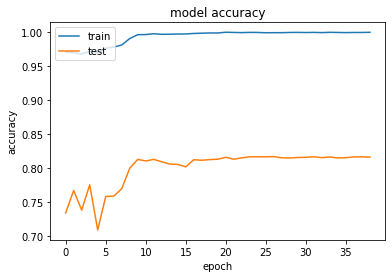

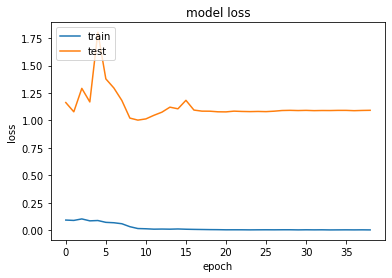

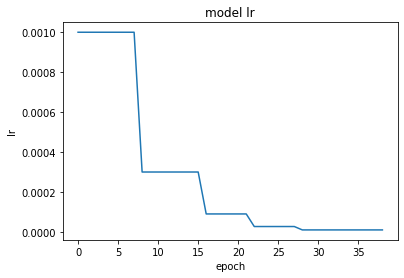

starting bb0 16:21:28
bb0 batch 0 16:21:28
bb0 batch 1 16:33:35
bb0 batch 2 16:45:42
bb0 batch 3 16:57:54
ending bb0 17:10:11
starting pgd 17:10:11
pgd batch 0 17:10:11
pgd batch 1 17:10:32
pgd batch 2 17:10:53
pgd batch 3 17:11:14
ending pgd 17:11:35
starting cw 17:11:35
cw batch 0 17:11:35
cw batch 1 17:18:36
cw batch 2 17:25:35
cw batch 3 17:44:56



2it [3:18:54, 5720.40s/it]

ending cw 18:02:44
current pruning ratio is0.75, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.2149 - accuracy: 0.9333 - val_loss: 2.5210 - val_accuracy: 0.2818 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0944 - accuracy: 0.9722 - val_loss: 1.2543 - val_accuracy: 0.6520 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0662 - accuracy: 0.9804 - val_loss: 0.9306 - val_accuracy: 0.7725 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0564 - accuracy: 0.9828 - val_loss: 0.9445 - val_accuracy: 0.7916 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0438 - accuracy: 0.9870 - val_loss: 1.0349 - val_accuracy: 0.7852 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0535 - accuracy: 0.9826 - val_loss: 1.1462 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

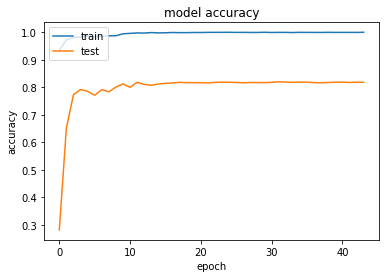

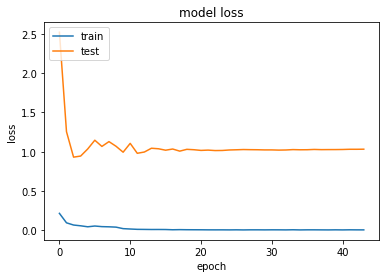

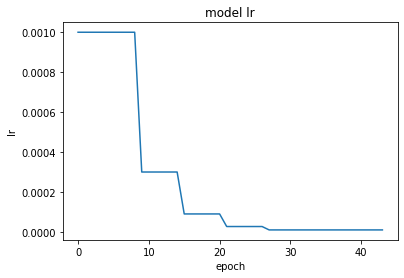

starting bb0 18:12:13
bb0 batch 0 18:12:13
bb0 batch 1 18:24:26
bb0 batch 2 18:36:49
bb0 batch 3 18:49:11
ending bb0 19:01:34
starting pgd 19:01:34
pgd batch 0 19:01:34
pgd batch 1 19:01:55
pgd batch 2 19:02:15
pgd batch 3 19:02:36
ending pgd 19:02:57
starting cw 19:02:58
cw batch 0 19:02:58
cw batch 1 19:09:57
cw batch 2 19:16:56
cw batch 3 19:23:55



3it [4:47:03, 5591.08s/it]

ending cw 19:30:54
current pruning ratio is0.875, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 0.4251 - accuracy: 0.8588 - val_loss: 2.8968 - val_accuracy: 0.1824 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.1852 - accuracy: 0.9401 - val_loss: 1.5916 - val_accuracy: 0.5442 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 0.1240 - accuracy: 0.9601 - val_loss: 1.1384 - val_accuracy: 0.7154 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0953 - accuracy: 0.9703 - val_loss: 0.9562 - val_accuracy: 0.7717 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0884 - accuracy: 0.9733 - val_loss: 0.9808 - val_accuracy: 0.7768 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0800 - accuracy: 0.9754 - val_loss: 1.0036 - val_accuracy: 0.7817 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

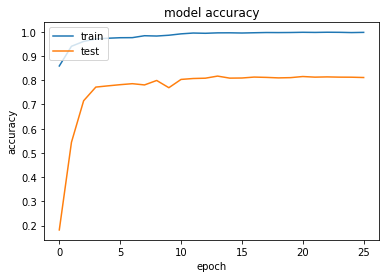

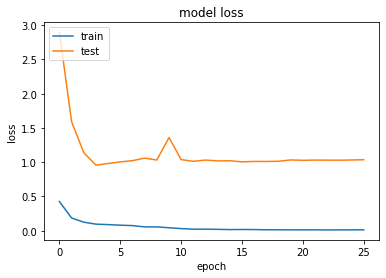

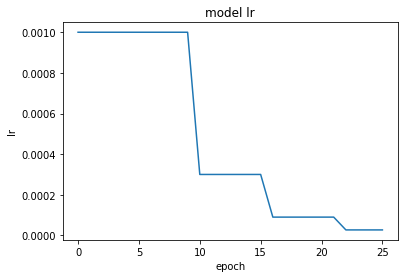

starting bb0 19:36:40
bb0 batch 0 19:36:40
bb0 batch 1 19:49:09
bb0 batch 2 20:01:43
bb0 batch 3 20:14:15
ending bb0 20:26:42
starting pgd 20:26:42
pgd batch 0 20:26:42
pgd batch 1 20:27:02
pgd batch 2 20:27:23
pgd batch 3 20:27:44
ending pgd 20:28:05
starting cw 20:28:05
cw batch 0 20:28:05
cw batch 1 20:35:04
cw batch 2 20:49:01
cw batch 3 20:56:01



4it [6:19:10, 5571.99s/it]

ending cw 21:03:01
current pruning ratio is0.9375, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.2694 - accuracy: 0.9232 - val_loss: 0.9742 - val_accuracy: 0.7223 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0726 - accuracy: 0.9813 - val_loss: 0.9499 - val_accuracy: 0.7753 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 168ms/step - loss: 0.0494 - accuracy: 0.9882 - val_loss: 1.0195 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 168ms/step - loss: 0.0424 - accuracy: 0.9880 - val_loss: 1.0821 - val_accuracy: 0.7829 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 169ms/step - loss: 0.0488 - accuracy: 0.9853 - val_loss: 1.1619 - val_accuracy: 0.7819 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 169ms/step - loss: 0.0469 - accuracy: 0.9845 - val_loss: 1.3310 - val_accuracy: 0.7483 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

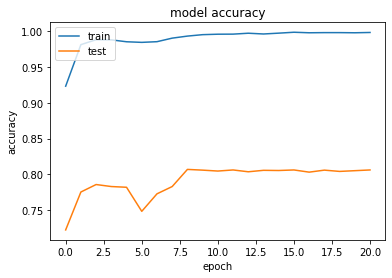

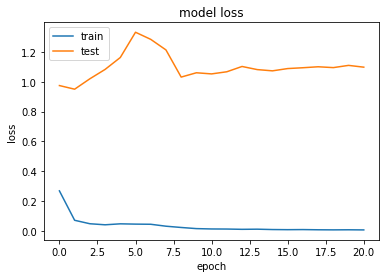

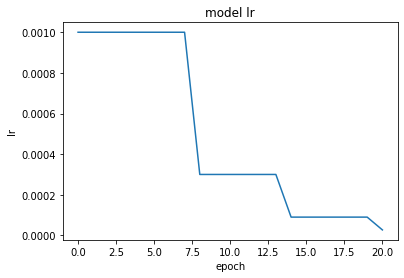

starting bb0 21:07:47
bb0 batch 0 21:07:47
bb0 batch 1 21:20:15
bb0 batch 2 21:32:48
bb0 batch 3 21:45:15
ending bb0 21:57:44
starting pgd 21:57:44
pgd batch 0 21:57:44
pgd batch 1 21:58:05
pgd batch 2 21:58:26
pgd batch 3 21:58:47
ending pgd 21:59:08
starting cw 21:59:08
cw batch 0 21:59:08
cw batch 1 22:06:07
cw batch 2 22:13:06
cw batch 3 22:20:04



5it [7:43:12, 5412.99s/it]

ending cw 22:27:03
current pruning ratio is0.96875, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 174ms/step - loss: 2.3196 - accuracy: 0.0987 - val_loss: 2.3521 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 2.3051 - accuracy: 0.0990 - val_loss: 2.3410 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 2.3044 - accuracy: 0.0998 - val_loss: 2.3308 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 2.3052 - accuracy: 0.1032 - val_loss: 2.3175 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 2.3055 - accuracy: 0.0996 - val_loss: 2.3090 - val_accuracy: 0.1006 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 2.3049 - accuracy: 0.0982 - val_loss: 2.3067 - val_accuracy: 0.1042 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

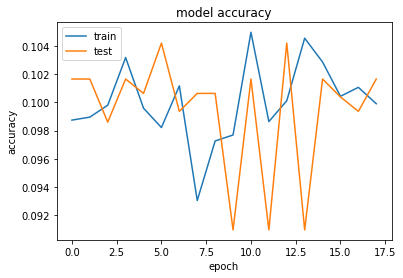

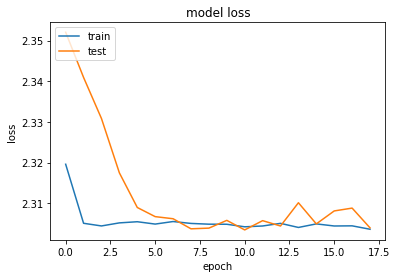

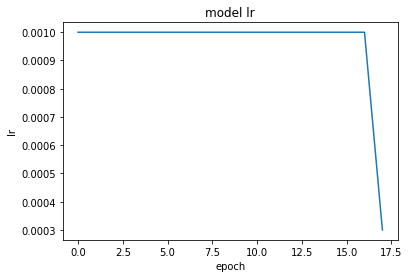

starting pgd 22:31:10
pgd batch 0 22:31:10
pgd batch 1 22:31:31
pgd batch 2 22:31:52
pgd batch 3 22:32:13
ending pgd 22:32:34
starting cw 22:32:34
cw batch 0 22:32:34
cw batch 1 22:39:33
cw batch 2 22:46:32
cw batch 3 22:53:31



6it [8:16:40, 4391.31s/it]

ending cw 23:00:30
current pruning ratio is0.984375, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 2.3137 - accuracy: 0.0995 - val_loss: 2.3032 - val_accuracy: 0.0991 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 168ms/step - loss: 2.3034 - accuracy: 0.0978 - val_loss: 2.3042 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 168ms/step - loss: 2.3033 - accuracy: 0.0968 - val_loss: 2.3049 - val_accuracy: 0.1006 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 2.3030 - accuracy: 0.1022 - val_loss: 2.3042 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 2.3031 - accuracy: 0.1030 - val_loss: 2.3043 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3039 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

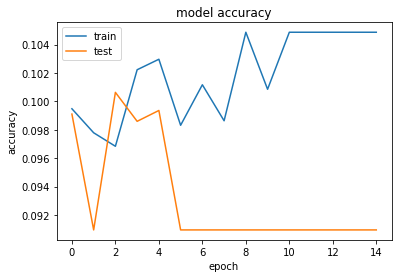

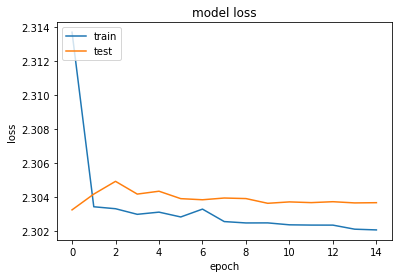

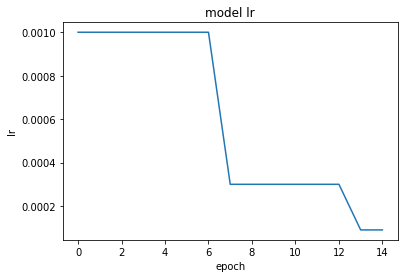

starting pgd 23:04:00
pgd batch 0 23:04:00
pgd batch 1 23:04:21
pgd batch 2 23:04:42
pgd batch 3 23:05:03
ending pgd 23:05:24
starting cw 23:05:24
cw batch 0 23:05:24
cw batch 1 23:12:24
cw batch 2 23:19:22
cw batch 3 23:26:21



7it [8:49:29, 4538.53s/it]
 50%|█████     | 1/2 [8:49:58<8:49:58, 31798.31s/it]

ending cw 23:33:20


74/74 [==============================] - 12s 168ms/step - loss: 2.3498 - accuracy: 0.2234 - val_loss: 2.7614 - val_accuracy: 0.1011



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 1.9075 - accuracy: 0.3335 - val_loss: 2.2729 - val_accuracy: 0.1855 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 1.6793 - accuracy: 0.4238 - val_loss: 2.0762 - val_accuracy: 0.2576 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 169ms/step - loss: 1.5119 - accuracy: 0.4900 - val_loss: 2.3959 - val_accuracy: 0.2790 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 1.3599 - accuracy: 0.5441 - val_loss: 1.8050 - val_accuracy: 0.3496 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 1.2313 - accuracy: 0.5916 - val_loss: 1.7088 - val_accuracy: 0.4487 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 1.1083 - accuracy: 0.6326 - val_loss: 2.1043 - val_accuracy: 0.3524 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

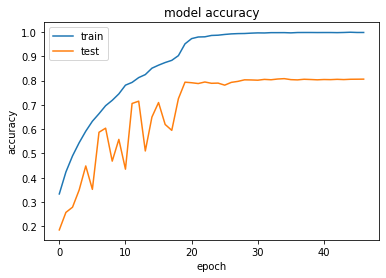

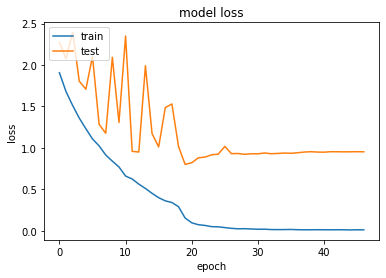

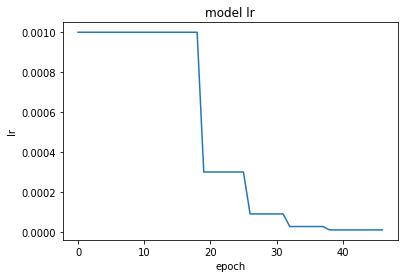

starting bb0 23:43:38
bb0 batch 0 23:43:38
bb0 batch 1 23:55:54
bb0 batch 2 00:08:10
bb0 batch 3 00:20:28
ending bb0 00:32:38
starting pgd 00:32:38
pgd batch 0 00:32:38
pgd batch 1 00:32:59
pgd batch 2 00:33:20
pgd batch 3 00:33:41
ending pgd 00:34:02
starting cw 00:34:02
cw batch 0 00:34:02
cw batch 1 00:41:02
cw batch 2 00:48:03
cw batch 3 00:55:02



1it [1:28:28, 5308.44s/it]

ending cw 01:02:03
current pruning ratio is0.5, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 0.1130 - accuracy: 0.9641 - val_loss: 1.1168 - val_accuracy: 0.7394 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.1083 - accuracy: 0.9643 - val_loss: 1.0427 - val_accuracy: 0.7592 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 13s 169ms/step - loss: 0.0944 - accuracy: 0.9717 - val_loss: 1.1905 - val_accuracy: 0.7526 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 169ms/step - loss: 0.1032 - accuracy: 0.9663 - val_loss: 1.2235 - val_accuracy: 0.7475 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 13s 169ms/step - loss: 0.0880 - accuracy: 0.9712 - val_loss: 1.2601 - val_accuracy: 0.7521 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 13s 169ms/step - loss: 0.0931 - accuracy: 0.9684 - val_loss: 1.3067 - val_accuracy: 0.7307 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

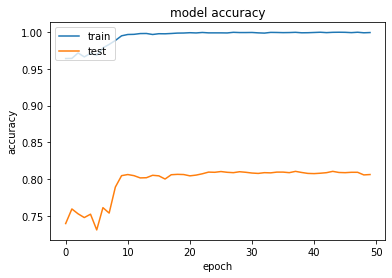

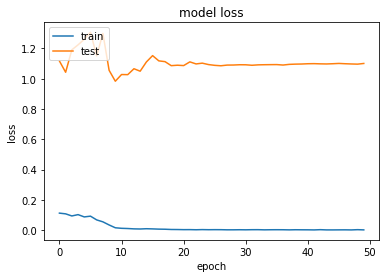

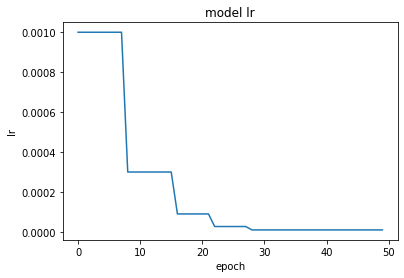

starting bb0 01:12:48
bb0 batch 0 01:12:48
bb0 batch 1 01:24:52
bb0 batch 2 01:37:04
bb0 batch 3 01:49:12
ending bb0 02:01:19
starting pgd 02:01:19
pgd batch 0 02:01:19
pgd batch 1 02:01:40
pgd batch 2 02:02:01
pgd batch 3 02:02:22
ending pgd 02:02:43
starting cw 02:02:43
cw batch 0 02:02:43
cw batch 1 02:09:42
cw batch 2 02:16:42
cw batch 3 02:32:15



2it [3:05:40, 5465.46s/it]

ending cw 02:39:14
current pruning ratio is0.75, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 0.1497 - accuracy: 0.9566 - val_loss: 3.2730 - val_accuracy: 0.2777 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0657 - accuracy: 0.9810 - val_loss: 1.6306 - val_accuracy: 0.6043 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0506 - accuracy: 0.9856 - val_loss: 1.1289 - val_accuracy: 0.7404 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0481 - accuracy: 0.9865 - val_loss: 1.4341 - val_accuracy: 0.7394 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0414 - accuracy: 0.9881 - val_loss: 1.1679 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0428 - accuracy: 0.9862 - val_loss: 1.2641 - val_accuracy: 0.7694 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 165ms/step - 

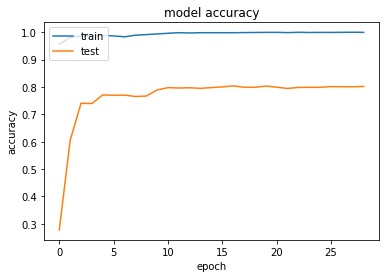

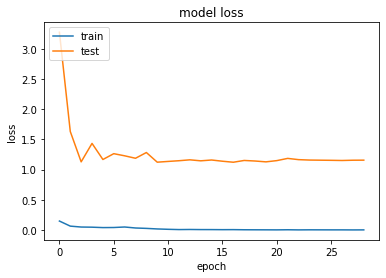

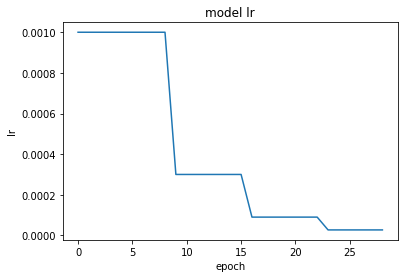

starting bb0 02:45:38
bb0 batch 0 02:45:38
bb0 batch 1 02:58:01
bb0 batch 2 03:10:21
bb0 batch 3 03:22:48
ending bb0 03:35:13
starting pgd 03:35:13
pgd batch 0 03:35:13
pgd batch 1 03:35:33
pgd batch 2 03:35:54
pgd batch 3 03:36:15
ending pgd 03:36:36
starting cw 03:36:37
cw batch 0 03:36:37
cw batch 1 03:43:36
cw batch 2 03:50:35
cw batch 3 03:57:34



3it [4:30:59, 5361.61s/it]

ending cw 04:04:34
current pruning ratio is0.875, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 0.3547 - accuracy: 0.8909 - val_loss: 2.5834 - val_accuracy: 0.2520 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.1402 - accuracy: 0.9592 - val_loss: 1.7349 - val_accuracy: 0.5450 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0946 - accuracy: 0.9721 - val_loss: 1.2528 - val_accuracy: 0.7146 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0783 - accuracy: 0.9767 - val_loss: 1.0601 - val_accuracy: 0.7666 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0603 - accuracy: 0.9818 - val_loss: 1.1198 - val_accuracy: 0.7725 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 1.0881 - val_accuracy: 0.7789 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

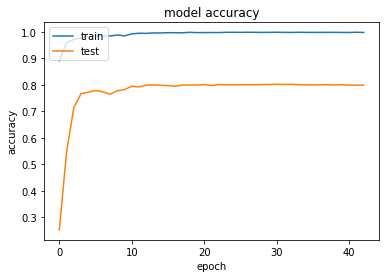

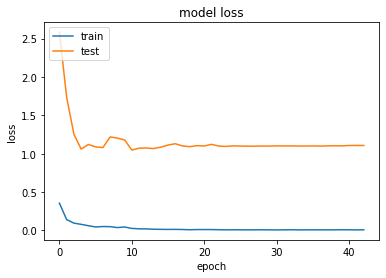

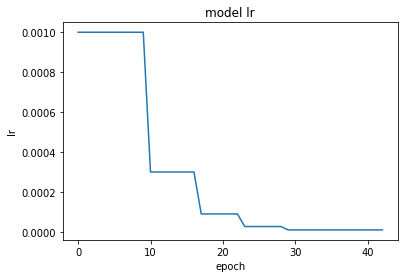

starting bb0 04:13:51
bb0 batch 0 04:13:51
bb0 batch 1 04:26:16
bb0 batch 2 04:38:48
bb0 batch 3 04:51:13
ending bb0 05:03:37
starting pgd 05:03:37
pgd batch 0 05:03:37
pgd batch 1 05:03:58
pgd batch 2 05:04:19
pgd batch 3 05:04:40
ending pgd 05:05:01
starting cw 05:05:01
cw batch 0 05:05:01
cw batch 1 05:12:01
cw batch 2 05:19:00
cw batch 3 05:25:59



4it [5:59:23, 5344.41s/it]

ending cw 05:32:58
current pruning ratio is0.9375, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 0.2864 - accuracy: 0.9187 - val_loss: 1.0478 - val_accuracy: 0.7302 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0609 - accuracy: 0.9851 - val_loss: 1.0395 - val_accuracy: 0.7646 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 169ms/step - loss: 0.0407 - accuracy: 0.9899 - val_loss: 1.0986 - val_accuracy: 0.7758 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0311 - accuracy: 0.9925 - val_loss: 1.0969 - val_accuracy: 0.7753 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 169ms/step - loss: 0.0266 - accuracy: 0.9932 - val_loss: 1.1689 - val_accuracy: 0.7743 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 168ms/step - loss: 0.0358 - accuracy: 0.9883 - val_loss: 1.2258 - val_accuracy: 0.7692 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 13s 169ms/step - 

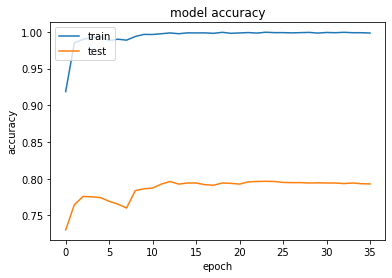

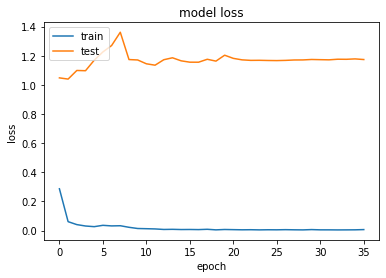

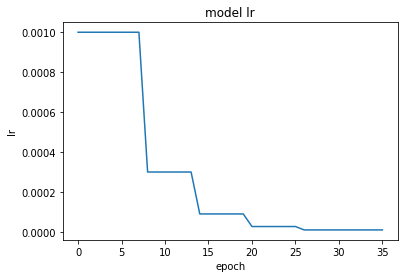

starting bb0 05:40:50
bb0 batch 0 05:40:50
bb0 batch 1 05:53:21
bb0 batch 2 06:05:48
bb0 batch 3 06:18:18
ending bb0 06:30:49
starting pgd 06:30:49
pgd batch 0 06:30:49
pgd batch 1 06:31:10
pgd batch 2 06:31:30
pgd batch 3 06:31:51
ending pgd 06:32:12
starting cw 06:32:13
cw batch 0 06:32:13
cw batch 1 06:39:11
cw batch 2 06:46:10
cw batch 3 06:53:10



5it [7:26:35, 5310.56s/it]

ending cw 07:00:10
current pruning ratio is0.96875, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 2.3179 - accuracy: 0.0998 - val_loss: 2.4421 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 2.3046 - accuracy: 0.0986 - val_loss: 2.3634 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 2.3037 - accuracy: 0.0985 - val_loss: 2.3343 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 2.3047 - accuracy: 0.1016 - val_loss: 2.3227 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 2.3057 - accuracy: 0.0976 - val_loss: 2.3114 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 2.3051 - accuracy: 0.1003 - val_loss: 2.3128 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

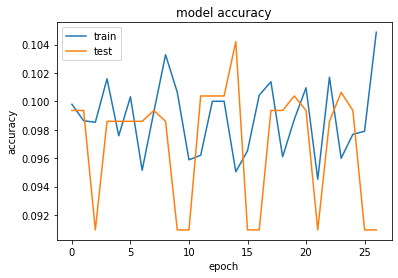

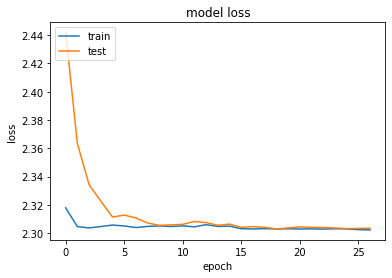

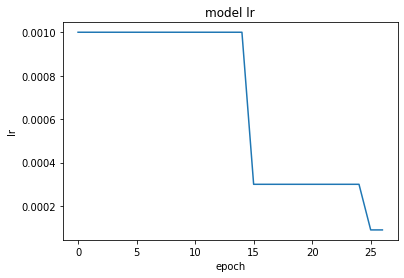

starting pgd 07:06:07
pgd batch 0 07:06:07
pgd batch 1 07:06:28
pgd batch 2 07:06:49
pgd batch 3 07:07:10
ending pgd 07:07:31
starting cw 07:07:31
cw batch 0 07:07:31
cw batch 1 07:14:30
cw batch 2 07:21:29
cw batch 3 07:28:28



6it [8:01:55, 4353.46s/it]

ending cw 07:35:30
current pruning ratio is0.984375, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 2.3125 - accuracy: 0.1000 - val_loss: 2.3070 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 2.3035 - accuracy: 0.1019 - val_loss: 2.3033 - val_accuracy: 0.1006 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 2.3030 - accuracy: 0.1031 - val_loss: 2.3047 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 2.3030 - accuracy: 0.1019 - val_loss: 2.3038 - val_accuracy: 0.1006 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 2.3038 - accuracy: 0.0987 - val_loss: 2.3036 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 2.3030 - accuracy: 0.0995 - val_loss: 2.3038 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

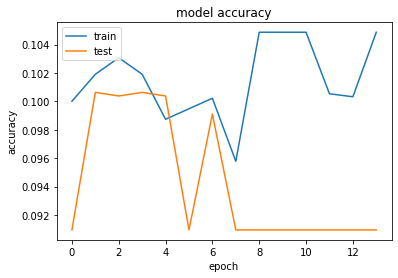

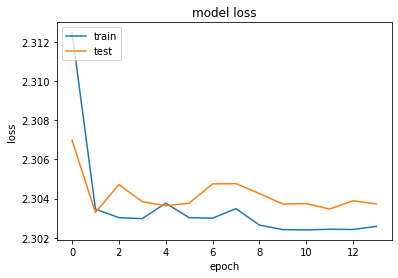

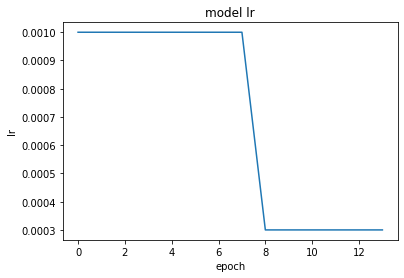

starting pgd 07:38:48
pgd batch 0 07:38:48
pgd batch 1 07:39:09
pgd batch 2 07:39:30
pgd batch 3 07:39:52
ending pgd 07:40:13
starting cw 07:40:13
cw batch 0 07:40:13
cw batch 1 07:47:12
cw batch 2 07:54:11
cw batch 3 08:01:09



7it [8:34:33, 4410.51s/it]
100%|██████████| 2/2 [17:24:46<00:00, 31343.05s/it] 

ending cw 08:08:08


In [8]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/2 [00:00<?, ?it/s]

74/74 [==============================] - 12s 168ms/step - loss: 2.3608 - accuracy: 0.2183 - val_loss: 2.3804 - val_accuracy: 0.1017



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 173ms/step - loss: 1.9760 - accuracy: 0.3095 - val_loss: 2.6372 - val_accuracy: 0.1162 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 1.7414 - accuracy: 0.4106 - val_loss: 2.4838 - val_accuracy: 0.1799 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 169ms/step - loss: 1.5654 - accuracy: 0.4660 - val_loss: 3.2688 - val_accuracy: 0.1475 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 1.4064 - accuracy: 0.5296 - val_loss: 2.2068 - val_accuracy: 0.2619 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 1.2935 - accuracy: 0.5641 - val_loss: 1.6499 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 1.1547 - accuracy: 0.6156 - val_loss: 1.8665 - val_accuracy: 0.4234 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

74/74 [==============================] - 12s 164ms/step - loss: 0.0116 - accuracy: 0.9977 - val_loss: 1.0828 - val_accuracy: 0.7952 - lr: 1.0000e-05


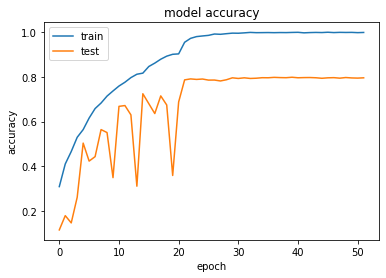

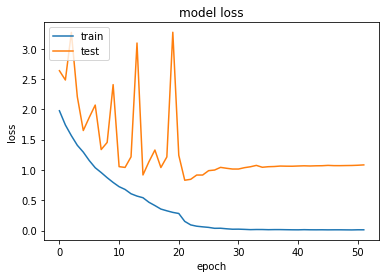

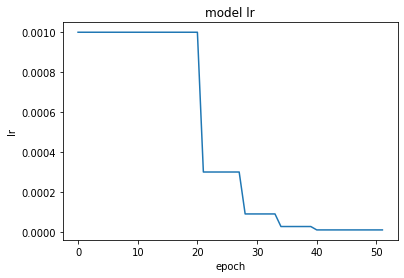

starting bb0 08:19:14
bb0 batch 0 08:19:14
bb0 batch 1 08:31:20
bb0 batch 2 08:43:33
bb0 batch 3 08:55:45
ending bb0 09:07:56
starting pgd 09:07:56
pgd batch 0 09:07:56
pgd batch 1 09:08:17
pgd batch 2 09:08:37
pgd batch 3 09:08:58
ending pgd 09:09:19
starting cw 09:09:19
cw batch 0 09:09:19
cw batch 1 09:16:26
cw batch 2 09:23:26
cw batch 3 09:30:24



1it [1:35:11, 5711.15s/it]

ending cw 09:43:33
current pruning ratio is0.5, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 173ms/step - loss: 0.0993 - accuracy: 0.9672 - val_loss: 1.2493 - val_accuracy: 0.7358 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0965 - accuracy: 0.9677 - val_loss: 1.2119 - val_accuracy: 0.7557 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 169ms/step - loss: 0.1108 - accuracy: 0.9616 - val_loss: 1.2805 - val_accuracy: 0.7358 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0974 - accuracy: 0.9692 - val_loss: 1.2748 - val_accuracy: 0.7488 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0718 - accuracy: 0.9754 - val_loss: 1.2088 - val_accuracy: 0.7692 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 13s 169ms/step - loss: 0.0663 - accuracy: 0.9781 - val_loss: 1.3498 - val_accuracy: 0.7587 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

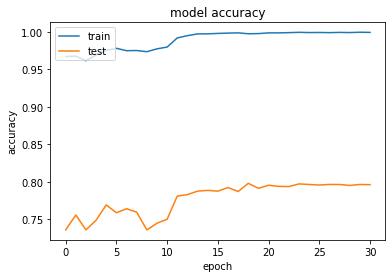

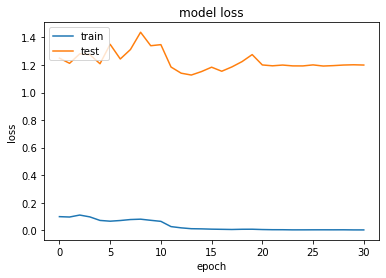

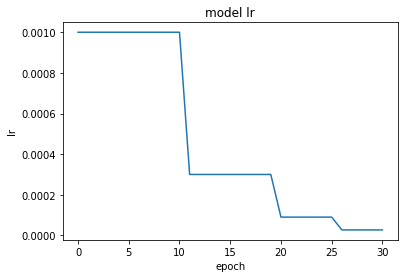

starting bb0 09:50:07
bb0 batch 0 09:50:07
bb0 batch 1 10:02:15
bb0 batch 2 10:14:32
bb0 batch 3 10:26:37
ending bb0 10:38:45
starting pgd 10:38:45
pgd batch 0 10:38:45
pgd batch 1 10:39:06
pgd batch 2 10:39:26
pgd batch 3 10:39:47
ending pgd 10:40:08
starting cw 10:40:08
cw batch 0 10:40:08
cw batch 1 10:47:09
cw batch 2 11:08:52
cw batch 3 11:15:50



2it [3:23:43, 5951.38s/it]

ending cw 11:32:05
current pruning ratio is0.75, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 173ms/step - loss: 0.0708 - accuracy: 0.9766 - val_loss: 1.4194 - val_accuracy: 0.7175 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0329 - accuracy: 0.9906 - val_loss: 1.3603 - val_accuracy: 0.7475 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0302 - accuracy: 0.9895 - val_loss: 1.3574 - val_accuracy: 0.7674 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0357 - accuracy: 0.9894 - val_loss: 1.3760 - val_accuracy: 0.7676 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 169ms/step - loss: 0.0340 - accuracy: 0.9883 - val_loss: 1.5223 - val_accuracy: 0.7569 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0359 - accuracy: 0.9872 - val_loss: 1.5124 - val_accuracy: 0.7424 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 169ms/step - 

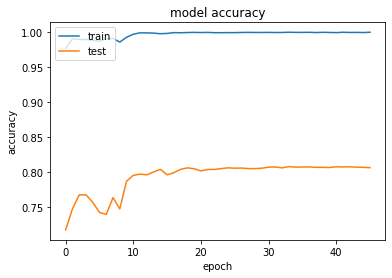

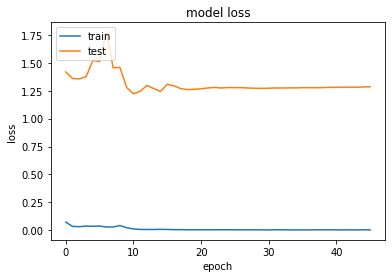

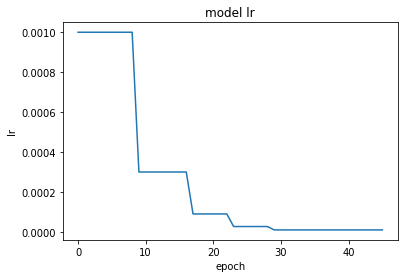

starting bb0 11:41:44
bb0 batch 0 11:41:44
bb0 batch 1 11:53:45
bb0 batch 2 12:05:49
bb0 batch 3 12:18:00
ending bb0 12:30:09
starting pgd 12:30:09
pgd batch 0 12:30:09
pgd batch 1 12:30:30
pgd batch 2 12:30:51
pgd batch 3 12:31:11
ending pgd 12:31:32
starting cw 12:31:32
cw batch 0 12:31:32
cw batch 1 12:38:31
cw batch 2 12:58:36
cw batch 3 13:05:34



3it [5:08:02, 6043.71s/it]

ending cw 13:16:24
current pruning ratio is0.875, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 173ms/step - loss: 0.3788 - accuracy: 0.8843 - val_loss: 2.3812 - val_accuracy: 0.4084 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.1053 - accuracy: 0.9662 - val_loss: 1.5918 - val_accuracy: 0.6331 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0634 - accuracy: 0.9804 - val_loss: 1.2870 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0438 - accuracy: 0.9856 - val_loss: 1.2047 - val_accuracy: 0.7572 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0393 - accuracy: 0.9885 - val_loss: 1.1859 - val_accuracy: 0.7712 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 1.2585 - val_accuracy: 0.7738 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

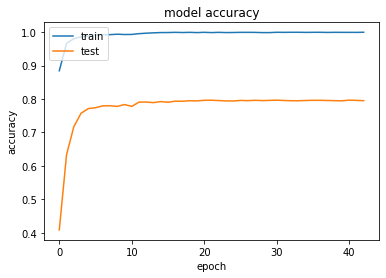

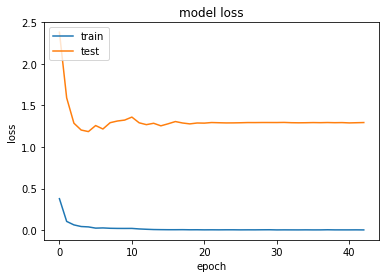

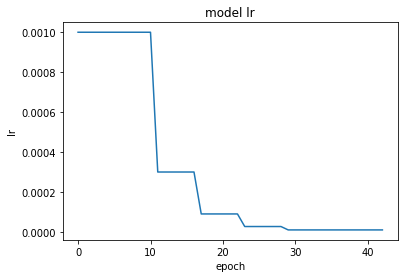

starting bb0 13:25:26
bb0 batch 0 13:25:26
bb0 batch 1 13:37:32
bb0 batch 2 13:49:45
bb0 batch 3 14:02:01
ending bb0 14:14:19
starting pgd 14:14:19
pgd batch 0 14:14:19
pgd batch 1 14:14:40
pgd batch 2 14:15:00
pgd batch 3 14:15:21
ending pgd 14:15:42
starting cw 14:15:42
cw batch 0 14:15:42
cw batch 1 14:33:34
cw batch 2 14:40:34
cw batch 3 14:47:34



4it [6:46:10, 5996.96s/it]

ending cw 14:54:32
current pruning ratio is0.9375, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 1.5200 - accuracy: 0.5651 - val_loss: 3.1550 - val_accuracy: 0.1152 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.7470 - accuracy: 0.7520 - val_loss: 2.2707 - val_accuracy: 0.3251 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 0.4896 - accuracy: 0.8369 - val_loss: 1.7639 - val_accuracy: 0.5345 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.3641 - accuracy: 0.8773 - val_loss: 1.1935 - val_accuracy: 0.6762 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2819 - accuracy: 0.9074 - val_loss: 1.0933 - val_accuracy: 0.7070 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2139 - accuracy: 0.9297 - val_loss: 1.0356 - val_accuracy: 0.7399 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

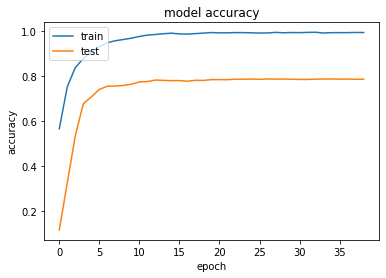

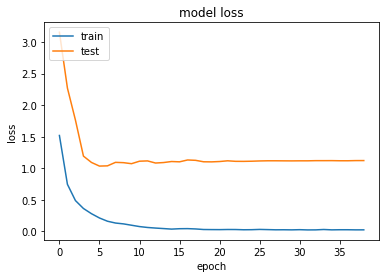

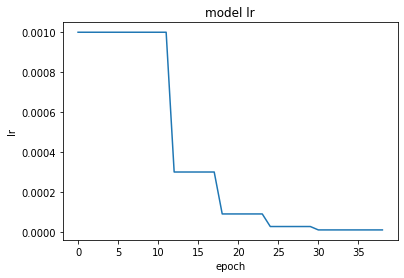

starting bb0 15:02:43
bb0 batch 0 15:02:43
bb0 batch 1 15:14:03
bb0 batch 2 15:25:35
bb0 batch 3 15:37:04
ending bb0 15:48:26
starting pgd 15:48:26
pgd batch 0 15:48:26
pgd batch 1 15:48:46
pgd batch 2 15:49:07
pgd batch 3 15:49:28
ending pgd 15:49:49
starting cw 15:49:49
cw batch 0 15:49:49
cw batch 1 15:56:49
cw batch 2 16:03:48
cw batch 3 16:10:46



5it [8:09:21, 5695.24s/it]

ending cw 16:17:43
current pruning ratio is0.96875, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 2.2366 - accuracy: 0.3150 - val_loss: 2.9322 - val_accuracy: 0.1246 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 1.5203 - accuracy: 0.4886 - val_loss: 2.3478 - val_accuracy: 0.2316 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 1.2185 - accuracy: 0.5901 - val_loss: 1.8675 - val_accuracy: 0.3888 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.9974 - accuracy: 0.6672 - val_loss: 1.4957 - val_accuracy: 0.5231 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.8657 - accuracy: 0.7088 - val_loss: 1.1314 - val_accuracy: 0.6474 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.7402 - accuracy: 0.7503 - val_loss: 1.0195 - val_accuracy: 0.6920 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

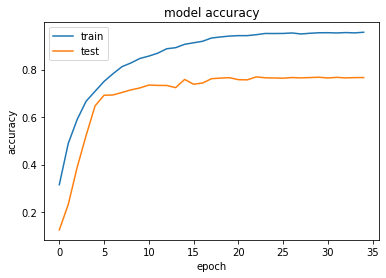

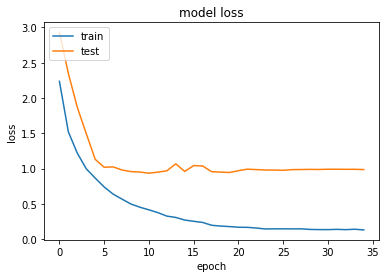

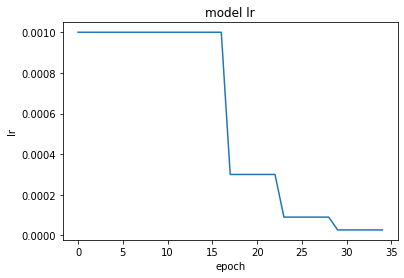

starting bb0 16:25:05
bb0 batch 0 16:25:06
bb0 batch 1 16:33:53
bb0 batch 2 16:42:38
bb0 batch 3 16:51:27
ending bb0 17:00:14
starting pgd 17:00:14
pgd batch 0 17:00:14
pgd batch 1 17:00:35
pgd batch 2 17:00:56
pgd batch 3 17:01:17
ending pgd 17:01:38
starting cw 17:01:38
cw batch 0 17:01:38
cw batch 1 17:08:37
cw batch 2 17:15:35
cw batch 3 17:22:32



6it [9:21:08, 5278.77s/it]

ending cw 17:29:30
current pruning ratio is0.984375, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 2.2896 - accuracy: 0.2925 - val_loss: 2.6122 - val_accuracy: 0.1391 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 168ms/step - loss: 1.7086 - accuracy: 0.4139 - val_loss: 2.8565 - val_accuracy: 0.2502 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 1.4700 - accuracy: 0.5062 - val_loss: 2.1508 - val_accuracy: 0.3735 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 1.3392 - accuracy: 0.5424 - val_loss: 2.4169 - val_accuracy: 0.3327 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 1.2080 - accuracy: 0.5939 - val_loss: 1.9194 - val_accuracy: 0.4464 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 1.1341 - accuracy: 0.6209 - val_loss: 1.4493 - val_accuracy: 0.5470 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

74/74 [==============================] - 12s 163ms/step - loss: 0.2530 - accuracy: 0.9136 - val_loss: 0.9544 - val_accuracy: 0.7536 - lr: 2.7000e-05
Epoch 53/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2493 - accuracy: 0.9145 - val_loss: 0.9509 - val_accuracy: 0.7564 - lr: 2.7000e-05
Epoch 54/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2572 - accuracy: 0.9116 - val_loss: 0.9526 - val_accuracy: 0.7541 - lr: 2.7000e-05
Epoch 55/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2464 - accuracy: 0.9152 - val_loss: 0.9556 - val_accuracy: 0.7557 - lr: 2.7000e-05
Epoch 56/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2491 - accuracy: 0.9153 - val_loss: 0.9562 - val_accuracy: 0.7544 - lr: 2.7000e-05
Epoch 57/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2428 - accuracy: 0.9182 - val_loss: 0.9558 - val_accuracy: 0.7518 - lr: 2.7000e-05
Epoch 58/100
74/74 [=====================

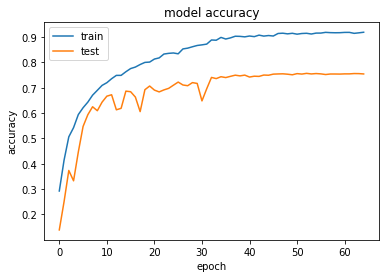

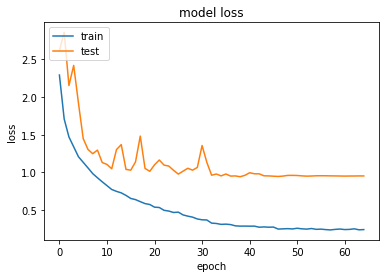

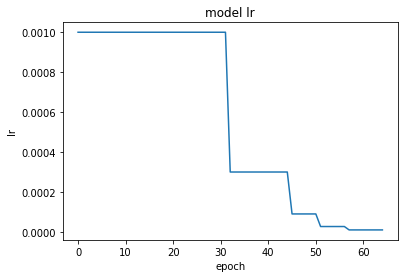

starting bb0 17:42:59
bb0 batch 0 17:42:59
bb0 batch 1 17:50:12
bb0 batch 2 17:57:24
bb0 batch 3 18:04:34
ending bb0 18:11:45
starting pgd 18:11:45
pgd batch 0 18:11:45
pgd batch 1 18:12:06
pgd batch 2 18:12:27
pgd batch 3 18:12:47
ending pgd 18:13:08
starting cw 18:13:08
cw batch 0 18:13:08
cw batch 1 18:20:07
cw batch 2 18:27:05
cw batch 3 18:34:03



7it [10:32:41, 5423.07s/it]
 50%|█████     | 1/2 [10:32:55<10:32:55, 37975.71s/it]

ending cw 18:41:03


74/74 [==============================] - 12s 168ms/step - loss: 2.3207 - accuracy: 0.2432 - val_loss: 2.3416 - val_accuracy: 0.0994



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 1.8953 - accuracy: 0.3396 - val_loss: 4.7388 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 1.6550 - accuracy: 0.4391 - val_loss: 2.5214 - val_accuracy: 0.1636 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 1.4829 - accuracy: 0.5070 - val_loss: 3.2517 - val_accuracy: 0.1516 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 1.3234 - accuracy: 0.5561 - val_loss: 1.9434 - val_accuracy: 0.3908 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 1.2107 - accuracy: 0.6007 - val_loss: 1.4608 - val_accuracy: 0.5139 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 1.0916 - accuracy: 0.6409 - val_loss: 1.5602 - val_accuracy: 0.5139 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

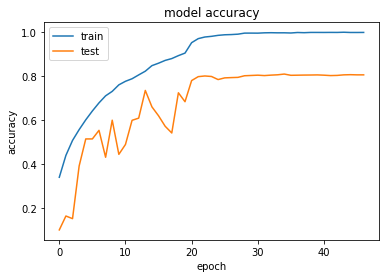

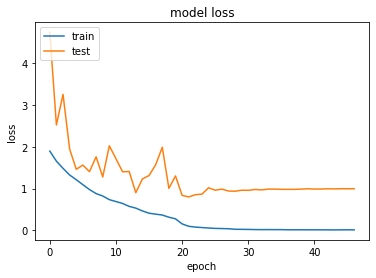

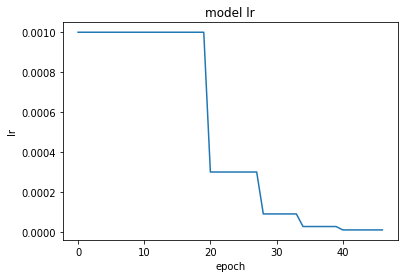

starting bb0 18:51:05
bb0 batch 0 18:51:06
bb0 batch 1 19:03:04
bb0 batch 2 19:15:12
bb0 batch 3 19:27:23
ending bb0 19:39:29
starting pgd 19:39:29
pgd batch 0 19:39:29
pgd batch 1 19:39:49
pgd batch 2 19:40:10
pgd batch 3 19:40:31
ending pgd 19:40:52
starting cw 19:40:52
cw batch 0 19:40:52
cw batch 1 19:47:51
cw batch 2 19:54:49
cw batch 3 20:05:40



1it [1:31:20, 5480.41s/it]

ending cw 20:12:38
current pruning ratio is0.5, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 173ms/step - loss: 0.1015 - accuracy: 0.9650 - val_loss: 1.2488 - val_accuracy: 0.7493 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0937 - accuracy: 0.9690 - val_loss: 1.1716 - val_accuracy: 0.7455 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 13s 169ms/step - loss: 0.0947 - accuracy: 0.9667 - val_loss: 1.3421 - val_accuracy: 0.7289 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0856 - accuracy: 0.9718 - val_loss: 1.1288 - val_accuracy: 0.7659 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 13s 170ms/step - loss: 0.0841 - accuracy: 0.9734 - val_loss: 1.3893 - val_accuracy: 0.7511 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0905 - accuracy: 0.9699 - val_loss: 1.1591 - val_accuracy: 0.7689 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 13s 170ms/step - 

Epoch 52/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 1.1942 - val_accuracy: 0.8036 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 1.1991 - val_accuracy: 0.8041 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 1.1975 - val_accuracy: 0.8033 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 1.1995 - val_accuracy: 0.8041 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 1.1910 - val_accuracy: 0.8046 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 1.1919 - val_accuracy: 0.8046 - lr: 1.0000e-05
Epoch 58/100
74/74 [========

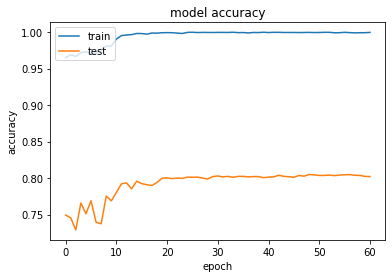

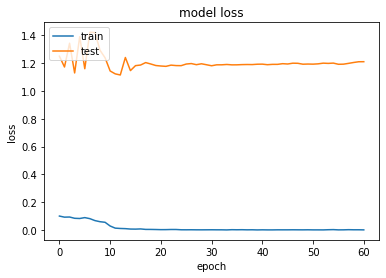

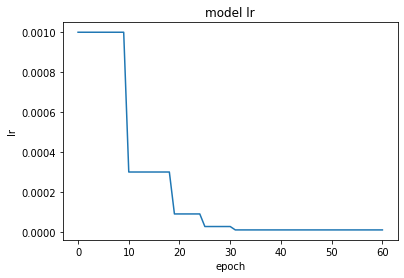

starting bb0 20:25:26
bb0 batch 0 20:25:26
bb0 batch 1 20:37:33
bb0 batch 2 20:49:44
bb0 batch 3 21:01:50
ending bb0 21:13:47
starting pgd 21:13:47
pgd batch 0 21:13:47
pgd batch 1 21:14:08
pgd batch 2 21:14:28
pgd batch 3 21:14:49
ending pgd 21:15:10
starting cw 21:15:10
cw batch 0 21:15:10
cw batch 1 21:22:09
cw batch 2 21:29:09
cw batch 3 21:46:10



2it [3:23:27, 5854.31s/it]

ending cw 22:04:45
current pruning ratio is0.75, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 0.0780 - accuracy: 0.9755 - val_loss: 1.3647 - val_accuracy: 0.7085 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 169ms/step - loss: 0.0351 - accuracy: 0.9895 - val_loss: 1.4725 - val_accuracy: 0.7332 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0394 - accuracy: 0.9854 - val_loss: 1.2744 - val_accuracy: 0.7715 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 169ms/step - loss: 0.0413 - accuracy: 0.9864 - val_loss: 2.0204 - val_accuracy: 0.6828 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0361 - accuracy: 0.9874 - val_loss: 1.2888 - val_accuracy: 0.7651 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0355 - accuracy: 0.9895 - val_loss: 1.5134 - val_accuracy: 0.7511 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

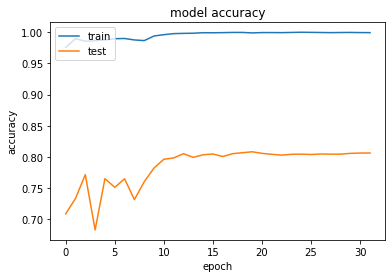

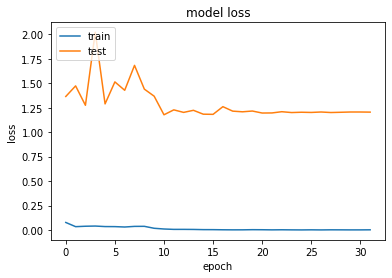

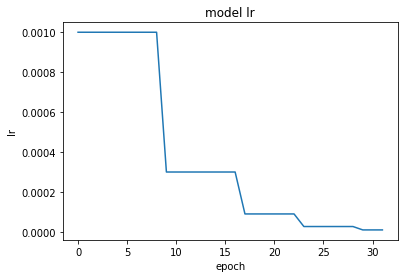

starting bb0 22:11:30
bb0 batch 0 22:11:30
bb0 batch 1 22:23:38
bb0 batch 2 22:35:49
bb0 batch 3 22:47:50
ending bb0 22:59:54
starting pgd 22:59:54
pgd batch 0 22:59:54
pgd batch 1 23:00:15
pgd batch 2 23:00:35
pgd batch 3 23:00:56
ending pgd 23:01:17
starting cw 23:01:17
cw batch 0 23:01:17
cw batch 1 23:08:15
cw batch 2 23:15:13
cw batch 3 23:25:17



3it [4:55:35, 5756.43s/it]

ending cw 23:36:53
current pruning ratio is0.875, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 173ms/step - loss: 0.3249 - accuracy: 0.8996 - val_loss: 2.4727 - val_accuracy: 0.3641 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 165ms/step - loss: 0.1006 - accuracy: 0.9679 - val_loss: 1.4305 - val_accuracy: 0.6479 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0597 - accuracy: 0.9808 - val_loss: 1.0920 - val_accuracy: 0.7470 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 1.1752 - val_accuracy: 0.7636 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0381 - accuracy: 0.9883 - val_loss: 1.1289 - val_accuracy: 0.7781 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 1.1838 - val_accuracy: 0.7847 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 165ms/step - 

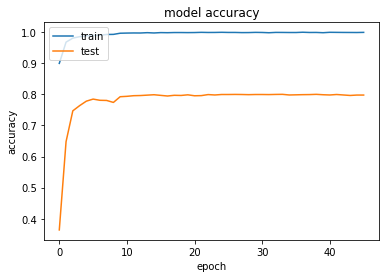

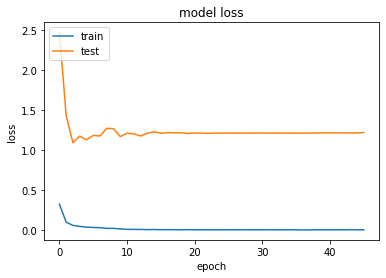

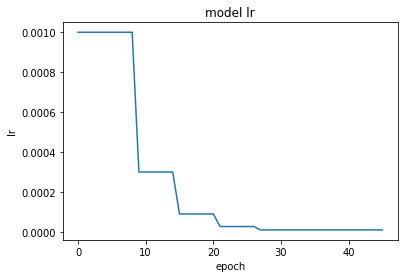

starting bb0 23:46:34
bb0 batch 0 23:46:34
bb0 batch 1 23:58:46
bb0 batch 2 00:11:03
bb0 batch 3 00:23:17
ending bb0 00:35:19
starting pgd 00:35:19
pgd batch 0 00:35:19
pgd batch 1 00:35:40
pgd batch 2 00:36:01
pgd batch 3 00:36:21
ending pgd 00:36:42
starting cw 00:36:42
cw batch 0 00:36:42
cw batch 1 00:43:40
cw batch 2 00:50:39
cw batch 3 00:57:37



4it [6:23:18, 5608.36s/it]

ending cw 01:04:36
current pruning ratio is0.9375, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 1.3582 - accuracy: 0.6101 - val_loss: 3.1731 - val_accuracy: 0.1335 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 0.5916 - accuracy: 0.7955 - val_loss: 2.6674 - val_accuracy: 0.2953 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 0.3944 - accuracy: 0.8661 - val_loss: 1.6807 - val_accuracy: 0.5348 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2961 - accuracy: 0.8993 - val_loss: 1.1917 - val_accuracy: 0.6922 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2215 - accuracy: 0.9250 - val_loss: 0.9674 - val_accuracy: 0.7503 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.1732 - accuracy: 0.9440 - val_loss: 0.9591 - val_accuracy: 0.7648 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

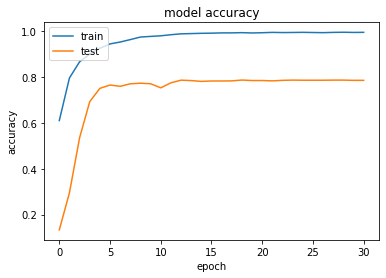

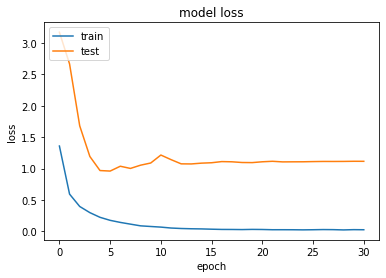

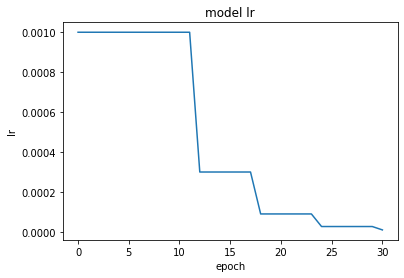

starting bb0 01:11:08
bb0 batch 0 01:11:09
bb0 batch 1 01:22:55
bb0 batch 2 01:34:45
bb0 batch 3 01:46:39
ending bb0 01:58:34
starting pgd 01:58:34
pgd batch 0 01:58:34
pgd batch 1 01:58:55
pgd batch 2 01:59:16
pgd batch 3 01:59:36
ending pgd 01:59:57
starting cw 01:59:57
cw batch 0 01:59:57
cw batch 1 02:06:55
cw batch 2 02:13:54
cw batch 3 02:20:52



5it [7:46:32, 5424.10s/it]

ending cw 02:27:50
current pruning ratio is0.96875, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 173ms/step - loss: 1.8413 - accuracy: 0.4476 - val_loss: 3.3048 - val_accuracy: 0.1259 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 1.0100 - accuracy: 0.6617 - val_loss: 2.0426 - val_accuracy: 0.3715 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 0.7488 - accuracy: 0.7517 - val_loss: 1.3047 - val_accuracy: 0.5929 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.5955 - accuracy: 0.8001 - val_loss: 1.0101 - val_accuracy: 0.6866 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.5102 - accuracy: 0.8260 - val_loss: 0.9683 - val_accuracy: 0.7047 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.4304 - accuracy: 0.8537 - val_loss: 0.9125 - val_accuracy: 0.7282 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

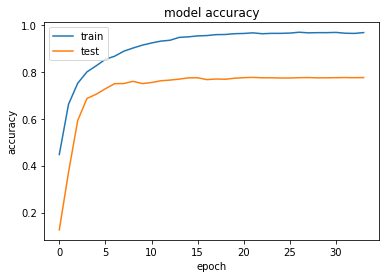

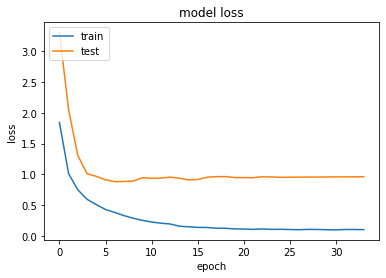

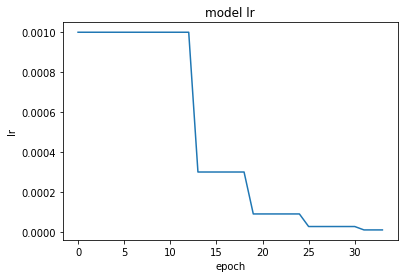

starting bb0 02:34:59
bb0 batch 0 02:34:59
bb0 batch 1 02:43:38
bb0 batch 2 02:52:13
bb0 batch 3 03:00:56
ending bb0 03:09:38
starting pgd 03:09:38
pgd batch 0 03:09:38
pgd batch 1 03:09:59
pgd batch 2 03:10:20
pgd batch 3 03:10:40
ending pgd 03:11:01
starting cw 03:11:01
cw batch 0 03:11:01
cw batch 1 03:18:00
cw batch 2 03:24:59
cw batch 3 03:31:57



6it [8:57:39, 5077.02s/it]

ending cw 03:38:57
current pruning ratio is0.984375, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 2.4259 - accuracy: 0.2695 - val_loss: 3.5115 - val_accuracy: 0.1045 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 1.7375 - accuracy: 0.4080 - val_loss: 3.0088 - val_accuracy: 0.1664 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 1.5029 - accuracy: 0.4928 - val_loss: 2.1889 - val_accuracy: 0.3411 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 1.3409 - accuracy: 0.5441 - val_loss: 1.8100 - val_accuracy: 0.4255 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 1.2023 - accuracy: 0.6007 - val_loss: 1.5636 - val_accuracy: 0.4910 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 1.1057 - accuracy: 0.6248 - val_loss: 1.8210 - val_accuracy: 0.4247 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

74/74 [==============================] - 12s 164ms/step - loss: 0.4132 - accuracy: 0.8589 - val_loss: 0.8804 - val_accuracy: 0.7475 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.4125 - accuracy: 0.8609 - val_loss: 0.8821 - val_accuracy: 0.7457 - lr: 1.0000e-05


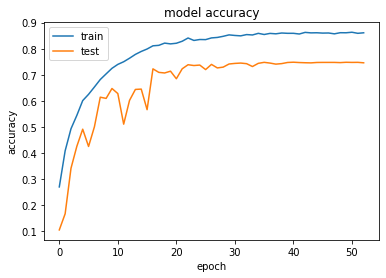

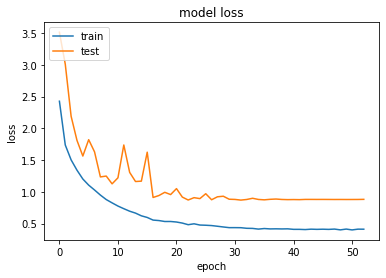

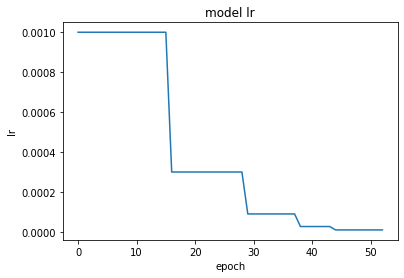

starting bb0 03:50:02
bb0 batch 0 03:50:02
bb0 batch 1 03:57:08
bb0 batch 2 04:04:11
bb0 batch 3 04:11:15
ending bb0 04:18:18
starting pgd 04:18:18
pgd batch 0 04:18:18
pgd batch 1 04:18:39
pgd batch 2 04:19:00
pgd batch 3 04:19:20
ending pgd 04:19:41
starting cw 04:19:41
cw batch 0 04:19:41
cw batch 1 04:26:40
cw batch 2 04:33:38
cw batch 3 04:40:36



7it [10:06:16, 5196.66s/it]
100%|██████████| 2/2 [20:39:26<00:00, 37183.29s/it]   

ending cw 04:47:34


In [9]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

  0%|          | 0/2 [00:00<?, ?it/s]

74/74 [==============================] - 12s 168ms/step - loss: 2.3716 - accuracy: 0.2352 - val_loss: 2.3281 - val_accuracy: 0.0859



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 1.9567 - accuracy: 0.3146 - val_loss: 2.2893 - val_accuracy: 0.1490 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 1.7654 - accuracy: 0.3912 - val_loss: 2.2029 - val_accuracy: 0.1761 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 169ms/step - loss: 1.5814 - accuracy: 0.4676 - val_loss: 2.3454 - val_accuracy: 0.2214 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 1.4376 - accuracy: 0.5190 - val_loss: 1.7754 - val_accuracy: 0.4204 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 1.2871 - accuracy: 0.5778 - val_loss: 1.7050 - val_accuracy: 0.4354 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 1.1524 - accuracy: 0.6225 - val_loss: 2.0129 - val_accuracy: 0.4489 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

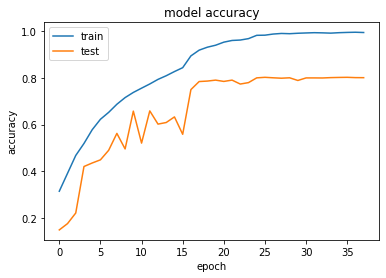

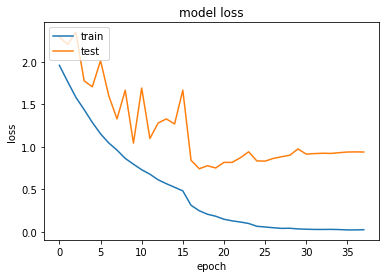

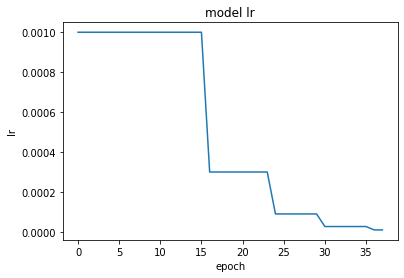

starting bb0 04:55:49
bb0 batch 0 04:55:49
bb0 batch 1 05:08:06
bb0 batch 2 05:20:22
bb0 batch 3 05:32:37
ending bb0 05:44:55
starting pgd 05:44:55
pgd batch 0 05:44:55
pgd batch 1 05:45:16
pgd batch 2 05:45:37
pgd batch 3 05:45:58
ending pgd 05:46:19
starting cw 05:46:19
cw batch 0 05:46:19
cw batch 1 05:53:18
cw batch 2 06:00:16
cw batch 3 06:07:15



1it [1:26:24, 5184.01s/it]

ending cw 06:14:13
current pruning ratio is0.5, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.8608 - accuracy: 0.7182 - val_loss: 2.4189 - val_accuracy: 0.1292 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 162ms/step - loss: 0.5969 - accuracy: 0.7993 - val_loss: 1.7484 - val_accuracy: 0.4296 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.4760 - accuracy: 0.8433 - val_loss: 1.2366 - val_accuracy: 0.6265 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.4243 - accuracy: 0.8537 - val_loss: 1.0552 - val_accuracy: 0.6825 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 0.3843 - accuracy: 0.8730 - val_loss: 1.0115 - val_accuracy: 0.7134 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 168ms/step - loss: 0.3504 - accuracy: 0.8840 - val_loss: 2.4368 - val_accuracy: 0.4818 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

74/74 [==============================] - 12s 164ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 1.1256 - val_accuracy: 0.8094 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 1.1303 - val_accuracy: 0.8099 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 1.1329 - val_accuracy: 0.8089 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 1.1320 - val_accuracy: 0.8104 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 1.1301 - val_accuracy: 0.8117 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 1.1305 - val_accuracy: 0.8110 - lr: 1.0000e-05


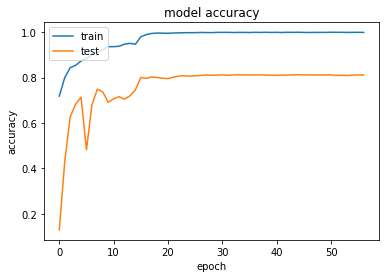

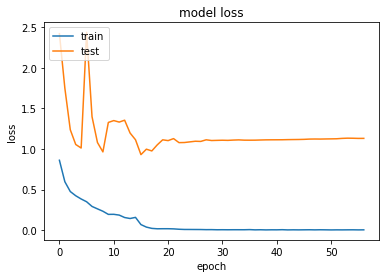

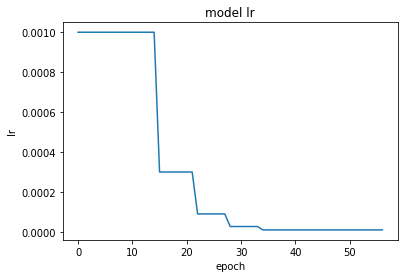

starting bb0 06:28:37
bb0 batch 0 06:28:37
bb0 batch 1 06:40:54
bb0 batch 2 06:53:16
bb0 batch 3 07:05:18
ending bb0 07:17:35
starting pgd 07:17:35
pgd batch 0 07:17:35
pgd batch 1 07:17:55
pgd batch 2 07:18:16
pgd batch 3 07:18:37
ending pgd 07:18:58
starting cw 07:18:58
cw batch 0 07:18:58
cw batch 1 07:25:57
cw batch 2 07:32:56
cw batch 3 07:39:54



2it [3:09:08, 5478.04s/it]

ending cw 07:56:57
current pruning ratio is0.75, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 1.0416 - accuracy: 0.6562 - val_loss: 2.5348 - val_accuracy: 0.1378 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 0.6326 - accuracy: 0.7907 - val_loss: 1.8548 - val_accuracy: 0.3473 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.5053 - accuracy: 0.8311 - val_loss: 1.3078 - val_accuracy: 0.5827 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.4131 - accuracy: 0.8641 - val_loss: 0.9174 - val_accuracy: 0.7236 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 0.3366 - accuracy: 0.8871 - val_loss: 0.8788 - val_accuracy: 0.7529 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.3030 - accuracy: 0.8950 - val_loss: 0.9863 - val_accuracy: 0.7462 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

Epoch 52/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 1.0562 - val_accuracy: 0.8176 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 1.0613 - val_accuracy: 0.8173 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 1.0691 - val_accuracy: 0.8166 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 1.0668 - val_accuracy: 0.8163 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 1.0671 - val_accuracy: 0.8178 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 1.0721 - val_accuracy: 0.8155 - lr: 1.0000e-05
Epoch 58/100
74/74 [========

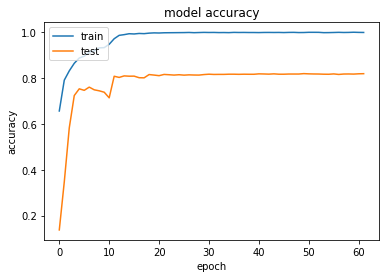

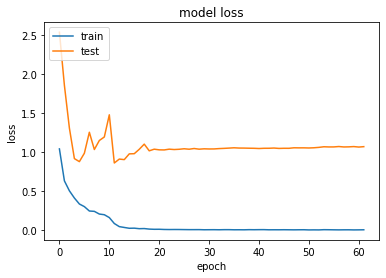

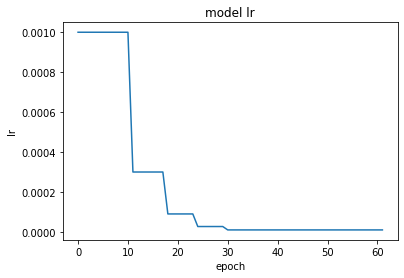

starting bb0 08:11:08
bb0 batch 0 08:11:08
bb0 batch 1 08:23:17
bb0 batch 2 08:35:35
bb0 batch 3 08:47:53
ending bb0 09:00:03
starting pgd 09:00:03
pgd batch 0 09:00:03
pgd batch 1 09:00:24
pgd batch 2 09:00:45
pgd batch 3 09:01:05
ending pgd 09:01:26
starting cw 09:01:26
cw batch 0 09:01:26
cw batch 1 09:08:25
cw batch 2 09:15:23
cw batch 3 09:22:21



3it [4:47:43, 5609.13s/it]

ending cw 09:35:32
current pruning ratio is0.875, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 1.6653 - accuracy: 0.4388 - val_loss: 2.4112 - val_accuracy: 0.0983 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 168ms/step - loss: 1.1365 - accuracy: 0.6278 - val_loss: 2.4170 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.9551 - accuracy: 0.6873 - val_loss: 1.7264 - val_accuracy: 0.4201 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.8163 - accuracy: 0.7301 - val_loss: 1.0744 - val_accuracy: 0.6543 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.6969 - accuracy: 0.7686 - val_loss: 1.2359 - val_accuracy: 0.6403 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.6367 - accuracy: 0.7927 - val_loss: 1.4134 - val_accuracy: 0.6076 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

74/74 [==============================] - 12s 164ms/step - loss: 0.0170 - accuracy: 0.9955 - val_loss: 1.0633 - val_accuracy: 0.8038 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0148 - accuracy: 0.9967 - val_loss: 1.0651 - val_accuracy: 0.8038 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0144 - accuracy: 0.9964 - val_loss: 1.0624 - val_accuracy: 0.8054 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0154 - accuracy: 0.9967 - val_loss: 1.0606 - val_accuracy: 0.8033 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0179 - accuracy: 0.9949 - val_loss: 1.0608 - val_accuracy: 0.8054 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0150 - accuracy: 0.9966 - val_loss: 1.0686 - val_accuracy: 0.8036 - lr: 1.0000e-05
Epoch 58/100
74/74 [=====================

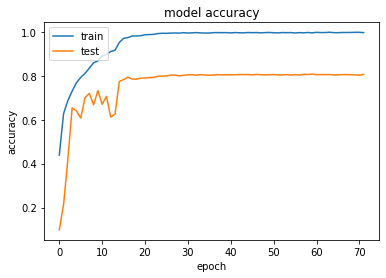

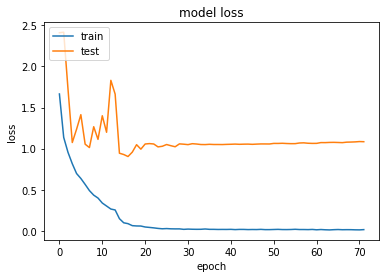

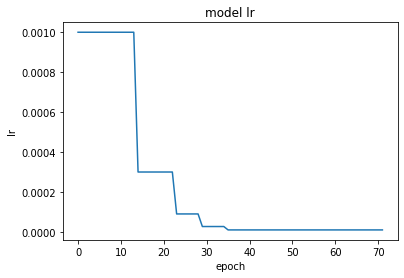

starting bb0 09:51:09
bb0 batch 0 09:51:09
bb0 batch 1 10:03:25
bb0 batch 2 10:15:40
bb0 batch 3 10:27:57
ending bb0 10:40:15
starting pgd 10:40:15
pgd batch 0 10:40:15
pgd batch 1 10:40:36
pgd batch 2 10:40:56
pgd batch 3 10:41:17
ending pgd 10:41:38
starting cw 10:41:38
cw batch 0 10:41:38
cw batch 1 10:48:36
cw batch 2 10:55:35
cw batch 3 11:02:34



4it [6:21:43, 5618.51s/it]

ending cw 11:09:32
current pruning ratio is0.9375, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 2.0423 - accuracy: 0.2854 - val_loss: 2.3563 - val_accuracy: 0.0991 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 168ms/step - loss: 1.5616 - accuracy: 0.4723 - val_loss: 2.6519 - val_accuracy: 0.1118 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 168ms/step - loss: 1.3245 - accuracy: 0.5596 - val_loss: 3.0246 - val_accuracy: 0.1294 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 1.1585 - accuracy: 0.6209 - val_loss: 2.0633 - val_accuracy: 0.2823 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 168ms/step - loss: 1.0490 - accuracy: 0.6531 - val_loss: 5.9021 - val_accuracy: 0.0869 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.9455 - accuracy: 0.6895 - val_loss: 4.7216 - val_accuracy: 0.1093 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

Epoch 52/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0655 - accuracy: 0.9834 - val_loss: 1.0658 - val_accuracy: 0.7676 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0684 - accuracy: 0.9809 - val_loss: 1.0650 - val_accuracy: 0.7654 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0669 - accuracy: 0.9801 - val_loss: 1.0634 - val_accuracy: 0.7659 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0679 - accuracy: 0.9805 - val_loss: 1.0704 - val_accuracy: 0.7656 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0640 - accuracy: 0.9832 - val_loss: 1.0745 - val_accuracy: 0.7641 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0665 - accuracy: 0.9814 - val_loss: 1.0763 - val_accuracy: 0.7625 - lr: 1.0000e-05
Epoch 58/100
74/74 [========

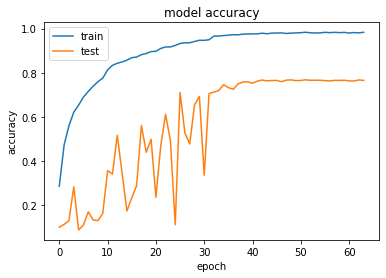

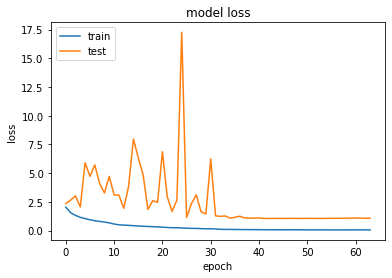

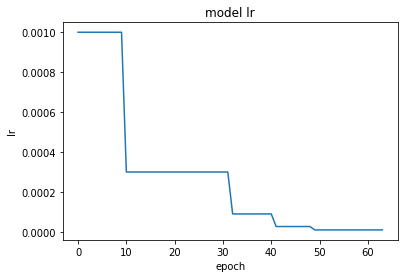

starting bb0 11:23:12
bb0 batch 0 11:23:12
bb0 batch 1 11:34:20
bb0 batch 2 11:45:40
bb0 batch 3 11:56:57
ending bb0 12:08:17
starting pgd 12:08:17
pgd batch 0 12:08:17
pgd batch 1 12:08:37
pgd batch 2 12:08:58
pgd batch 3 12:09:19
ending pgd 12:09:40
starting cw 12:09:40
cw batch 0 12:09:40
cw batch 1 12:16:38
cw batch 2 12:23:36
cw batch 3 12:30:34



5it [7:49:43, 5516.82s/it]

ending cw 12:37:32
current pruning ratio is0.96875, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 1.9985 - accuracy: 0.3021 - val_loss: 2.9669 - val_accuracy: 0.0854 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 1.6295 - accuracy: 0.4494 - val_loss: 2.7059 - val_accuracy: 0.1246 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 167ms/step - loss: 1.4028 - accuracy: 0.5350 - val_loss: 4.8901 - val_accuracy: 0.1073 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 168ms/step - loss: 1.2996 - accuracy: 0.5641 - val_loss: 64.8039 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 1.1892 - accuracy: 0.6051 - val_loss: 13.5073 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 1.1174 - accuracy: 0.6268 - val_loss: 3.0763 - val_accuracy: 0.2181 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step 

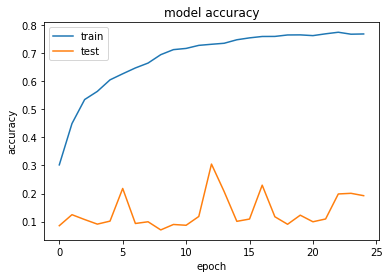

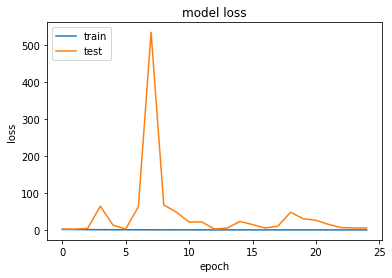

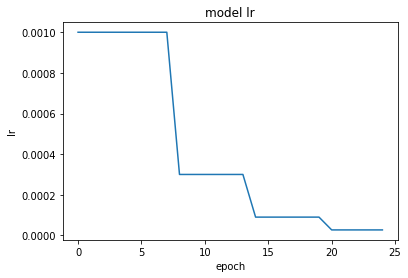

starting pgd 12:42:59
pgd batch 0 12:42:59
pgd batch 1 12:43:19
pgd batch 2 12:43:40
pgd batch 3 12:44:01
ending pgd 12:44:22
starting cw 12:44:22
cw batch 0 12:44:22
cw batch 1 12:51:20
cw batch 2 12:58:18
cw batch 3 13:05:17



6it [8:24:25, 4486.53s/it]

ending cw 13:12:14
current pruning ratio is0.984375, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 2.1581 - accuracy: 0.2211 - val_loss: 7.4094 - val_accuracy: 0.1068 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 168ms/step - loss: 1.8947 - accuracy: 0.3426 - val_loss: 16.5983 - val_accuracy: 0.1068 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 168ms/step - loss: 1.6519 - accuracy: 0.4415 - val_loss: 953.3538 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 1.5080 - accuracy: 0.4919 - val_loss: 206.6461 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 168ms/step - loss: 1.4224 - accuracy: 0.5242 - val_loss: 5968.0659 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 168ms/step - loss: 1.3354 - accuracy: 0.5545 - val_loss: 17144.6914 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 1

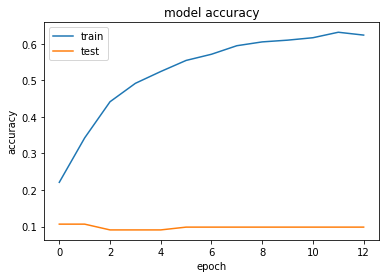

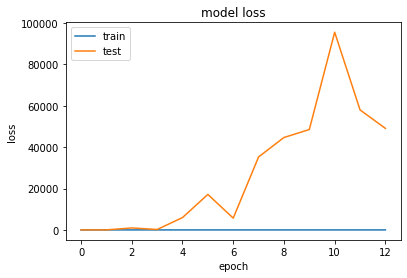

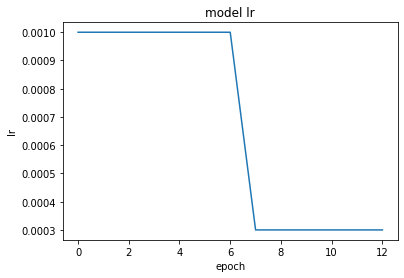

starting pgd 13:15:10
pgd batch 0 13:15:10
pgd batch 1 13:15:31
pgd batch 2 13:15:52
pgd batch 3 13:16:13
ending pgd 13:16:34
starting cw 13:16:34
cw batch 0 13:16:34
cw batch 1 13:23:32
cw batch 2 13:30:31
cw batch 3 13:37:29



7it [8:56:38, 4599.77s/it]
 50%|█████     | 1/2 [8:56:52<8:56:52, 32212.61s/it]

ending cw 13:44:27


74/74 [==============================] - 12s 167ms/step - loss: 2.2539 - accuracy: 0.2455 - val_loss: 2.7656 - val_accuracy: 0.1157



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 172ms/step - loss: 1.9103 - accuracy: 0.3327 - val_loss: 2.3344 - val_accuracy: 0.1190 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 169ms/step - loss: 1.6950 - accuracy: 0.4183 - val_loss: 2.5034 - val_accuracy: 0.1595 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 169ms/step - loss: 1.5492 - accuracy: 0.4778 - val_loss: 2.5553 - val_accuracy: 0.2082 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 1.4168 - accuracy: 0.5231 - val_loss: 1.9515 - val_accuracy: 0.3707 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 169ms/step - loss: 1.3087 - accuracy: 0.5637 - val_loss: 4.8017 - val_accuracy: 0.1327 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 1.1844 - accuracy: 0.6061 - val_loss: 1.3932 - val_accuracy: 0.5437 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

74/74 [==============================] - 12s 165ms/step - loss: 0.0100 - accuracy: 0.9981 - val_loss: 1.0909 - val_accuracy: 0.7972 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0095 - accuracy: 0.9980 - val_loss: 1.0947 - val_accuracy: 0.7952 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0080 - accuracy: 0.9986 - val_loss: 1.0950 - val_accuracy: 0.7964 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0086 - accuracy: 0.9980 - val_loss: 1.0941 - val_accuracy: 0.7962 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0092 - accuracy: 0.9982 - val_loss: 1.0999 - val_accuracy: 0.7952 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0089 - accuracy: 0.9980 - val_loss: 1.0984 - val_accuracy: 0.7954 - lr: 1.0000e-05
Epoch 58/100
74/74 [=====================

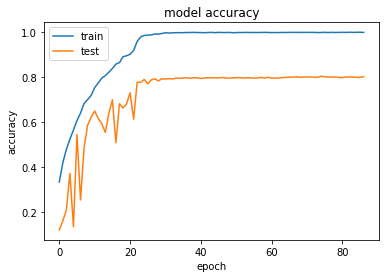

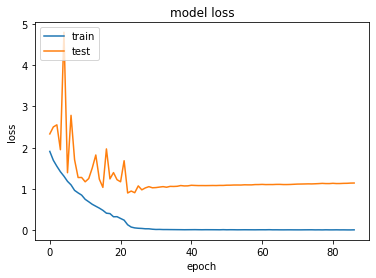

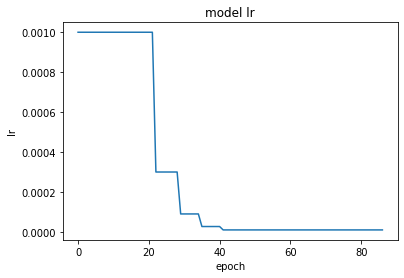

starting bb0 14:02:53
bb0 batch 0 14:02:53
bb0 batch 1 14:14:59
bb0 batch 2 14:27:01
bb0 batch 3 14:39:13
ending bb0 14:51:12
starting pgd 14:51:12
pgd batch 0 14:51:12
pgd batch 1 14:51:33
pgd batch 2 14:51:54
pgd batch 3 14:52:15
ending pgd 14:52:35
starting cw 14:52:36
cw batch 0 14:52:36
cw batch 1 14:59:34
cw batch 2 15:06:33
cw batch 3 15:13:32



1it [1:55:15, 6915.01s/it]

ending cw 15:39:56
current pruning ratio is0.5, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.6759 - accuracy: 0.7767 - val_loss: 2.8260 - val_accuracy: 0.1478 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 0.4122 - accuracy: 0.8614 - val_loss: 1.9824 - val_accuracy: 0.3806 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.3347 - accuracy: 0.8880 - val_loss: 1.0997 - val_accuracy: 0.6749 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2859 - accuracy: 0.9044 - val_loss: 1.1911 - val_accuracy: 0.6838 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 0.2476 - accuracy: 0.9148 - val_loss: 1.0849 - val_accuracy: 0.7126 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.1985 - accuracy: 0.9352 - val_loss: 1.2711 - val_accuracy: 0.7055 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

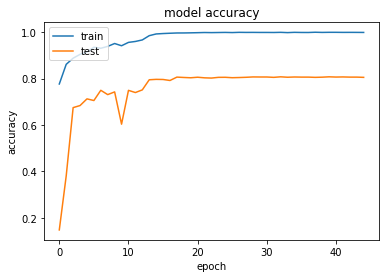

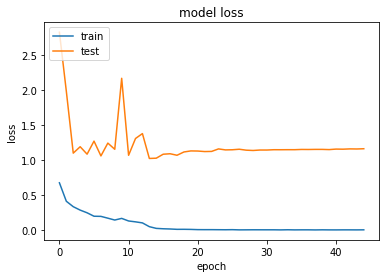

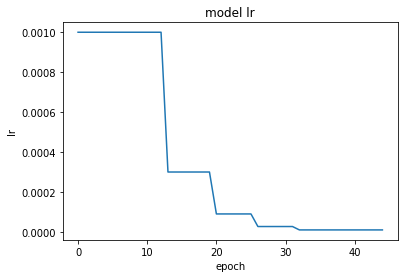

starting bb0 15:51:51
bb0 batch 0 15:51:51
bb0 batch 1 16:04:05
bb0 batch 2 16:16:21
bb0 batch 3 16:28:33
ending bb0 16:40:41
starting pgd 16:40:41
pgd batch 0 16:40:41
pgd batch 1 16:41:02
pgd batch 2 16:41:23
pgd batch 3 16:41:43
ending pgd 16:42:04
starting cw 16:42:04
cw batch 0 16:42:04
cw batch 1 16:49:02
cw batch 2 16:56:02
cw batch 3 17:10:45



2it [3:45:25, 6823.68s/it]

ending cw 17:30:07
current pruning ratio is0.75, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 173ms/step - loss: 1.3142 - accuracy: 0.5597 - val_loss: 2.4927 - val_accuracy: 0.1180 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 0.8640 - accuracy: 0.7141 - val_loss: 2.0751 - val_accuracy: 0.3641 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.6730 - accuracy: 0.7729 - val_loss: 1.5352 - val_accuracy: 0.5159 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.5522 - accuracy: 0.8144 - val_loss: 1.5795 - val_accuracy: 0.5485 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 0.4607 - accuracy: 0.8479 - val_loss: 1.0642 - val_accuracy: 0.7065 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.3801 - accuracy: 0.8746 - val_loss: 1.1005 - val_accuracy: 0.7131 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

74/74 [==============================] - 12s 164ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 1.1105 - val_accuracy: 0.8087 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 1.1142 - val_accuracy: 0.8059 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 1.1111 - val_accuracy: 0.8064 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 1.1138 - val_accuracy: 0.8064 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 1.1217 - val_accuracy: 0.8074 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 1.1237 - val_accuracy: 0.8076 - lr: 1.0000e-05
Epoch 58/100
74/74 [=====================

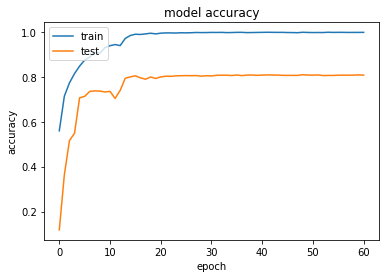

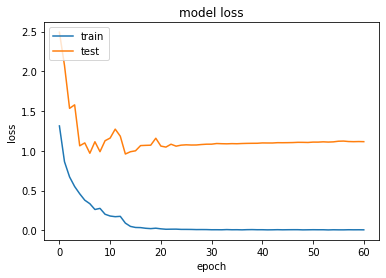

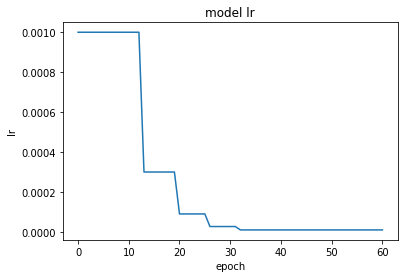

starting bb0 17:44:06
bb0 batch 0 17:44:06
bb0 batch 1 17:56:23
bb0 batch 2 18:08:36
bb0 batch 3 18:20:42
ending bb0 18:32:56
starting pgd 18:32:56
pgd batch 0 18:32:56
pgd batch 1 18:33:17
pgd batch 2 18:33:38
pgd batch 3 18:33:59
ending pgd 18:34:20
starting cw 18:34:20
cw batch 0 18:34:20
cw batch 1 18:41:19
cw batch 2 18:48:18
cw batch 3 18:55:16



3it [5:22:11, 6518.30s/it]

ending cw 19:06:52
current pruning ratio is0.875, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 1.7513 - accuracy: 0.3949 - val_loss: 2.4707 - val_accuracy: 0.0983 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 167ms/step - loss: 1.2646 - accuracy: 0.5815 - val_loss: 2.6934 - val_accuracy: 0.1297 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 1.0342 - accuracy: 0.6566 - val_loss: 2.2320 - val_accuracy: 0.2558 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 0.8875 - accuracy: 0.7052 - val_loss: 2.5814 - val_accuracy: 0.2958 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 0.7496 - accuracy: 0.7549 - val_loss: 1.1206 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.6770 - accuracy: 0.7746 - val_loss: 1.3212 - val_accuracy: 0.5941 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

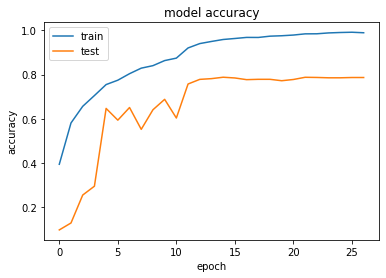

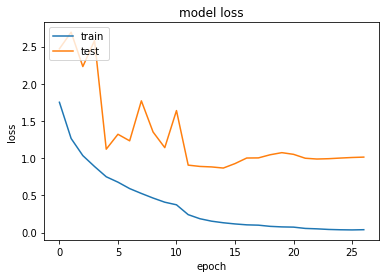

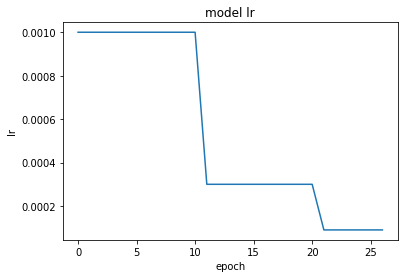

starting bb0 19:13:13
bb0 batch 0 19:13:13
bb0 batch 1 19:25:19
bb0 batch 2 19:37:29
bb0 batch 3 19:49:40
ending bb0 20:01:49
starting pgd 20:01:49
pgd batch 0 20:01:49
pgd batch 1 20:02:10
pgd batch 2 20:02:31
pgd batch 3 20:02:51
ending pgd 20:03:12
starting cw 20:03:12
cw batch 0 20:03:12
cw batch 1 20:10:12
cw batch 2 20:17:11
cw batch 3 20:24:09



4it [6:46:26, 6079.41s/it]

ending cw 20:31:08
current pruning ratio is0.9375, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 1.7794 - accuracy: 0.3979 - val_loss: 2.8906 - val_accuracy: 0.1182 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 168ms/step - loss: 1.3064 - accuracy: 0.5689 - val_loss: 4.3985 - val_accuracy: 0.1312 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 1.1033 - accuracy: 0.6355 - val_loss: 3.7005 - val_accuracy: 0.1697 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.9866 - accuracy: 0.6757 - val_loss: 3.8645 - val_accuracy: 0.1975 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 0.8743 - accuracy: 0.7118 - val_loss: 3.4048 - val_accuracy: 0.2369 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.7941 - accuracy: 0.7357 - val_loss: 2.4250 - val_accuracy: 0.3274 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 168ms/step - 

Epoch 52/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0667 - accuracy: 0.9815 - val_loss: 1.0841 - val_accuracy: 0.7592 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0696 - accuracy: 0.9816 - val_loss: 1.0805 - val_accuracy: 0.7631 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0619 - accuracy: 0.9819 - val_loss: 1.1024 - val_accuracy: 0.7603 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0646 - accuracy: 0.9816 - val_loss: 1.0910 - val_accuracy: 0.7610 - lr: 1.0000e-05


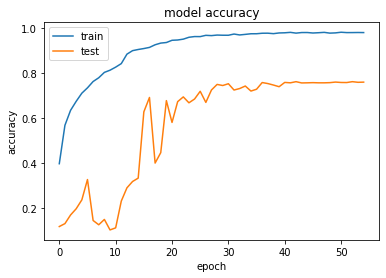

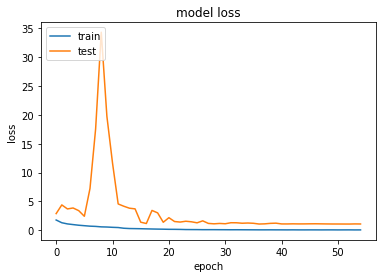

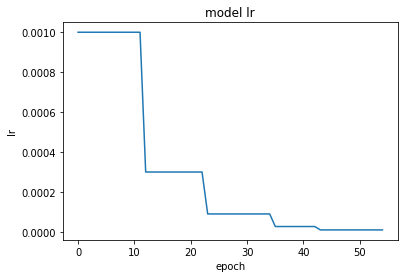

starting bb0 20:42:56
bb0 batch 0 20:42:56
bb0 batch 1 20:54:31
bb0 batch 2 21:06:08
bb0 batch 3 21:17:45
ending bb0 21:29:26
starting pgd 21:29:26
pgd batch 0 21:29:26
pgd batch 1 21:29:47
pgd batch 2 21:30:07
pgd batch 3 21:30:28
ending pgd 21:30:49
starting cw 21:30:49
cw batch 0 21:30:49
cw batch 1 21:37:47
cw batch 2 21:44:46
cw batch 3 21:51:44



5it [8:14:02, 5832.37s/it]

ending cw 21:58:44
current pruning ratio is0.96875, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 1.9250 - accuracy: 0.3352 - val_loss: 2.3260 - val_accuracy: 0.1052 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 168ms/step - loss: 1.4948 - accuracy: 0.5007 - val_loss: 4.8289 - val_accuracy: 0.0803 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 168ms/step - loss: 1.3115 - accuracy: 0.5645 - val_loss: 22.8697 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 168ms/step - loss: 1.1871 - accuracy: 0.6063 - val_loss: 50.3747 - val_accuracy: 0.0983 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 1.0976 - accuracy: 0.6360 - val_loss: 28.4447 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 168ms/step - loss: 1.0252 - accuracy: 0.6583 - val_loss: 119.0722 - val_accuracy: 0.0983 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 168ms/st

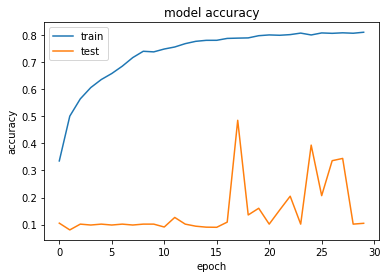

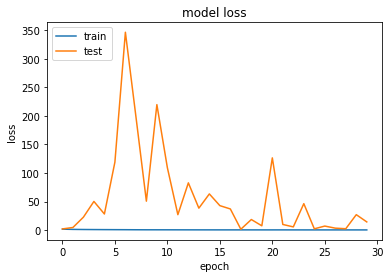

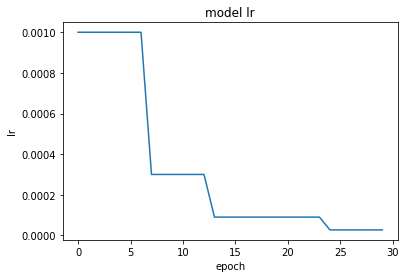

starting pgd 22:05:14
pgd batch 0 22:05:14
pgd batch 1 22:05:35
pgd batch 2 22:05:56
pgd batch 3 22:06:17
ending pgd 22:06:38
starting cw 22:06:38
cw batch 0 22:06:38
cw batch 1 22:13:36
cw batch 2 22:20:34
cw batch 3 22:27:33



6it [8:49:49, 4726.70s/it]

ending cw 22:34:31
current pruning ratio is0.984375, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 2.1046 - accuracy: 0.2554 - val_loss: 19.4564 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 167ms/step - loss: 1.8919 - accuracy: 0.3401 - val_loss: 34.0711 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 167ms/step - loss: 1.7360 - accuracy: 0.4034 - val_loss: 106.7201 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 167ms/step - loss: 1.6163 - accuracy: 0.4507 - val_loss: 821.3624 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 1.5118 - accuracy: 0.4809 - val_loss: 202.1645 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 1.4243 - accuracy: 0.5167 - val_loss: 157.6549 - val_accuracy: 0.1006 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163

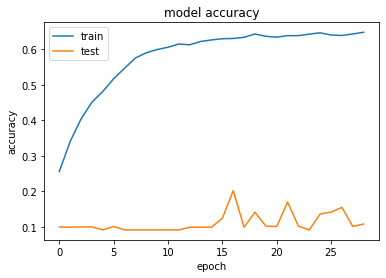

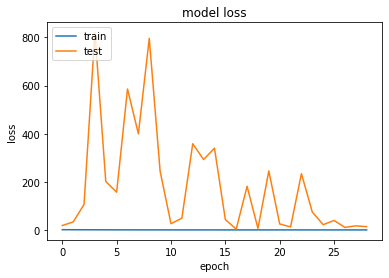

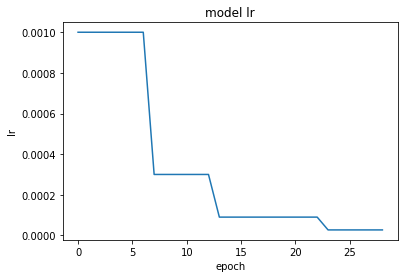

starting pgd 22:40:41
pgd batch 0 22:40:41
pgd batch 1 22:41:02
pgd batch 2 22:41:23
pgd batch 3 22:41:44
ending pgd 22:42:04
starting cw 22:42:05
cw batch 0 22:42:05
cw batch 1 22:49:02
cw batch 2 22:56:00
cw batch 3 23:02:58



7it [9:25:14, 4844.91s/it]
100%|██████████| 2/2 [18:22:21<00:00, 33070.56s/it] 

ending cw 23:09:55


In [10]:
run_experiment(
    structure='structured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/2 [00:00<?, ?it/s]

74/74 [==============================] - 12s 169ms/step - loss: 2.3764 - accuracy: 0.2256 - val_loss: 2.4220 - val_accuracy: 0.0910



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 1.9142 - accuracy: 0.3314 - val_loss: 2.3377 - val_accuracy: 0.1704 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 168ms/step - loss: 1.6978 - accuracy: 0.4236 - val_loss: 2.5470 - val_accuracy: 0.1381 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 164ms/step - loss: 1.5418 - accuracy: 0.4818 - val_loss: 2.3772 - val_accuracy: 0.2127 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 1.4000 - accuracy: 0.5336 - val_loss: 1.7045 - val_accuracy: 0.4341 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 1.2443 - accuracy: 0.5857 - val_loss: 1.5310 - val_accuracy: 0.5177 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 1.1190 - accuracy: 0.6297 - val_loss: 1.9551 - val_accuracy: 0.4015 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

74/74 [==============================] - 12s 165ms/step - loss: 0.0143 - accuracy: 0.9968 - val_loss: 1.0430 - val_accuracy: 0.8056 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 1.0448 - val_accuracy: 0.8041 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0137 - accuracy: 0.9964 - val_loss: 1.0466 - val_accuracy: 0.8036 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0135 - accuracy: 0.9966 - val_loss: 1.0509 - val_accuracy: 0.8046 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0139 - accuracy: 0.9970 - val_loss: 1.0487 - val_accuracy: 0.8046 - lr: 1.0000e-05


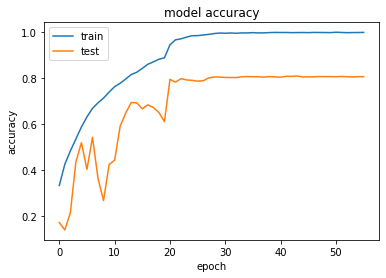

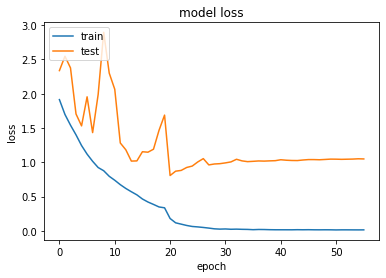

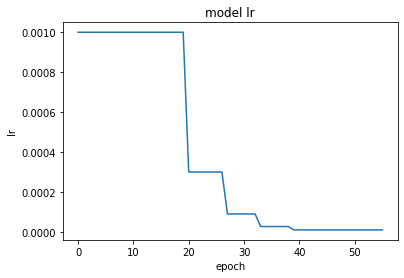

starting bb0 23:24:53
bb0 batch 0 23:24:53
bb0 batch 1 23:37:04
bb0 batch 2 23:49:18
bb0 batch 3 00:01:31
ending bb0 00:13:42
starting pgd 00:13:42
pgd batch 0 00:13:42
pgd batch 1 00:14:02
pgd batch 2 00:14:23
pgd batch 3 00:14:44
ending pgd 00:15:05
starting cw 00:15:05
cw batch 0 00:15:05
cw batch 1 00:22:04
cw batch 2 00:29:02
cw batch 3 00:36:02



1it [1:32:50, 5570.47s/it]

ending cw 00:43:01
current pruning ratio is0.5, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.2586 - accuracy: 0.9160 - val_loss: 1.0564 - val_accuracy: 0.7248 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 167ms/step - loss: 0.1862 - accuracy: 0.9372 - val_loss: 1.1948 - val_accuracy: 0.7144 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1714 - accuracy: 0.9433 - val_loss: 1.1194 - val_accuracy: 0.7417 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1528 - accuracy: 0.9496 - val_loss: 1.1495 - val_accuracy: 0.7241 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 168ms/step - loss: 0.1502 - accuracy: 0.9491 - val_loss: 1.6607 - val_accuracy: 0.6675 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 0.1384 - accuracy: 0.9546 - val_loss: 1.1977 - val_accuracy: 0.7452 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

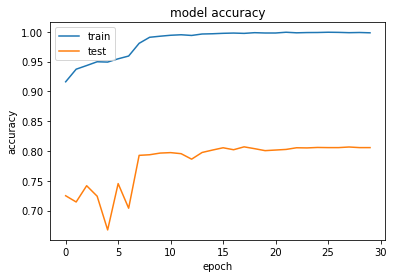

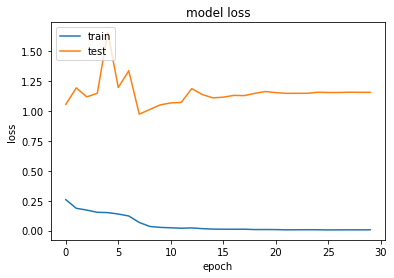

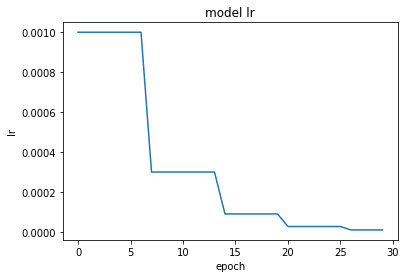

starting bb0 00:54:51
bb0 batch 0 00:54:51
bb0 batch 1 01:06:51
bb0 batch 2 01:19:00
bb0 batch 3 01:31:02
ending bb0 01:43:13
starting pgd 01:43:13
pgd batch 0 01:43:13
pgd batch 1 01:43:34
pgd batch 2 01:43:55
pgd batch 3 01:44:16
ending pgd 01:44:36
starting cw 01:44:37
cw batch 0 01:44:37
cw batch 1 01:51:35
cw batch 2 01:58:33
cw batch 3 02:05:32



2it [3:02:20, 5510.48s/it]

ending cw 02:12:31
current pruning ratio is0.75, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 0.3094 - accuracy: 0.9021 - val_loss: 1.4696 - val_accuracy: 0.6074 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1706 - accuracy: 0.9416 - val_loss: 1.3160 - val_accuracy: 0.7004 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1262 - accuracy: 0.9570 - val_loss: 1.4639 - val_accuracy: 0.7185 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1317 - accuracy: 0.9565 - val_loss: 1.2955 - val_accuracy: 0.7386 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1019 - accuracy: 0.9650 - val_loss: 1.2587 - val_accuracy: 0.7615 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0856 - accuracy: 0.9736 - val_loss: 1.4224 - val_accuracy: 0.7557 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

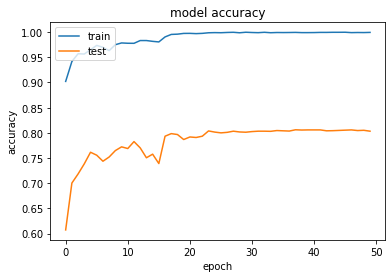

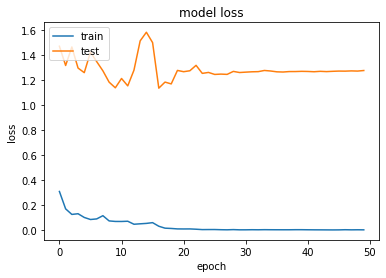

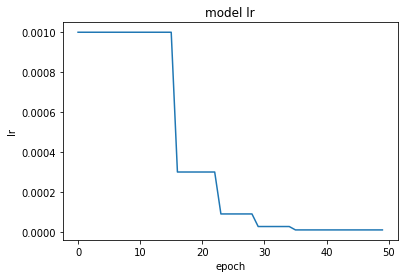

starting bb0 02:29:33
bb0 batch 0 02:29:33
bb0 batch 1 02:41:32
bb0 batch 2 02:53:35
bb0 batch 3 03:05:45
ending bb0 03:17:48
starting pgd 03:17:48
pgd batch 0 03:17:48
pgd batch 1 03:18:09
pgd batch 2 03:18:29
pgd batch 3 03:18:50
ending pgd 03:19:11
starting cw 03:19:11
cw batch 0 03:19:11
cw batch 1 03:26:09
cw batch 2 03:33:07
cw batch 3 03:40:05



3it [4:36:52, 5558.93s/it]

ending cw 03:47:03
current pruning ratio is0.875, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.8004 - accuracy: 0.7439 - val_loss: 1.8576 - val_accuracy: 0.4110 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 0.4297 - accuracy: 0.8604 - val_loss: 1.3899 - val_accuracy: 0.5862 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 162ms/step - loss: 0.2947 - accuracy: 0.9023 - val_loss: 1.3221 - val_accuracy: 0.6843 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2204 - accuracy: 0.9295 - val_loss: 1.4187 - val_accuracy: 0.7011 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1739 - accuracy: 0.9416 - val_loss: 1.5843 - val_accuracy: 0.6904 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1595 - accuracy: 0.9471 - val_loss: 1.3643 - val_accuracy: 0.7320 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

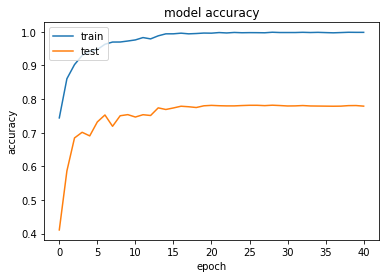

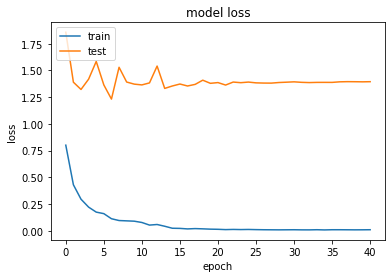

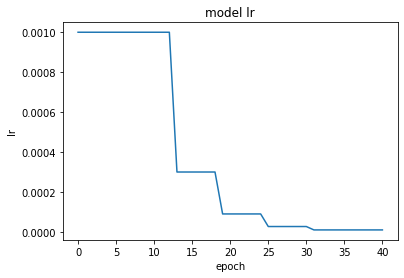

starting bb0 04:02:51
bb0 batch 0 04:02:51
bb0 batch 1 04:14:59
bb0 batch 2 04:27:04
bb0 batch 3 04:39:06
ending bb0 04:51:06
starting pgd 04:51:06
pgd batch 0 04:51:06
pgd batch 1 04:51:26
pgd batch 2 04:51:47
pgd batch 3 04:52:08
ending pgd 04:52:29
starting cw 04:52:29
cw batch 0 04:52:29
cw batch 1 04:59:27
cw batch 2 05:06:25
cw batch 3 05:13:23



4it [6:10:11, 5570.67s/it]

ending cw 05:20:21
current pruning ratio is0.9375, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 1.7151 - accuracy: 0.4288 - val_loss: 2.3740 - val_accuracy: 0.1722 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 168ms/step - loss: 1.2295 - accuracy: 0.5930 - val_loss: 2.3786 - val_accuracy: 0.2876 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 1.0271 - accuracy: 0.6614 - val_loss: 2.0862 - val_accuracy: 0.3248 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.8827 - accuracy: 0.7108 - val_loss: 2.0971 - val_accuracy: 0.3722 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 0.7893 - accuracy: 0.7413 - val_loss: 1.4827 - val_accuracy: 0.5345 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.7066 - accuracy: 0.7723 - val_loss: 1.4194 - val_accuracy: 0.5684 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

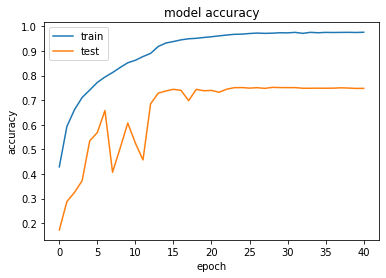

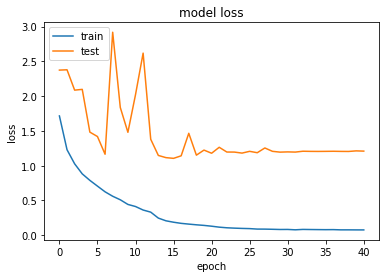

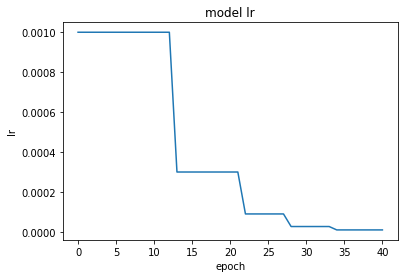

starting bb0 05:36:36
bb0 batch 0 05:36:36
bb0 batch 1 05:48:37
bb0 batch 2 06:00:36
bb0 batch 3 06:12:34
ending bb0 06:24:28
starting pgd 06:24:28
pgd batch 0 06:24:28
pgd batch 1 06:24:49
pgd batch 2 06:25:10
pgd batch 3 06:25:30
ending pgd 06:25:51
starting cw 06:25:51
cw batch 0 06:25:51
cw batch 1 06:32:49
cw batch 2 06:39:46
cw batch 3 06:46:44



5it [7:43:31, 5579.63s/it]

ending cw 06:53:42
current pruning ratio is0.96875, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 1.8432 - accuracy: 0.4036 - val_loss: 2.4474 - val_accuracy: 0.1129 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 167ms/step - loss: 1.3271 - accuracy: 0.5666 - val_loss: 2.4616 - val_accuracy: 0.1896 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 167ms/step - loss: 1.1182 - accuracy: 0.6345 - val_loss: 4.5949 - val_accuracy: 0.1541 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 1.0060 - accuracy: 0.6696 - val_loss: 3.3023 - val_accuracy: 0.1982 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 167ms/step - loss: 0.9034 - accuracy: 0.7037 - val_loss: 45.9022 - val_accuracy: 0.0797 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 167ms/step - loss: 0.8422 - accuracy: 0.7263 - val_loss: 153.6934 - val_accuracy: 0.0983 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step

Epoch 52/100
74/74 [==============================] - 12s 163ms/step - loss: 0.4075 - accuracy: 0.8613 - val_loss: 1.0573 - val_accuracy: 0.7009 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.4150 - accuracy: 0.8605 - val_loss: 1.0121 - val_accuracy: 0.7164 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 163ms/step - loss: 0.4135 - accuracy: 0.8645 - val_loss: 1.0103 - val_accuracy: 0.7187 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 163ms/step - loss: 0.4116 - accuracy: 0.8645 - val_loss: 1.0268 - val_accuracy: 0.7062 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 163ms/step - loss: 0.4075 - accuracy: 0.8652 - val_loss: 1.0152 - val_accuracy: 0.7152 - lr: 1.0000e-05


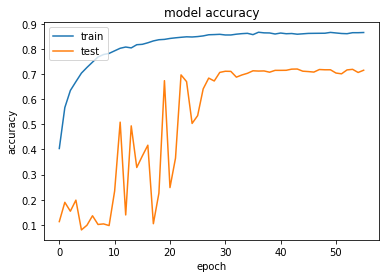

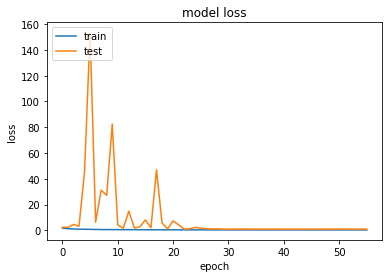

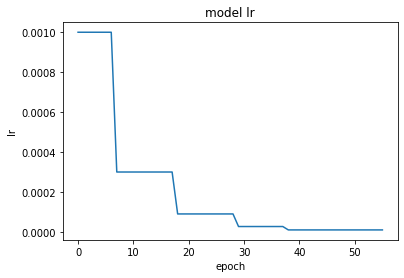

starting bb0 07:13:06
bb0 batch 0 07:13:06
bb0 batch 1 07:24:23
bb0 batch 2 07:35:32
bb0 batch 3 07:46:37
ending bb0 07:57:47
starting pgd 07:57:47
pgd batch 0 07:57:47
pgd batch 1 07:58:07
pgd batch 2 07:58:28
pgd batch 3 07:58:49
ending pgd 07:59:10
starting cw 07:59:10
cw batch 0 07:59:10
cw batch 1 08:06:07
cw batch 2 08:13:04
cw batch 3 08:20:02



6it [9:16:48, 5584.91s/it]

ending cw 08:26:59
current pruning ratio is0.984375, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 2.2675 - accuracy: 0.1850 - val_loss: 2.4960 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 162ms/step - loss: 2.0898 - accuracy: 0.2550 - val_loss: 2.3763 - val_accuracy: 0.1070 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 167ms/step - loss: 2.0117 - accuracy: 0.2861 - val_loss: 9.6807 - val_accuracy: 0.1014 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 167ms/step - loss: 1.9595 - accuracy: 0.3075 - val_loss: 78.6474 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 167ms/step - loss: 1.9207 - accuracy: 0.3217 - val_loss: 105.3922 - val_accuracy: 0.1019 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 1.8849 - accuracy: 0.3379 - val_loss: 58.5533 - val_accuracy: 0.0958 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 167ms/ste

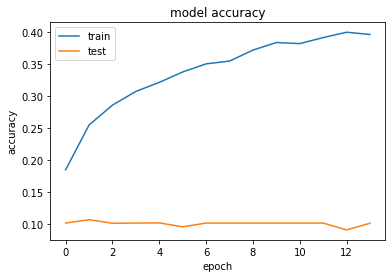

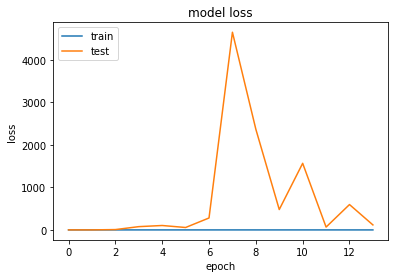

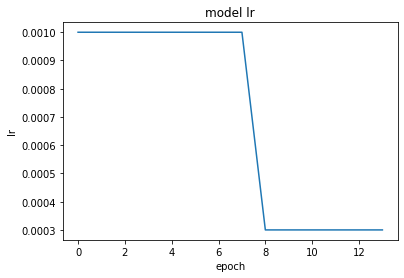

starting pgd 08:37:55
pgd batch 0 08:37:55
pgd batch 1 08:38:16
pgd batch 2 08:38:37
pgd batch 3 08:38:58
ending pgd 08:39:19
starting cw 08:39:19
cw batch 0 08:39:19
cw batch 1 08:46:16
cw batch 2 08:53:13
cw batch 3 09:00:12



7it [9:57:00, 5117.18s/it]
 50%|█████     | 1/2 [9:57:15<9:57:15, 35835.15s/it]

ending cw 09:07:11


74/74 [==============================] - 12s 168ms/step - loss: 2.4415 - accuracy: 0.2044 - val_loss: 2.3305 - val_accuracy: 0.1121



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 1.9788 - accuracy: 0.3012 - val_loss: 2.3890 - val_accuracy: 0.1254 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 164ms/step - loss: 1.7552 - accuracy: 0.3980 - val_loss: 2.3397 - val_accuracy: 0.1483 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 168ms/step - loss: 1.5921 - accuracy: 0.4595 - val_loss: 2.6052 - val_accuracy: 0.1378 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 164ms/step - loss: 1.4768 - accuracy: 0.5008 - val_loss: 2.0756 - val_accuracy: 0.3034 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 1.3468 - accuracy: 0.5443 - val_loss: 1.6198 - val_accuracy: 0.4466 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 1.2374 - accuracy: 0.5915 - val_loss: 2.0504 - val_accuracy: 0.4130 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

74/74 [==============================] - 12s 165ms/step - loss: 0.0199 - accuracy: 0.9958 - val_loss: 0.9718 - val_accuracy: 0.8008 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0191 - accuracy: 0.9964 - val_loss: 0.9710 - val_accuracy: 0.7990 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0194 - accuracy: 0.9959 - val_loss: 0.9773 - val_accuracy: 0.8010 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0189 - accuracy: 0.9965 - val_loss: 0.9756 - val_accuracy: 0.8023 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 165ms/step - loss: 0.0215 - accuracy: 0.9948 - val_loss: 0.9819 - val_accuracy: 0.8013 - lr: 1.0000e-05


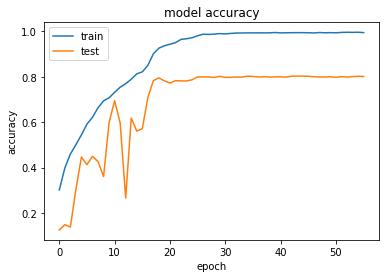

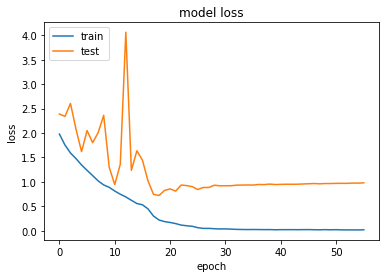

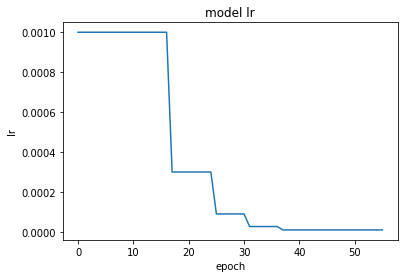

starting bb0 09:22:09
bb0 batch 0 09:22:09
bb0 batch 1 09:34:21
bb0 batch 2 09:46:39
bb0 batch 3 09:58:52
ending bb0 10:10:57
starting pgd 10:10:57
pgd batch 0 10:10:57
pgd batch 1 10:11:18
pgd batch 2 10:11:39
pgd batch 3 10:12:00
ending pgd 10:12:21
starting cw 10:12:21
cw batch 0 10:12:21
cw batch 1 10:19:19
cw batch 2 10:26:21
cw batch 3 10:33:25



1it [1:33:03, 5583.72s/it]

ending cw 10:40:29
current pruning ratio is0.5, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.3287 - accuracy: 0.8878 - val_loss: 1.5311 - val_accuracy: 0.6438 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 162ms/step - loss: 0.2444 - accuracy: 0.9153 - val_loss: 1.0218 - val_accuracy: 0.7256 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2194 - accuracy: 0.9276 - val_loss: 1.1108 - val_accuracy: 0.7350 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1984 - accuracy: 0.9349 - val_loss: 1.2637 - val_accuracy: 0.7169 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1829 - accuracy: 0.9416 - val_loss: 1.0779 - val_accuracy: 0.7269 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1705 - accuracy: 0.9471 - val_loss: 1.2483 - val_accuracy: 0.7205 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 165ms/step - 

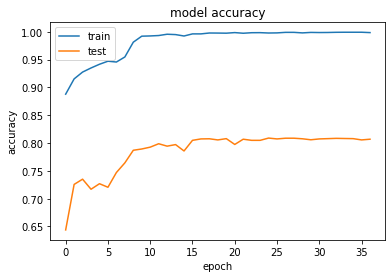

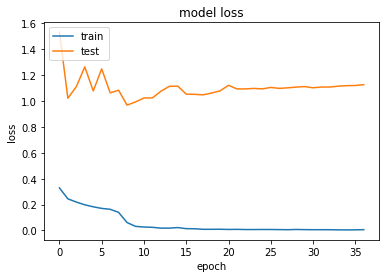

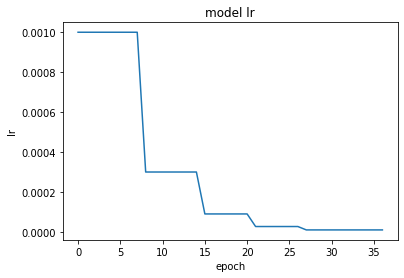

starting bb0 10:53:41
bb0 batch 0 10:53:41
bb0 batch 1 11:05:46
bb0 batch 2 11:18:01
bb0 batch 3 11:30:01
ending bb0 11:42:14
starting pgd 11:42:14
pgd batch 0 11:42:14
pgd batch 1 11:42:34
pgd batch 2 11:42:55
pgd batch 3 11:43:16
ending pgd 11:43:36
starting cw 11:43:37
cw batch 0 11:43:37
cw batch 1 11:50:36
cw batch 2 11:57:33
cw batch 3 12:04:30



2it [3:04:02, 5546.17s/it]

ending cw 12:11:27
current pruning ratio is0.75, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 0.3474 - accuracy: 0.8863 - val_loss: 1.7993 - val_accuracy: 0.5406 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 162ms/step - loss: 0.1853 - accuracy: 0.9381 - val_loss: 1.5311 - val_accuracy: 0.6392 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 162ms/step - loss: 0.1500 - accuracy: 0.9488 - val_loss: 1.1551 - val_accuracy: 0.7243 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 162ms/step - loss: 0.1216 - accuracy: 0.9604 - val_loss: 1.2444 - val_accuracy: 0.7304 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 166ms/step - loss: 0.1433 - accuracy: 0.9538 - val_loss: 1.9106 - val_accuracy: 0.6132 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 0.1229 - accuracy: 0.9577 - val_loss: 1.3134 - val_accuracy: 0.7279 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/step - 

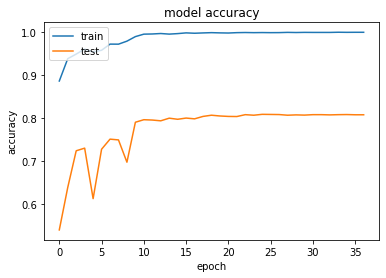

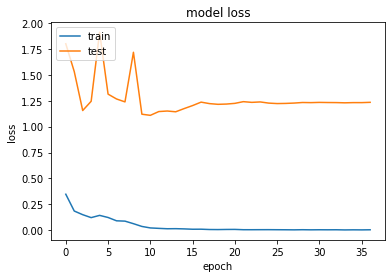

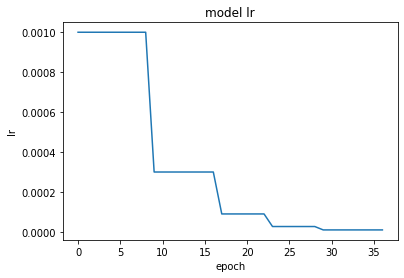

starting bb0 12:25:51
bb0 batch 0 12:25:51
bb0 batch 1 12:38:03
bb0 batch 2 12:50:13
bb0 batch 3 13:02:18
ending bb0 13:14:21
starting pgd 13:14:21
pgd batch 0 13:14:21
pgd batch 1 13:14:42
pgd batch 2 13:15:02
pgd batch 3 13:15:23
ending pgd 13:15:44
starting cw 13:15:44
cw batch 0 13:15:44
cw batch 1 13:22:42
cw batch 2 13:29:39
cw batch 3 13:45:50



3it [4:45:23, 5706.74s/it]

ending cw 13:52:49
current pruning ratio is0.875, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 0.6205 - accuracy: 0.8016 - val_loss: 1.3893 - val_accuracy: 0.5692 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 0.3057 - accuracy: 0.9001 - val_loss: 1.2298 - val_accuracy: 0.6629 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 0.2117 - accuracy: 0.9315 - val_loss: 1.1625 - val_accuracy: 0.7361 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1591 - accuracy: 0.9465 - val_loss: 1.1398 - val_accuracy: 0.7531 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 0.1349 - accuracy: 0.9551 - val_loss: 1.1658 - val_accuracy: 0.7394 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 0.1231 - accuracy: 0.9591 - val_loss: 1.1524 - val_accuracy: 0.7625 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

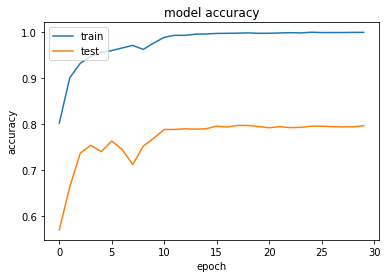

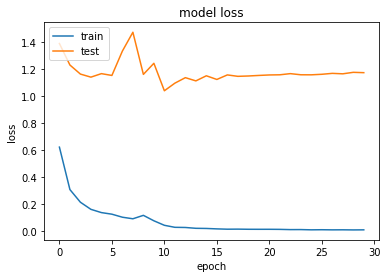

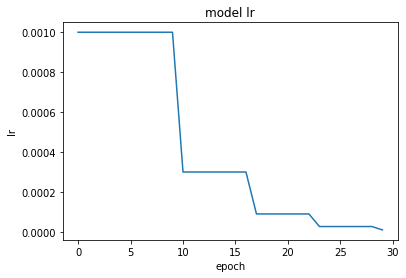

starting bb0 14:06:22
bb0 batch 0 14:06:22
bb0 batch 1 14:18:32
bb0 batch 2 14:30:42
bb0 batch 3 14:42:50
ending bb0 14:55:01
starting pgd 14:55:01
pgd batch 0 14:55:01
pgd batch 1 14:55:22
pgd batch 2 14:55:42
pgd batch 3 14:56:03
ending pgd 14:56:24
starting cw 14:56:24
cw batch 0 14:56:24
cw batch 1 15:03:23
cw batch 2 15:10:23
cw batch 3 15:17:19



4it [6:16:50, 5640.85s/it]

ending cw 15:24:16
current pruning ratio is0.9375, current iteration is 1
Epoch 1/100


74/74 [==============================] - 12s 169ms/step - loss: 1.3903 - accuracy: 0.5439 - val_loss: 4.3791 - val_accuracy: 0.1511 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 166ms/step - loss: 0.8336 - accuracy: 0.7274 - val_loss: 4.7418 - val_accuracy: 0.1409 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 161ms/step - loss: 0.6165 - accuracy: 0.7982 - val_loss: 3.9016 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 161ms/step - loss: 0.5133 - accuracy: 0.8318 - val_loss: 2.8876 - val_accuracy: 0.3068 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 161ms/step - loss: 0.4273 - accuracy: 0.8607 - val_loss: 2.1896 - val_accuracy: 0.4206 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 0.3553 - accuracy: 0.8812 - val_loss: 1.6308 - val_accuracy: 0.5676 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/step - 

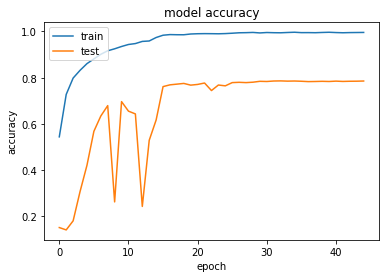

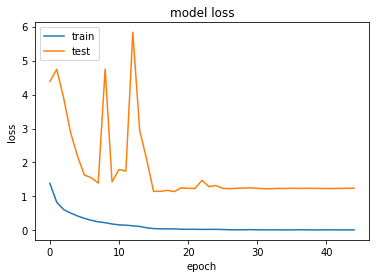

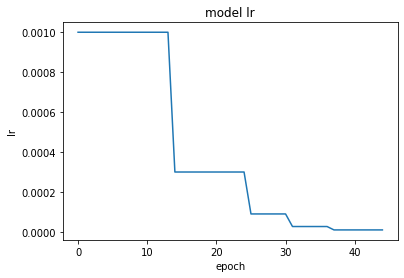

starting bb0 15:41:14
bb0 batch 0 15:41:14
bb0 batch 1 15:53:12
bb0 batch 2 16:05:20
bb0 batch 3 16:17:29
ending bb0 16:29:37
starting pgd 16:29:37
pgd batch 0 16:29:37
pgd batch 1 16:29:58
pgd batch 2 16:30:19
pgd batch 3 16:30:39
ending pgd 16:31:00
starting cw 16:31:00
cw batch 0 16:31:00
cw batch 1 16:37:57
cw batch 2 16:44:55
cw batch 3 16:51:54



5it [7:51:27, 5651.56s/it]

ending cw 16:58:52
current pruning ratio is0.96875, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 169ms/step - loss: 2.1953 - accuracy: 0.2521 - val_loss: 5.8934 - val_accuracy: 0.0634 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 166ms/step - loss: 1.7752 - accuracy: 0.3829 - val_loss: 13.1592 - val_accuracy: 0.0953 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 167ms/step - loss: 1.5777 - accuracy: 0.4610 - val_loss: 20.1714 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 167ms/step - loss: 1.4526 - accuracy: 0.5065 - val_loss: 35.1865 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 167ms/step - loss: 1.3487 - accuracy: 0.5474 - val_loss: 77.8177 - val_accuracy: 0.0978 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 1.2574 - accuracy: 0.5814 - val_loss: 17.8290 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/st

Epoch 52/100
74/74 [==============================] - 12s 163ms/step - loss: 0.8776 - accuracy: 0.7060 - val_loss: 1.0515 - val_accuracy: 0.6553 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 163ms/step - loss: 0.8747 - accuracy: 0.7083 - val_loss: 1.0585 - val_accuracy: 0.6599 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 163ms/step - loss: 0.8683 - accuracy: 0.7139 - val_loss: 1.2432 - val_accuracy: 0.5995 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 163ms/step - loss: 0.8725 - accuracy: 0.7150 - val_loss: 1.4583 - val_accuracy: 0.5434 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 163ms/step - loss: 0.8771 - accuracy: 0.7108 - val_loss: 1.1885 - val_accuracy: 0.6150 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 163ms/step - loss: 0.8695 - accuracy: 0.7115 - val_loss: 1.6267 - val_accuracy: 0.5070 - lr: 1.0000e-05
Epoch 58/100
74/74 [========

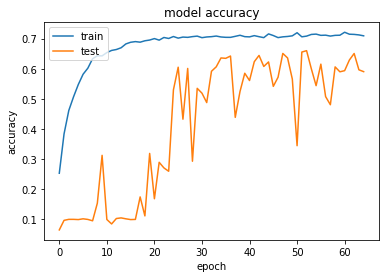

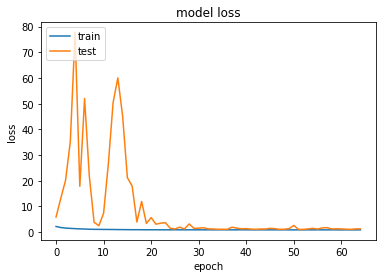

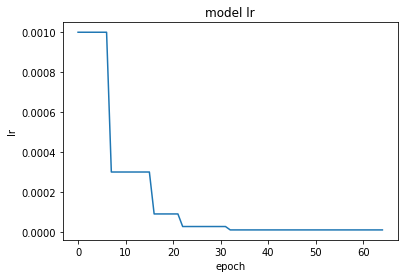

starting bb0 17:20:07
bb0 batch 0 17:20:08
bb0 batch 1 17:31:52
bb0 batch 2 17:43:34
bb0 batch 3 17:55:09
ending bb0 18:06:53
starting pgd 18:06:53
pgd batch 0 18:06:53
pgd batch 1 18:07:13
pgd batch 2 18:07:34
pgd batch 3 18:07:55
ending pgd 18:08:16
starting cw 18:08:16
cw batch 0 18:08:16
cw batch 1 18:15:16
cw batch 2 18:22:14
cw batch 3 18:29:12



6it [9:28:45, 5707.46s/it]

ending cw 18:36:10
current pruning ratio is0.984375, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 2.1555 - accuracy: 0.2127 - val_loss: 2.3424 - val_accuracy: 0.1001 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 166ms/step - loss: 1.9029 - accuracy: 0.3280 - val_loss: 3.7208 - val_accuracy: 0.1098 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 167ms/step - loss: 1.7528 - accuracy: 0.3900 - val_loss: 4.8755 - val_accuracy: 0.1177 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 167ms/step - loss: 1.6730 - accuracy: 0.4196 - val_loss: 229.9339 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 1.6206 - accuracy: 0.4425 - val_loss: 74.9880 - val_accuracy: 0.1009 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 167ms/step - loss: 1.5833 - accuracy: 0.4542 - val_loss: 324.1225 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/st

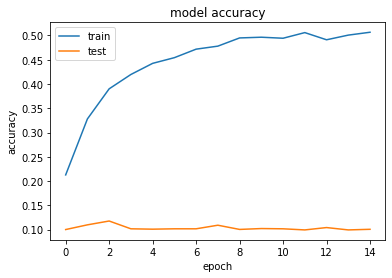

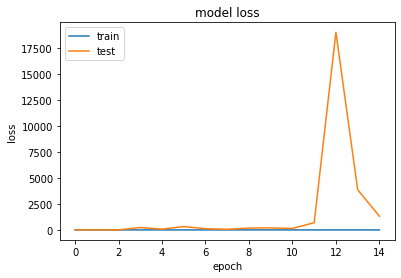

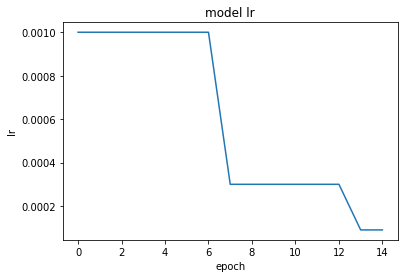

starting pgd 18:47:19
pgd batch 0 18:47:19
pgd batch 1 18:47:39
pgd batch 2 18:48:00
pgd batch 3 18:48:21
ending pgd 18:48:42
starting cw 18:48:42
cw batch 0 18:48:42
cw batch 1 18:55:42
cw batch 2 19:02:44
cw batch 3 19:09:45



7it [10:09:18, 5222.70s/it]
100%|██████████| 2/2 [20:06:48<00:00, 36204.12s/it] 

ending cw 19:16:44


In [11]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/2 [00:00<?, ?it/s]

74/74 [==============================] - 12s 168ms/step - loss: 2.4764 - accuracy: 0.2152 - val_loss: 2.3278 - val_accuracy: 0.0838



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 2.1485 - accuracy: 0.2447 - val_loss: 3.3608 - val_accuracy: 0.0876 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 1.8280 - accuracy: 0.3674 - val_loss: 3.2652 - val_accuracy: 0.1052 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 168ms/step - loss: 1.6476 - accuracy: 0.4376 - val_loss: 3.4349 - val_accuracy: 0.1302 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 1.4820 - accuracy: 0.5011 - val_loss: 2.6440 - val_accuracy: 0.2186 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 164ms/step - loss: 1.3032 - accuracy: 0.5687 - val_loss: 2.1310 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 164ms/step - loss: 1.1898 - accuracy: 0.6124 - val_loss: 1.7467 - val_accuracy: 0.4260 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

74/74 [==============================] - 12s 164ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 1.0064 - val_accuracy: 0.8115 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 1.0079 - val_accuracy: 0.8122 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0056 - accuracy: 0.9993 - val_loss: 1.0093 - val_accuracy: 0.8140 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0055 - accuracy: 0.9993 - val_loss: 1.0129 - val_accuracy: 0.8122 - lr: 1.0000e-05


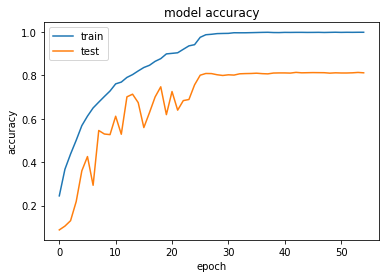

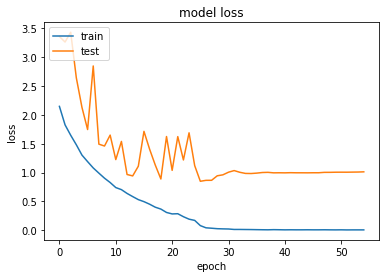

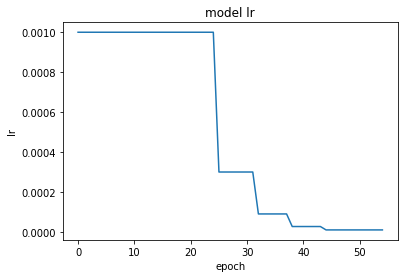

starting bb0 19:28:54
bb0 batch 0 19:28:54
bb0 batch 1 19:41:08
bb0 batch 2 19:53:24
bb0 batch 3 20:05:43
ending bb0 20:17:59
starting pgd 20:17:59
pgd batch 0 20:17:59
pgd batch 1 20:18:20
pgd batch 2 20:18:41
pgd batch 3 20:19:02
ending pgd 20:19:22
starting cw 20:19:22
cw batch 0 20:19:22
cw batch 1 20:26:22
cw batch 2 20:33:20
cw batch 3 20:40:18



1it [1:30:19, 5419.58s/it]

ending cw 20:47:18
current pruning ratio is0.5, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 2.1932 - accuracy: 0.2393 - val_loss: 2.4443 - val_accuracy: 0.1116 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 167ms/step - loss: 1.7420 - accuracy: 0.3882 - val_loss: 2.4549 - val_accuracy: 0.1187 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 162ms/step - loss: 1.5003 - accuracy: 0.4899 - val_loss: 2.0886 - val_accuracy: 0.2627 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 1.3302 - accuracy: 0.5480 - val_loss: 1.6987 - val_accuracy: 0.3952 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 1.2145 - accuracy: 0.5991 - val_loss: 1.5243 - val_accuracy: 0.5022 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 1.1142 - accuracy: 0.6283 - val_loss: 1.9343 - val_accuracy: 0.4405 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

74/74 [==============================] - 12s 164ms/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.9787 - val_accuracy: 0.8191 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0108 - accuracy: 0.9976 - val_loss: 0.9840 - val_accuracy: 0.8206 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0093 - accuracy: 0.9980 - val_loss: 0.9837 - val_accuracy: 0.8183 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.9838 - val_accuracy: 0.8194 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0090 - accuracy: 0.9978 - val_loss: 0.9862 - val_accuracy: 0.8199 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0084 - accuracy: 0.9985 - val_loss: 0.9872 - val_accuracy: 0.8196 - lr: 1.0000e-05


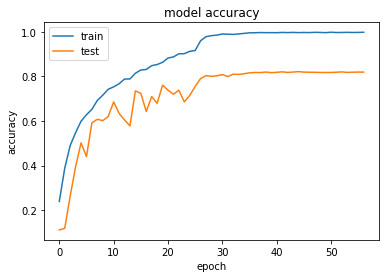

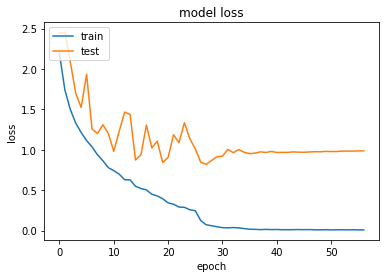

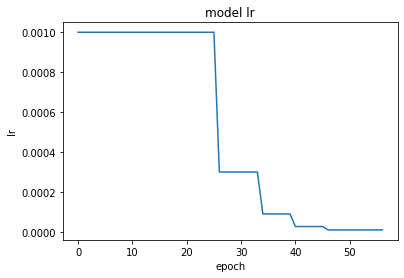

starting bb0 21:01:17
bb0 batch 0 21:01:17
bb0 batch 1 21:13:20
bb0 batch 2 21:25:17
bb0 batch 3 21:37:17
ending bb0 21:49:01
starting pgd 21:49:01
pgd batch 0 21:49:01
pgd batch 1 21:49:22
pgd batch 2 21:49:42
pgd batch 3 21:50:03
ending pgd 21:50:24
starting cw 21:50:24
cw batch 0 21:50:24
cw batch 1 21:57:22
cw batch 2 22:04:20
cw batch 3 22:11:18



2it [3:01:19, 5431.55s/it]

ending cw 22:18:17
current pruning ratio is0.75, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 2.2691 - accuracy: 0.1337 - val_loss: 2.3526 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 166ms/step - loss: 2.1794 - accuracy: 0.1640 - val_loss: 2.4884 - val_accuracy: 0.0912 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 167ms/step - loss: 2.1079 - accuracy: 0.1787 - val_loss: 2.4947 - val_accuracy: 0.1134 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 162ms/step - loss: 2.0590 - accuracy: 0.2010 - val_loss: 2.2508 - val_accuracy: 0.1676 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 167ms/step - loss: 1.9980 - accuracy: 0.2302 - val_loss: 2.7304 - val_accuracy: 0.1294 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 2.0135 - accuracy: 0.2316 - val_loss: 2.0639 - val_accuracy: 0.2431 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/step - 

Epoch 53/100
74/74 [==============================] - 12s 163ms/step - loss: 0.8228 - accuracy: 0.7639 - val_loss: 1.2942 - val_accuracy: 0.6456 - lr: 9.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 163ms/step - loss: 0.8154 - accuracy: 0.7686 - val_loss: 1.4361 - val_accuracy: 0.6311 - lr: 9.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 163ms/step - loss: 0.8246 - accuracy: 0.7675 - val_loss: 1.2480 - val_accuracy: 0.6545 - lr: 9.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 163ms/step - loss: 0.7999 - accuracy: 0.7724 - val_loss: 1.2646 - val_accuracy: 0.6431 - lr: 9.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 163ms/step - loss: 0.7993 - accuracy: 0.7719 - val_loss: 1.2818 - val_accuracy: 0.6543 - lr: 9.0000e-05
Epoch 58/100
74/74 [==============================] - 12s 163ms/step - loss: 0.7938 - accuracy: 0.7797 - val_loss: 1.2821 - val_accuracy: 0.6517 - lr: 9.0000e-05
Epoch 59/100
74/74 [========

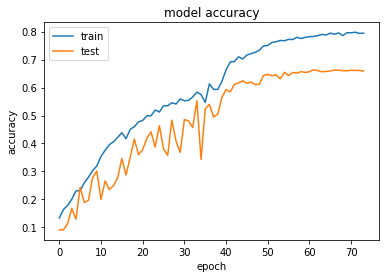

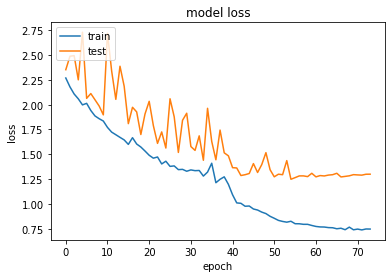

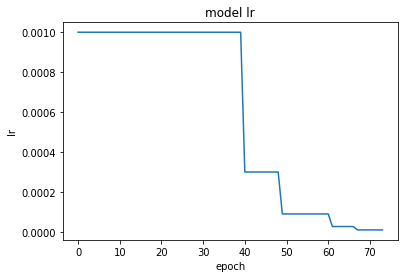

starting bb0 22:35:57
bb0 batch 0 22:35:57
bb0 batch 1 22:47:16
bb0 batch 2 22:58:34
bb0 batch 3 23:09:55
ending bb0 23:21:21
starting pgd 23:21:21
pgd batch 0 23:21:21
pgd batch 1 23:21:42
pgd batch 2 23:22:03
pgd batch 3 23:22:23
ending pgd 23:22:44
starting cw 23:22:44
cw batch 0 23:22:44
cw batch 1 23:29:43
cw batch 2 23:36:44
cw batch 3 23:43:43



3it [4:33:44, 5465.69s/it]

ending cw 23:50:42
current pruning ratio is0.875, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 169ms/step - loss: 3.3386 - accuracy: 0.1049 - val_loss: 2.5445 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 161ms/step - loss: 2.3702 - accuracy: 0.1049 - val_loss: 2.3091 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 161ms/step - loss: 2.3041 - accuracy: 0.1009 - val_loss: 2.3036 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3040 - accuracy: 0.0965 - val_loss: 2.3038 - val_accuracy: 0.1042 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3037 - accuracy: 0.0937 - val_loss: 2.3038 - val_accuracy: 0.1042 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3038 - accuracy: 0.1004 - val_loss: 2.3081 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/step - 

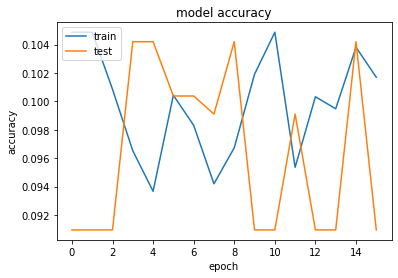

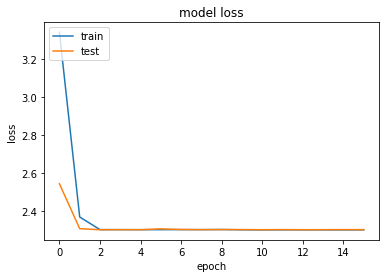

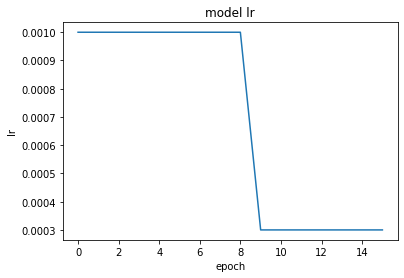

starting pgd 23:56:30
pgd batch 0 23:56:30
pgd batch 1 23:56:51
pgd batch 2 23:57:12
pgd batch 3 23:57:32
ending pgd 23:57:53
starting cw 23:57:53
cw batch 0 23:57:53
cw batch 1 00:04:53
cw batch 2 00:11:52
cw batch 3 00:18:52



4it [5:08:52, 4458.54s/it]

ending cw 00:25:51
current pruning ratio is0.9375, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 2.3361 - accuracy: 0.1017 - val_loss: 2.3037 - val_accuracy: 0.1042 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 166ms/step - loss: 2.3037 - accuracy: 0.1053 - val_loss: 2.3070 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3035 - accuracy: 0.1062 - val_loss: 2.3042 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3041 - accuracy: 0.1006 - val_loss: 2.3041 - val_accuracy: 0.0991 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3039 - accuracy: 0.0969 - val_loss: 2.3042 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3036 - accuracy: 0.1002 - val_loss: 2.3053 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 167ms/step - 

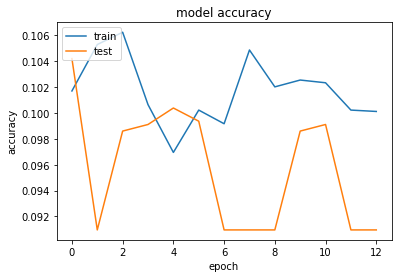

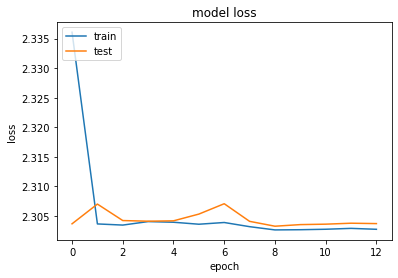

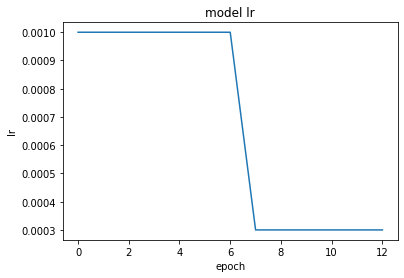

starting pgd 00:31:09
pgd batch 0 00:31:09
pgd batch 1 00:31:30
pgd batch 2 00:31:51
pgd batch 3 00:32:12
ending pgd 00:32:33
starting cw 00:32:33
cw batch 0 00:32:33
cw batch 1 00:39:30
cw batch 2 00:46:29
cw batch 3 00:53:26



5it [5:43:25, 3742.65s/it]

ending cw 01:00:23
current pruning ratio is0.96875, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 169ms/step - loss: 2.5242 - accuracy: 0.1017 - val_loss: 2.3790 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 161ms/step - loss: 2.3231 - accuracy: 0.1017 - val_loss: 2.3057 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 161ms/step - loss: 2.3032 - accuracy: 0.1017 - val_loss: 2.3039 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3026 - accuracy: 0.1028 - val_loss: 2.3036 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3025 - accuracy: 0.1049 - val_loss: 2.3035 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3024 - accuracy: 0.1049 - val_loss: 2.3035 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/step - 

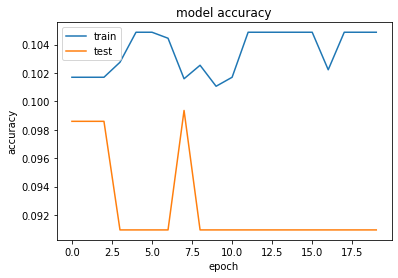

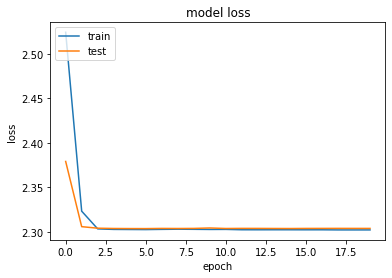

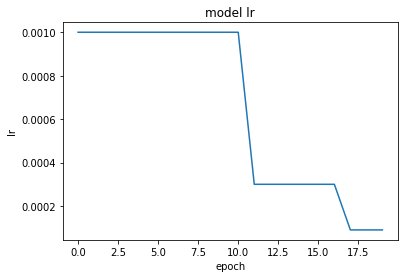

starting pgd 01:07:06
pgd batch 0 01:07:06
pgd batch 1 01:07:27
pgd batch 2 01:07:48
pgd batch 3 01:08:08
ending pgd 01:08:29
starting cw 01:08:29
cw batch 0 01:08:29
cw batch 1 01:15:27
cw batch 2 01:22:25
cw batch 3 01:29:22



6it [6:19:21, 3266.88s/it]

ending cw 01:36:20
current pruning ratio is0.984375, current iteration is 0
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 2.3220 - accuracy: 0.1010 - val_loss: 2.3078 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 161ms/step - loss: 2.3047 - accuracy: 0.1010 - val_loss: 2.3045 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3029 - accuracy: 0.1010 - val_loss: 2.3039 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 2.3035 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3026 - accuracy: 0.1013 - val_loss: 2.3037 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3025 - accuracy: 0.0990 - val_loss: 2.3038 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/step - 

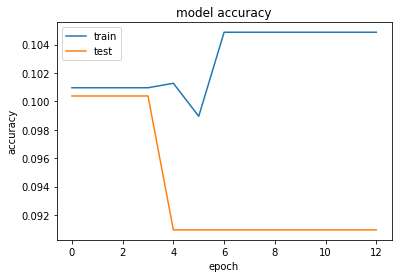

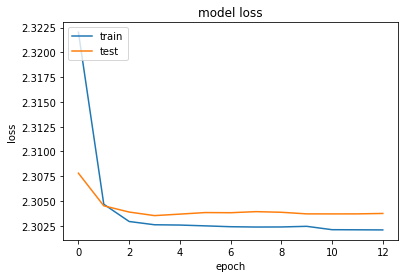

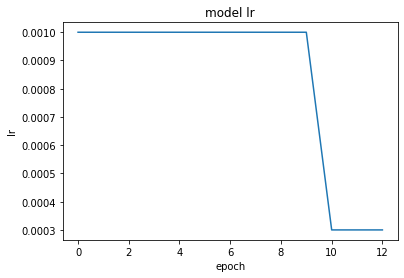

starting pgd 01:41:38
pgd batch 0 01:41:38
pgd batch 1 01:41:59
pgd batch 2 01:42:19
pgd batch 3 01:42:40
ending pgd 01:43:01
starting cw 01:43:01
cw batch 0 01:43:01
cw batch 1 01:49:58
cw batch 2 01:56:57
cw batch 3 02:03:56



7it [6:53:55, 3547.86s/it]
 50%|█████     | 1/2 [6:54:09<6:54:09, 24849.30s/it]

ending cw 02:10:53


74/74 [==============================] - 12s 168ms/step - loss: 2.5073 - accuracy: 0.2170 - val_loss: 2.3436 - val_accuracy: 0.1006



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 171ms/step - loss: 2.1338 - accuracy: 0.2491 - val_loss: 4.5032 - val_accuracy: 0.0950 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 163ms/step - loss: 1.8661 - accuracy: 0.3436 - val_loss: 2.4361 - val_accuracy: 0.1506 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 1.7115 - accuracy: 0.4093 - val_loss: 2.8703 - val_accuracy: 0.1180 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 1.5491 - accuracy: 0.4723 - val_loss: 2.2836 - val_accuracy: 0.2507 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 1.3866 - accuracy: 0.5343 - val_loss: 4.1133 - val_accuracy: 0.1628 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 1.2578 - accuracy: 0.5873 - val_loss: 1.9990 - val_accuracy: 0.3554 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 164ms/step - 

74/74 [==============================] - 12s 164ms/step - loss: 0.0083 - accuracy: 0.9986 - val_loss: 0.9408 - val_accuracy: 0.8178 - lr: 1.0000e-05
Epoch 53/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.9389 - val_accuracy: 0.8155 - lr: 1.0000e-05
Epoch 54/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0070 - accuracy: 0.9992 - val_loss: 0.9416 - val_accuracy: 0.8163 - lr: 1.0000e-05
Epoch 55/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0066 - accuracy: 0.9992 - val_loss: 0.9431 - val_accuracy: 0.8166 - lr: 1.0000e-05
Epoch 56/100
74/74 [==============================] - 12s 164ms/step - loss: 0.0061 - accuracy: 0.9995 - val_loss: 0.9401 - val_accuracy: 0.8171 - lr: 1.0000e-05
Epoch 57/100
74/74 [==============================] - 12s 163ms/step - loss: 0.0065 - accuracy: 0.9986 - val_loss: 0.9381 - val_accuracy: 0.8168 - lr: 1.0000e-05


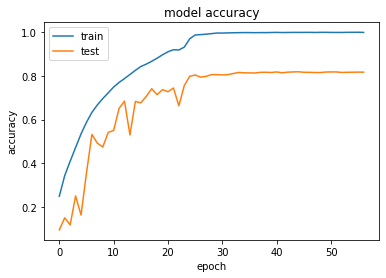

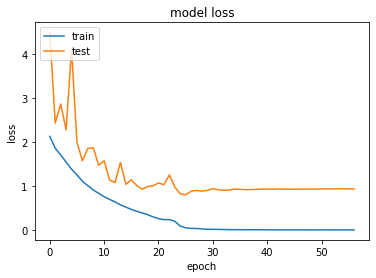

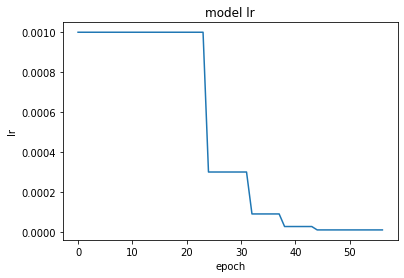

starting bb0 02:23:27
bb0 batch 0 02:23:27
bb0 batch 1 02:35:09
bb0 batch 2 02:46:56
bb0 batch 3 02:58:46
ending bb0 03:10:37
starting pgd 03:10:37
pgd batch 0 03:10:37
pgd batch 1 03:10:57
pgd batch 2 03:11:18
pgd batch 3 03:11:39
ending pgd 03:12:00
starting cw 03:12:00
cw batch 0 03:12:00
cw batch 1 03:18:58
cw batch 2 03:25:56
cw batch 3 03:32:53



1it [1:31:48, 5508.73s/it]

ending cw 03:42:56
current pruning ratio is0.5, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 2.2108 - accuracy: 0.2493 - val_loss: 2.4802 - val_accuracy: 0.1185 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 162ms/step - loss: 1.7747 - accuracy: 0.3919 - val_loss: 2.4388 - val_accuracy: 0.1557 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 1.5261 - accuracy: 0.4917 - val_loss: 2.1571 - val_accuracy: 0.2642 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 1.3224 - accuracy: 0.5646 - val_loss: 1.7145 - val_accuracy: 0.4206 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 1.1451 - accuracy: 0.6214 - val_loss: 1.3846 - val_accuracy: 0.5439 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 1.0332 - accuracy: 0.6571 - val_loss: 1.4994 - val_accuracy: 0.5175 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

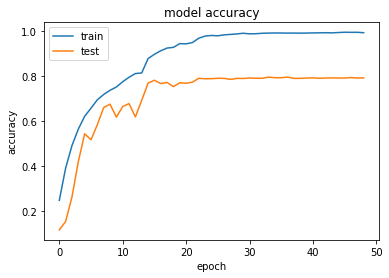

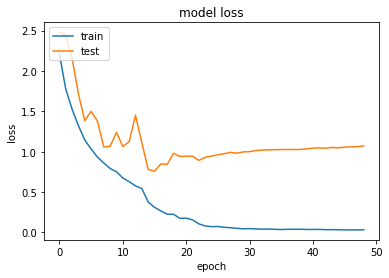

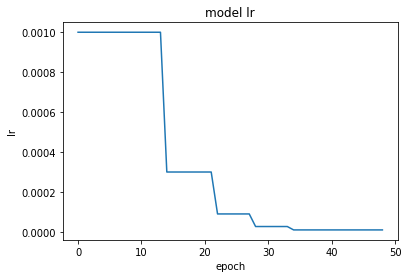

starting bb0 03:55:18
bb0 batch 0 03:55:18
bb0 batch 1 04:07:10
bb0 batch 2 04:19:03
bb0 batch 3 04:30:59
ending bb0 04:42:57
starting pgd 04:42:57
pgd batch 0 04:42:57
pgd batch 1 04:43:17
pgd batch 2 04:43:38
pgd batch 3 04:43:59
ending pgd 04:44:20
starting cw 04:44:20
cw batch 0 04:44:20
cw batch 1 04:51:18
cw batch 2 04:58:16
cw batch 3 05:05:15



2it [3:01:07, 5463.69s/it]

ending cw 05:12:15
current pruning ratio is0.75, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 2.1510 - accuracy: 0.2089 - val_loss: 2.2893 - val_accuracy: 0.1427 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 167ms/step - loss: 1.8414 - accuracy: 0.3503 - val_loss: 2.3803 - val_accuracy: 0.1671 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 1.6208 - accuracy: 0.4429 - val_loss: 2.0961 - val_accuracy: 0.2387 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 163ms/step - loss: 1.4342 - accuracy: 0.5108 - val_loss: 1.8543 - val_accuracy: 0.3567 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 163ms/step - loss: 1.2899 - accuracy: 0.5668 - val_loss: 1.6313 - val_accuracy: 0.4428 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 163ms/step - loss: 1.1610 - accuracy: 0.6143 - val_loss: 1.5692 - val_accuracy: 0.5182 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 163ms/step - 

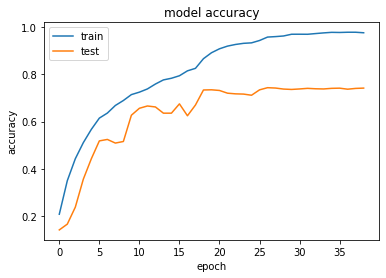

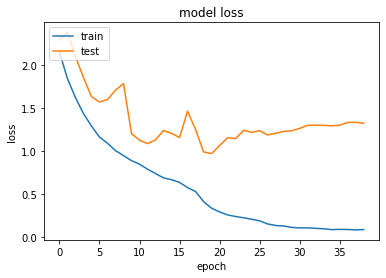

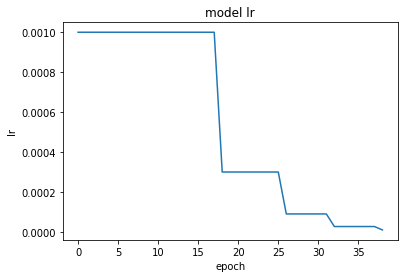

starting bb0 05:22:46
bb0 batch 0 05:22:46
bb0 batch 1 05:34:21
bb0 batch 2 05:46:01
bb0 batch 3 05:57:37
ending bb0 06:09:18
starting pgd 06:09:18
pgd batch 0 06:09:18
pgd batch 1 06:09:39
pgd batch 2 06:09:59
pgd batch 3 06:10:20
ending pgd 06:10:41
starting cw 06:10:41
cw batch 0 06:10:41
cw batch 1 06:17:39
cw batch 2 06:24:37
cw batch 3 06:31:35



3it [4:27:27, 5378.50s/it]

ending cw 06:38:34
current pruning ratio is0.875, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 170ms/step - loss: 2.6118 - accuracy: 0.0994 - val_loss: 2.3196 - val_accuracy: 0.1042 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 161ms/step - loss: 2.3054 - accuracy: 0.0986 - val_loss: 2.3038 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3033 - accuracy: 0.0973 - val_loss: 2.3053 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3034 - accuracy: 0.0995 - val_loss: 2.3038 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3034 - accuracy: 0.1023 - val_loss: 2.3048 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3036 - accuracy: 0.1015 - val_loss: 2.3042 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/step - 

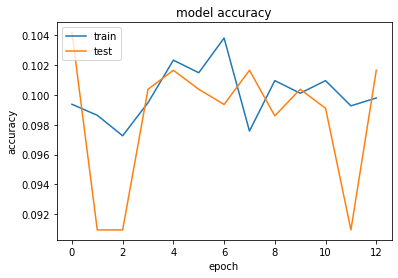

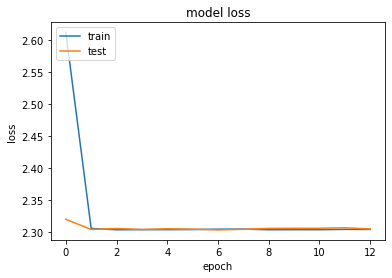

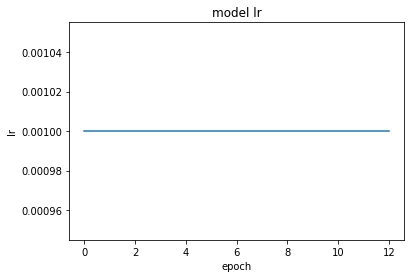

starting pgd 06:43:50
pgd batch 0 06:43:50
pgd batch 1 06:44:11
pgd batch 2 06:44:32
pgd batch 3 06:44:52
ending pgd 06:45:13
starting cw 06:45:13
cw batch 0 06:45:13
cw batch 1 06:52:10
cw batch 2 06:59:07
cw batch 3 07:06:05



4it [5:01:54, 4385.04s/it]

ending cw 07:13:01
current pruning ratio is0.9375, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 169ms/step - loss: 2.3052 - accuracy: 0.1010 - val_loss: 2.3043 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 161ms/step - loss: 2.3030 - accuracy: 0.0993 - val_loss: 2.3041 - val_accuracy: 0.0991 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3033 - accuracy: 0.0968 - val_loss: 2.3039 - val_accuracy: 0.1006 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3034 - accuracy: 0.0986 - val_loss: 2.3035 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3035 - accuracy: 0.0947 - val_loss: 2.3042 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3029 - accuracy: 0.1023 - val_loss: 2.3036 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 166ms/step - 

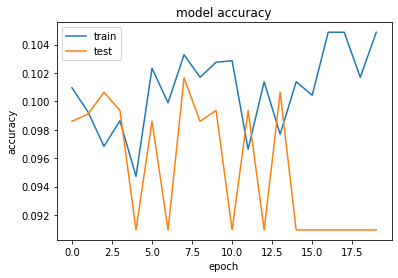

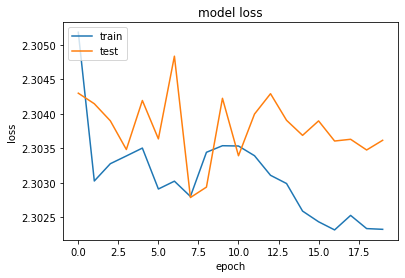

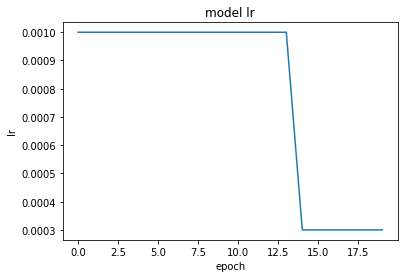

starting pgd 07:19:44
pgd batch 0 07:19:44
pgd batch 1 07:20:05
pgd batch 2 07:20:25
pgd batch 3 07:20:46
ending pgd 07:21:07
starting cw 07:21:07
cw batch 0 07:21:07
cw batch 1 07:28:07
cw batch 2 07:35:07
cw batch 3 07:42:05



5it [5:37:56, 3718.41s/it]

ending cw 07:49:04
current pruning ratio is0.96875, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 169ms/step - loss: 2.3034 - accuracy: 0.1049 - val_loss: 2.3039 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 165ms/step - loss: 2.3028 - accuracy: 0.1007 - val_loss: 2.3042 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 161ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3038 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 161ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3034 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 161ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3041 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 161ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3035 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 161ms/step - 

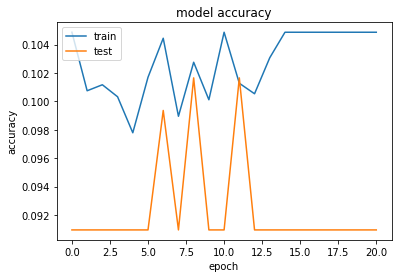

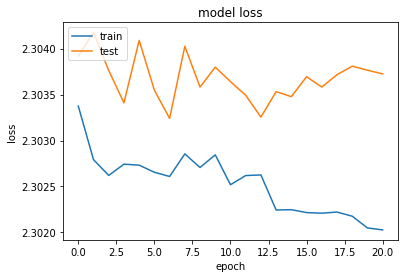

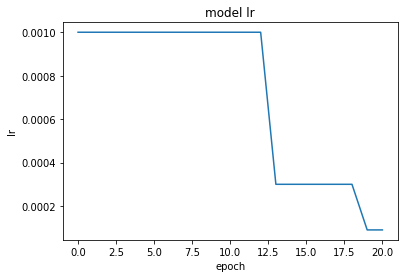

starting pgd 07:55:56
pgd batch 0 07:55:56
pgd batch 1 07:56:17
pgd batch 2 07:56:38
pgd batch 3 07:56:58
ending pgd 07:57:19
starting cw 07:57:19
cw batch 0 07:57:19
cw batch 1 08:04:20
cw batch 2 08:11:18
cw batch 3 08:18:17



6it [6:14:07, 3254.06s/it]

ending cw 08:25:15
current pruning ratio is0.984375, current iteration is 1
Epoch 1/100


74/74 [==============================] - 13s 169ms/step - loss: 2.3042 - accuracy: 0.0994 - val_loss: 2.3033 - val_accuracy: 0.1042 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 12s 166ms/step - loss: 2.3025 - accuracy: 0.1017 - val_loss: 2.3039 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3025 - accuracy: 0.1038 - val_loss: 2.3036 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3035 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3025 - accuracy: 0.0965 - val_loss: 2.3036 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 12s 162ms/step - loss: 2.3024 - accuracy: 0.1049 - val_loss: 2.3036 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 7/100
74/74 [==============================] - 12s 162ms/step - 

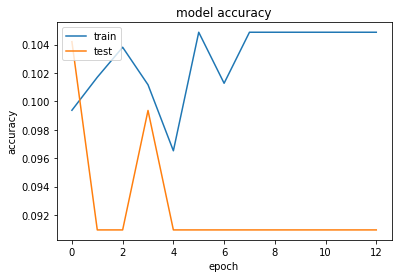

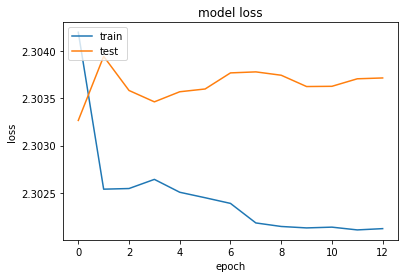

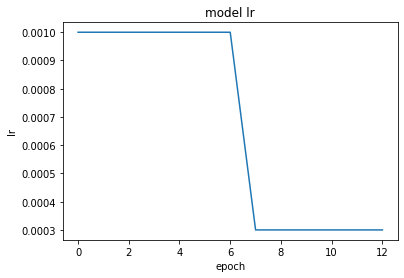

starting pgd 08:30:31
pgd batch 0 08:30:31
pgd batch 1 08:30:51
pgd batch 2 08:31:12
pgd batch 3 08:31:33
ending pgd 08:31:54
starting cw 08:31:54
cw batch 0 08:31:54
cw batch 1 08:38:56
cw batch 2 08:45:56
cw batch 3 08:52:55



7it [6:48:44, 3503.52s/it]
100%|██████████| 2/2 [13:43:08<00:00, 24694.09s/it] 

ending cw 08:59:52


In [12]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

In [3]:
def run_experiment(structure='unstructured', method='random', scope='global', iterations=10):
    experiment_name = f'{EXPERIMENT_TYPE}-{ARCHITECTURE}-{method}-{scope}-{structure}'
    cols = ['iteration','experiment_name','structure','method','scope','pruning_ratio','accuracy','loss','pgd_linf','cw_l2','bb_l0', 'total_params', 'params_left']
    results = pd.DataFrame(columns=cols, dtype='object')
    pgd_success_rates = []
    cw_success_rates = []
    bb0_success_rates = []
    all_accuracies = []

    
    compression_rates = [tf.math.pow(2, x).numpy() for x in range(7)]
    pruning_ratios = [1-1/x for x in compression_rates]

    
    for j in tqdm(range(iterations)):
        accuracies = []
        pgd_success_rate = []
        cw_success_rate = []
        bb0_success_rate = []
        try: 
            del model
        except:
            ;
        tf.compat.v1.reset_default_graph()
        tf.keras.backend.clear_session()
        
        model = initialize_base_model(j ,experiment_name=experiment_name, lr=1e-3, )

        for index, pruning_ratio in tqdm(enumerate(pruning_ratios)):

            #model.load_weights(f'./saved-weights/{experiment_name}-{j}')
            #print(f'./saved-weights/{experiment_name}-{j}')

            #for i in range(index + 1):
                print(f'current pruning ratio is{pruning_ratio}, current iteration is {j}')
                #if i != index:

                if  method=='random' and scope=='global' and structure=='unstructured':
                    model.prune_random_global_unstruct(pruning_ratio)
                elif  method=='random' and scope=='global' and structure=='structured':
                    model.prune_random_global_struct(pruning_ratio)
                elif  method=='random' and scope=='local' and structure=='unstructured':
                    model.prune_random_local_unstruct(pruning_ratio)
                elif  method=='random' and scope=='local' and structure=='structured':
                    model.prune_random_local_struct(pruning_ratio)
                elif  method=='magnitude' and scope=='global' and structure=='unstructured':
                    model.prune_magnitude_global_unstruct(pruning_ratio)
                elif  method=='magnitude' and scope=='global' and structure=='structured':
                    model.prune_magnitude_global_struct(pruning_ratio)
                elif  method=='magnitude' and scope=='local' and structure=='unstructured':
                    model.prune_magnitude_local_unstruct(pruning_ratio)
                elif  method=='magnitude' and scope=='local' and structure=='structured':
                    model.prune_magnitude_local_struct(pruning_ratio)
                else:
                    raise ValueError("pruning method invalid")

                zeros_ratio, non_zeros, param_count = get_zeros_ratio(model)
                compile_model(model)
                if index==0:
                    hist = train_model(model, to_convergence=True, fine_tuning=False)
                if index!=0:
                    hist = train_model(model, to_convergence=True, fine_tuning=True)
                zeros_ratio, non_zeros, param_count = get_zeros_ratio(model)
                res = model.evaluate(ds_test, verbose=0)
                #accuracies.append()
                plot_hist(hist)
                #pgd_success_rate.append()
                
                if res[1] > .40:
                    bb0_success = bb0_attack(model)
                else: 
                    bb0_success = 'not successful'
                vals = {
                    'iteration':j,
                    'experiment_name':experiment_name,
                    'structure':structure,
                    'method':method,
                    'scope':scope,
                    'pruning_ratio':pruning_ratio,
                    'accuracy':res[1],
                    'loss':res[0],
                    'pgd_linf':pgd_attack(model),
                    'cw_l2':cw2_attack(model),
                    'bb_l0':bb0_success,
                    'total_params':param_count,
                    'params_left':non_zeros
                }
                results = results.append(pd.DataFrame([vals], index=[0], dtype='object'))
                results.to_pickle(f'./final-results/{experiment_name}.pkl')
                results.to_csv(f'./final-results/{experiment_name}.csv', index=False)
        #all_accuracies.append(accuracies)
        #pgd_success_rates.append(pgd_success_rate)
        #cw_success_rates.append(cw_success_rate)
        #bb0_success_rates.append(bb0_success_rate)
    
    
    results.to_pickle(f'./final-results/{experiment_name}.pkl')
    results.to_csv(f'./final-results/{experiment_name}.csv', index=False)
    

In [4]:


def compile_model(model, lr=1e-3):
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(lr),
        metrics=['accuracy'],
        experimental_run_tf_function=True
    )
    return True
    

def initialize_base_model(index, experiment_name, lr=1e-3, save_weights=False):
    
    model = CustomResNetModel()

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(lr),
        metrics=['accuracy'],
        experimental_run_tf_function=True
    )
    
    model.fit(
        x=ds_train,
        #steps_per_epoch=1,
        epochs=1,
        validation_data=ds_test,
        #verbose=0
    )
    
    
    #if save_weights == True:
        #model.save_weights(f'./saved-weights/{experiment_name}-{index}')
    return model



def train_model(model, to_convergence=True, epochs=5, fine_tuning=False):
    
    
    def scheduler(epoch):
        #if epoch > 10 and epoch % 10 == 0:
            #model.load_weights('/tmp/checkpoint')
        if epoch < 30:
            return 1e-3
        if epoch < 40:
            return 3e-4
        if epoch < 45:
            return 1e-4
        if epoch < 50:
            return 3e-5
        return 1e-6
        
    
        
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        patience=6,
        monitor='val_loss',
        factor=.3,
        min_lr=1e-5
    )


    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', 
        patience=12
    )
    checkpoint_filepath = '/tmp/checkpoint'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        mode='max',
        save_best_only=True)

    if to_convergence == True:
        epochs = 100
    
    
    
    hist = model.fit(
        x=ds_train,
            #steps_per_epoch=1,
        epochs=epochs,
        validation_data=ds_test,
        callbacks=[reduce_lr, early_stopping, model_checkpoint_callback],
    )
    #model.load_weights(checkpoint_filepath)
    return hist

def print_time(text=''):
    now = datetime.now()
    dt_string = now.strftime("%H:%M:%S")
    print(text, dt_string)

def pgd_attack(model_to_attack):
    print_time(text='starting pgd')
    BATCHSIZE = 64
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.LinfProjectedGradientDescentAttack()
    res = [[],[],[],[],[],[]]
    strengths = [0.125,0.25,0.5,1,2,4]
    for i in range(4):
        print_time(text=f'pgd batch {i}')
        adversarials, _, success = attack(
            fmodel,
            attack_images[i*BATCHSIZE:(i+1)*BATCHSIZE],
            attack_labels[i*BATCHSIZE:(i+1)*BATCHSIZE],
            epsilons=[x/255 for x in strengths]
        )
        for j in range(len(strengths)):
            res[j] = res[j]+list(success[j])
    print_time(text='ending pgd')
    return [np.count_nonzero(eps_res)/len(attack_labels) for eps_res in res]



def cw2_attack(model_to_attack, eps=[10]):
    print_time(text=f'starting cw')
    BATCHSIZE = 64
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.L2CarliniWagnerAttack(
        binary_search_steps = 9,
        steps= 5000,
        stepsize = 1,
        confidence = 0,
        initial_const = 100,
        abort_early = True,
    )
    success = []
    dists = [] 
    for i in range(4):
        print_time(text=f'cw batch {i}')
        attack_batch = attack_images[i*BATCHSIZE:(i+1)*BATCHSIZE]
        attack_batch_labels = attack_labels[i*BATCHSIZE:(i+1)*BATCHSIZE]
        adversarials, _, batch_success = attack(
            fmodel,
            attack_batch,
            attack_batch_labels,
            epsilons=eps
        )
        success = success + list(batch_success)
        dists = dists + [tf.norm(attack_batch[j]-adversarials[0][j]).numpy() for j in range(len(attack_batch))]
    print_time(text=f'ending cw')
    return dists, success

def bb0_attack(model_to_attack):
    print_time(text=f'starting bb0')
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    init_attack = fb.attacks.DatasetAttack()
    BATCHSIZE = 64
    batches = [
        (attack_images[:BATCHSIZE], attack_labels[:BATCHSIZE]), 
        (attack_images[BATCHSIZE:2*BATCHSIZE], attack_labels[BATCHSIZE:2*BATCHSIZE]),
        (attack_images[2*BATCHSIZE:3*BATCHSIZE], attack_labels[2*BATCHSIZE:3*BATCHSIZE]), 
        (attack_images[3*BATCHSIZE:4*BATCHSIZE], attack_labels[3*BATCHSIZE:4*BATCHSIZE])
    ]

    # create attack that picks adversarials from given dataset of samples
    #init_attack = fb.attacks.DatasetAttack()
    init_attack = fb.attacks.DatasetAttack()

    init_attack.feed(fmodel, batches[0][0])   # feed 1st batch of inputs
    init_attack.feed(fmodel, batches[1][0])   # feed 2nd batch of inputs
    init_attack.feed(fmodel, batches[2][0])   # feed 1st batch of inputs
    init_attack.feed(fmodel, batches[3][0])   # feed 2nd batch of inputs
    attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=30, steps=500,lr_num_decay=30, lr=1e7, init_attack=init_attack)

    success = []
    dists = [] 
    for i in range(4):
        print_time(text=f'bb0 batch {i}')
        attack_batch = attack_images[i*BATCHSIZE:(i+1)*BATCHSIZE]
        attack_batch_labels = attack_labels[i*BATCHSIZE:(i+1)*BATCHSIZE]
        adversarials, _, batch_success = attack(
            fmodel,
            attack_batch,
            criterion=fb.criteria.Misclassification(attack_batch_labels),
            epsilons=[None]
        )
        
        success = success + list(batch_success)
        dists = dists + [np.count_nonzero(attack_batch[j]-adversarials[0][j]) for j in range(len(attack_batch))]
    print_time(text=f'ending bb0')
    return dists, success



def convert_from_hwio_to_iohw(weights_nchw):
    return tf.transpose(weights_nchw, [2, 3, 0, 1])



def convert_from_iohw_to_hwio(weights_nhwc):
    return tf.transpose(weights_nhwc, [2, 3, 0, 1])

def get_zeros_ratio(model):
    layers_to_examine = model.dense_masks+model.conv_masks
    weights = model.get_weights()
    all_weights = np.array([])
    for x in layers_to_examine:

        all_weights = np.append(all_weights, weights[x].flatten())
    return np.count_nonzero(all_weights)/len(all_weights), np.count_nonzero(all_weights), len(all_weights)

In [5]:
def convert(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
    return image, label

def augment(image,label):
    
    image,label = convert(image, label)
    
    image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
    image = tf.image.resize_with_crop_or_pad(image, 224+60, 224+60) # Add 6 pixels of padding
    
    image = tf.image.random_crop(image, size=[224,224,3]) # Random crop back to 28x28
    image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness

    return image,label


ds, info = tfds.load(name="imagenette", with_info=True, split=["train[:100%]","validation[:100%]"])
ds_train=ds[0]
ds_test=ds[1]
assert isinstance(ds_train, tf.data.Dataset)

def normalize(x):
    y = {'image': tf.image.convert_image_dtype(x['image'], tf.float32), 'label': x['label']}
    y = (tf.image.resize(y['image'], (224,224)), y['label'])
    return y


num_train_examples= info.splits['train'].num_examples
BATCH_SIZE = 128

ds_train = (
    ds_train
    .map(normalize)
    .take(num_train_examples)
    .cache()
    .shuffle(num_train_examples)
    # The augmentation is added here.
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
) 

ds_test = ds_test.map(
    normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

@tf.function
def load_image_test(datapoint):
    input_image, label = normalize(datapoint)
    #input_image = datapoint['image']
    #label = datapoint['label']
    
    return input_image, label

attack_set = list(ds[1].map(load_image_test))[:256]

attack_images = tf.convert_to_tensor([sample[0] for sample in attack_set])
attack_labels = tf.convert_to_tensor([sample[1] for sample in attack_set])

In [6]:

#conv2D with bias and relu activation

class CustomConvLayer(layers.Layer):

#    def __init__(self, weights, mask, biases, stride=1, padding='SAME'):
    def __init__(self, input_channels, output_channels, filter_size=3, stride=1, padding='SAME'):
        
        super(CustomConvLayer, self).__init__()
        self.w = self.add_weight(
            shape=(filter_size, filter_size, input_channels, output_channels),
            initializer='glorot_uniform',
            trainable=True,
            name='w'
        )
        self.m = self.add_weight(
            shape=(filter_size, filter_size, input_channels, output_channels),
            initializer='ones',
            trainable=False,
            name='m'
        )
        #self.b = self.add_weight(
        #    shape=(output_channels),
        #    initializer='zeros',
        #    trainable=True,
        #    name='b'
        #)
        self.s = stride
        self.p = padding

        
    def call(self, inputs):
        #print(inputs.shape)
        x = tf.nn.conv2d(inputs, tf.multiply(self.w, self.m), strides=[1, self.s, self.s, 1], padding=self.p)
        #x = tf.nn.bias_add(x, self.b)
        return tf.nn.relu(x)
    



    
class ResNetBlock(tf.keras.layers.Layer):
    def __init__(self, input_channels=3 ,output_channels = 64, stride=1):
        super(ResNetBlock, self).__init__()
        self.stride = stride
        #self.conv1 = layers.Conv2D(filters, 3, strides=(self.stride, self.stride), activation='relu', padding='same')
        self.conv1 = CustomConvLayer(input_channels, output_channels, stride=self.stride, filter_size=3)
        self.bn1 = layers.BatchNormalization()
        #self.conv2 = layers.Conv2D(filters, 3, padding='same')
        self.conv2 = CustomConvLayer(output_channels, output_channels, filter_size=3)
        self.bn2 = layers.BatchNormalization()
        if stride == 2:
            self.conv3 = CustomConvLayer(output_channels, output_channels, filter_size=1, stride=self.stride)
            self.bn3 = layers.BatchNormalization()
        self.add1 = layers.Add()
    
    def call(self, inputs, training=False):
        x = self.bn1(inputs, training=training)
        x = tf.nn.relu(x)
        x = self.conv1(x)
        x = self.bn2(x, training=training)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        
        if self.stride == 2:
            inputs = self.conv3(x)
            inputs = self.bn3(x)
        return (self.add1([x, inputs]))
    
class DataAugmentationLayer(layers.Layer):
    def __init__(self):
        super(DataAugmentationLayer, self).__init__()
        self.rotate = tf.keras.layers.experimental.preprocessing.RandomRotation(.5)
        self.contrast = tf.keras.layers.experimental.preprocessing.RandomContrast(.8)
        self.flip = tf.keras.layers.experimental.preprocessing.RandomFlip()
        self.translate = tf.keras.layers.experimental.preprocessing.RandomTranslation(.25, .25, interpolation='bilinear')
        #self.crop = tf.keras.layers.experimental.preprocessing.CenterCrop(random.uniform(0,0.5), random.uniform(0,0.5))
    
    def call(self, inputs, training=False):
        x = inputs
        x = self.rotate(x, training=training)
        x = self.contrast(x, training=training)
        x = self.flip(x, training=training)
        x = self.translate(x, training=training)
        #x = self.crop(x)
        return x
    
#Dense Layer with Bias
class CustomDenseLayer(layers.Layer):
    
    def __init__(self, input_shape, output_shape, activation = 'relu'):
        super(CustomDenseLayer, self).__init__()
        self.w = self.add_weight(
            shape=(input_shape, output_shape),
            initializer='glorot_uniform',
            trainable=True,
            name='w'
        )
        self.m = self.add_weight(
            shape=(input_shape, output_shape),
            initializer='ones',
            trainable=False,
            name='m'
        )
        self.b = self.add_weight(
            shape=(output_shape),
            initializer='zeros',
            trainable=True,
            name='b'
        )
        self.a = activation
        
        
    def call(self, inputs):
        #print('dense w',self.w)
        #print('dense i',inputs)
        x = tf.matmul(inputs, tf.multiply(self.w, self.m))
        #print('dense x',x)
        x = tf.nn.bias_add(x, self.b)
        if self.a == 'relu':
            return tf.nn.relu(x)
        if self.a == 'softmax':
            return tf.nn.softmax(x)
    

class CustomResNetModel(tf.keras.Model):
    def __init__(self):
        super(CustomResNetModel, self).__init__()
        #self.conv1 = layers.Conv2D(64, 7, strides=(2, 2), padding='same')
        #self.aug = DataAugmentationLayer()
        self.conv1 = CustomConvLayer(3, 64, filter_size=7, stride=2)
        self.pool1 = layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')
        self.res_block1 = ResNetBlock(64, 64)
        #self.res_block2 = ResNetBlock(64, 64)
        self.res_block3 = ResNetBlock(64, 64)
        self.res_block4 = ResNetBlock(64, 128, 2)
        #self.res_block5 = ResNetBlock(128, 128)
        #self.res_block6 = ResNetBlock(128, 128)
        self.res_block7 = ResNetBlock(128, 128)
        self.res_block8 = ResNetBlock(128, 256, 2)
        #self.res_block9 = ResNetBlock(256, 256)
        #self.res_block10 = ResNetBlock(256, 256)
        #self.res_block11 = ResNetBlock(256, 256)
        #self.res_block12 = ResNetBlock(256, 256)
        self.res_block13 = ResNetBlock(256, 256)
        self.res_block14 = ResNetBlock(256 ,512, 2)
        #self.res_block15 = ResNetBlock(512, 512)
        self.res_block16 = ResNetBlock(512, 512)
        self.pool2 = layers.GlobalAveragePooling2D()
        self.dense1 = CustomDenseLayer(512, 1000)
        self.dense2 = CustomDenseLayer(1000, 10, activation='softmax')
        #self.conv_layers = []
        #self.conv_masks = []
        #self.dense_layers = []
        #self.dense_masks = []
        self.conv_layers = [0, 2, 5, 14, 17, 26, 29, 44, 47, 56, 59, 74, 77, 86, 89, 104, 107]
        self.conv_masks = [1, 8, 11, 20, 23, 35, 38, 50, 53, 65, 68, 80, 83, 95, 98, 110, 113]
        self.dense_layers = [116, 119]
        self.dense_masks = [118, 121]
        


        
        
    def call(self,inputs, training=False):
        #x = tf.keras.layers.experimental.preprocessing.RandomRotation(.25)(inputs)
        #x = tf.keras.layers.experimental.preprocessing.RandomContrast(.8)(x)
        #x = tf.keras.layers.experimental.preprocessing.RandomFlip()(x)
        #x = tf.keras.layers.experimental.preprocessing.RandomTranslation(.25, .25, interpolation='bilinear')(x)
        #x = self.aug(inputs, training)
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.res_block1(x)
        #x = self.res_block2(x)
        x = self.res_block3(x)
        x = self.res_block4(x)
        #x = self.res_block5(x)
        #x = self.res_block6(x)
        x = self.res_block7(x)
        x = self.res_block8(x)
        #x = self.res_block9(x)
        #x = self.res_block10(x)
        #x = self.res_block11(x)
        #x = self.res_block12(x)
        x = self.res_block13(x)
        x = self.res_block14(x)
        #x = self.res_block15(x)
        x = self.res_block16(x)
        x = self.pool2(x)
        x = self.dense1(x)
        
        return self.dense2(x)
    
    def prune_random_local_unstruct(self, ratio):
        def prune_conv_layers_locally(self, ratio):
            weights = self.get_weights()
            for i, layer in enumerate(self.conv_layers):
                converted_weights = convert_from_hwio_to_iohw(weights[layer]).numpy()
                converted_mask = convert_from_hwio_to_iohw(weights[self.conv_masks[i]]).numpy()
                for input_index, input_layer in enumerate(converted_weights):
                    for kernel_index, kernel in enumerate(input_layer):
                        shape = kernel.shape
                        flat_weights = kernel.flatten()
                        flat_masks = converted_mask[input_index][kernel_index].flatten()
                        
                        no_of_weighs_to_prune = int(np.round(ratio * len(flat_weights)))
                        # find unpruned weights
                        non_zero_weights = np.nonzero(flat_masks)[0]
                        # calculate the amount of weights to be pruned this round
                        no_of_weights_to_prune_left = int(no_of_weighs_to_prune - (len(flat_weights) - len(non_zero_weights)) )
                        # shuffle all non-zero weights
                        random.shuffle(non_zero_weights)
                        # and take the indices of the first x weights where x is the number of weights to be pruned this round
                        indices_to_delete = non_zero_weights[:no_of_weights_to_prune_left]
                        
                        for idx_to_delete in indices_to_delete:
                            flat_masks[idx_to_delete] = 0
                            flat_weights[idx_to_delete] = 0
                        converted_mask[input_index][kernel_index] = flat_masks.reshape(shape)
                        converted_weights[input_index][kernel_index] = flat_weights.reshape(shape)
                back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
                back_converted_weights = convert_from_iohw_to_hwio(converted_weights)
                weights[layer] = back_converted_weights
                weights[self.conv_masks[i]] = back_converted_mask
            self.set_weights(weights)
            return True
        
        def prune_dense_layers_locally(self, ratio):
            weights = self.get_weights()
#            for index, weight in enumerate(weights):
            for i, layer in enumerate(self.dense_layers):
#                if index in dense_layer_to_prune:
                    shape = weights[layer].shape
                    flat_weights = weights[layer].flatten()
                    flat_mask = weights[self.dense_masks[i]].flatten()
                    no_of_weighs_to_prune = int(np.round(ratio * len(flat_weights)))
                    # find unpruned weights
                    non_zero_weights = np.nonzero(flat_mask)[0]
                    # calculate the amount of weights to be pruned this round
                    no_of_weights_to_prune_left = int(no_of_weighs_to_prune - (len(flat_weights) - len(non_zero_weights)) )
                    # shuffle all non-zero weights
                    random.shuffle(non_zero_weights)
                    # and take the indices of the first x weights where x is the number of weights to be pruned this round
                    indices_to_delete = non_zero_weights[:no_of_weights_to_prune_left]
                    for idx_to_delete in indices_to_delete:
                        flat_mask[idx_to_delete] = 0
                        flat_weights[idx_to_delete] = 0

                    mask_reshaped = flat_mask.reshape(shape)
                    weights_reshaped = flat_weights.reshape(shape)
                    weights[self.dense_masks[i]] = mask_reshaped
                    weights[layer] = weights_reshaped
            self.set_weights(weights)
            return weights
        weights = prune_conv_layers_locally(self, ratio)
        weights = prune_dense_layers_locally(self,ratio)
        return True
    
    def prune_magnitude_global_unstruct(self, ratio):

        weights = self.get_weights()
        flat_weights = []
        flat_mask = []
        all_masks = self.conv_masks + self.dense_masks
        for i, x in enumerate(self.conv_layers + self.dense_layers):
            flat_weights = np.append(flat_weights, weights[x].flatten())
            flat_mask = np.append(flat_mask, weights[all_masks[i]].flatten())
            
        no_of_weights_to_prune = int(np.round(len(flat_weights)*ratio))
        #print('total weights',len(flat_weights))
        #print('weights to prune w/o round',int(len(flat_weights)*ratio))
        #print('weights to prune with round',int(np.round(len(flat_weights)*ratio)))
        indices_to_delete = np.abs(flat_weights).argsort(0)[:no_of_weights_to_prune]
        
        for idx_to_delete in indices_to_delete:
            flat_mask[idx_to_delete] = 0
            flat_weights[idx_to_delete] = 0
        z = 0
        for i, x in enumerate(self.conv_layers + self.dense_layers):
            weights[x] = flat_weights[z:z + np.prod(weights[x].shape)].reshape(weights[x].shape)
            weights[all_masks[i]] = flat_mask[z:z + np.prod(weights[x].shape)].reshape(weights[x].shape)
            z = z + np.prod(weights[x].shape)            
        self.set_weights(weights)
        return True
    
    
    def prune_random_local_struct(self, ratio):
        def prune_conv_layers(self, ratio):
            weights = self.get_weights()
            for i, x in enumerate(self.conv_layers):

                vals = []
                iohw_weights = convert_from_hwio_to_iohw(weights[x])
                iohw_mask = convert_from_hwio_to_iohw(weights[self.conv_masks[i]])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                no_of_channels_to_prune = int(np.round(ratio * no_of_channels))
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                #print(channels)
                non_zero_channels = np.nonzero([np.sum(channel) for channel in channels])[0]
                #print(non_zero_channels)
                no_of_channels_to_prune_left = no_of_channels_to_prune - (len(channels) - len(non_zero_channels))
                random.shuffle(non_zero_channels)
                channels_to_prune = non_zero_channels[:no_of_channels_to_prune_left]
                mask = tf.reshape(iohw_mask, 
                                  (no_of_channels,converted_shape[2],converted_shape[3])).numpy()

                for channel_to_prune in channels_to_prune:
                    channels[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])
                    mask[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])

                reshaped_mask = tf.reshape(mask, converted_shape)
                reshaped_weights = tf.reshape(channels, converted_shape)
                weights[x] = convert_from_iohw_to_hwio(reshaped_weights)
                weights[self.conv_masks[i]] = convert_from_iohw_to_hwio(reshaped_mask)
            self.set_weights(weights)
            return True
        def prune_dense_layers(self, ratio):
            weights = self.get_weights()
            for i, layer_to_prune in enumerate(self.dense_layers):
                rows = weights[layer_to_prune]
                no_of_rows_to_prune = int(np.round(ratio * len(weights[layer_to_prune])))
                non_zero_rows = np.nonzero([np.sum(row) for row in rows])[0]
                no_of_rows_to_prune_left = no_of_rows_to_prune - (len(rows) - len(non_zero_rows))
                random.shuffle(non_zero_rows)
                rows_to_prune = non_zero_rows[:no_of_rows_to_prune_left]
                
                for row_to_prune in rows_to_prune:
                    weights[layer_to_prune][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
                    weights[self.dense_masks[i]][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
            self.set_weights(weights)
            return True
        prune_conv_layers(self, ratio)
        prune_dense_layers(self, ratio)
        
        return True

    def prune_random_global_struct(self, ratio):
        raise Warning('Not yet implemented')
        return False
    
    def prune_magnitude_local_struct(self, ratio):
        def prune_conv_layers(self, ratio):
            weights = self.get_weights()
            for i, x in enumerate(self.conv_layers):
                vals = []
                iohw_weights = convert_from_hwio_to_iohw(weights[x])
                iohw_mask = convert_from_hwio_to_iohw(weights[self.conv_masks[i]])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                no_of_channels_to_prune = int(np.round(ratio * no_of_channels))
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                
                mask = tf.reshape(iohw_mask, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                for channel in channels:
                    vals.append(tf.math.reduce_sum(tf.math.abs(channel)))
                channels_to_prune = np.argsort(vals)[:no_of_channels_to_prune]

                for channel_to_prune in channels_to_prune:
                    channels[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])
                    mask[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])

                reshaped_mask = tf.reshape(mask, converted_shape)
                reshaped_weights = tf.reshape(channels, converted_shape)
                weights[x] = convert_from_iohw_to_hwio(reshaped_weights)
                weights[self.conv_masks[i]] = convert_from_iohw_to_hwio(reshaped_mask)
            self.set_weights(weights)
            return weights
        def prune_dense_layers(self, ratio):
            weights = self.get_weights()
            for i, layer_to_prune in enumerate(self.dense_layers):
                no_of_rows_to_prune = int(np.round(ratio * len(weights[layer_to_prune])))
                vals = []
                for row in weights[layer_to_prune]:
                    vals.append(np.sum(np.abs(row)))
                rows_to_prune = np.argsort(vals)[:no_of_rows_to_prune]
                for row_to_prune in rows_to_prune:

                    weights[layer_to_prune][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
                    weights[self.dense_masks[i]][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
            self.set_weights(weights)
            return weights
        weights = self.get_weights()
        weights = prune_conv_layers(self, ratio)
        weights = prune_dense_layers(self, ratio)
        self.set_weights(weights)
        return True
        
    def prune_magnitude_global_struct(self, ratio):
        def prune_conv_layers(self, ratio):
            all_channels = []
            all_masks = []
            vals = []
            for layer_to_prune in self.conv_layers:
                # convert from e.g. (3,3,1,6) to (1,6,3,3)
                iohw_weights = convert_from_hwio_to_iohw(weights[layer_to_prune])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                #convert from (1,6,3,3) to (6,3,3)
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                mask = np.ones((no_of_channels,converted_shape[2],converted_shape[3]))
                #calculate average magnitude for each filter
                vals = vals + [np.sum(np.abs(channel)) / np.prod(channel.shape) for channel in channels]
                #vals = vals + [np.sum(np.abs(channel)) for channel in channels]
                all_channels = list(all_channels) +  list(channels)
                all_masks = list(all_masks) + list(mask)
            #vals = [np.sum(np.abs(channel)) for channel in all_channels]
            no_of_channels_to_prune = int(np.round(ratio * len(vals)))
            #print('lenght of vals',len(vals))
            #print('number of all channels',no_of_channels)
            #print('channels',no_of_channels_to_prune)
            channels_to_prune = np.argsort(vals)[:no_of_channels_to_prune]
            
            for channel_to_prune in channels_to_prune:
                #print(all_channels[channel_to_prune].shape)
                all_channels[channel_to_prune] = tf.zeros(all_channels[channel_to_prune].shape) 
                all_masks[channel_to_prune] = tf.zeros(all_channels[channel_to_prune].shape) 
            z = 0
            for i, layer_to_prune in enumerate(self.conv_layers):
                original_shape = convert_from_hwio_to_iohw(weights[layer_to_prune]).shape
                pruned_layer = tf.reshape(all_channels[z:z + original_shape[0]*original_shape[1]], original_shape)
                pruned_mask = tf.reshape(all_masks[z:z + original_shape[0]*original_shape[1]], original_shape)
                weights[layer_to_prune] = convert_from_iohw_to_hwio(pruned_layer)
                weights[self.conv_masks[i]] = convert_from_iohw_to_hwio(pruned_mask)
                z = original_shape[0]*original_shape[1]
            self.set_weights(weights)
            return weights
        
        def prune_dense_layers(self, ratio):
            vals = []
            lengths = []
            for layer_to_prune in self.dense_layers:
                #print('dense',layer_to_prune)
                lengths.append(weights[layer_to_prune].shape[0])
                vals = vals + [np.sum(np.abs(row)) / len(row) for row in weights[layer_to_prune]]
                #vals = vals + [np.sum(np.abs(row)) for row in weights[layer_to_prune]]
            no_of_rows_to_prune = int(np.round(ratio * len(vals)))
            #print('rows', no_of_rows_to_prune)
            rows_to_prune = np.argsort(vals)[:no_of_rows_to_prune]
            for i, layer_to_prune in enumerate(self.dense_layers):
                for row_to_prune in rows_to_prune:
                    if row_to_prune in range(int(np.sum(lengths[:i])), int(np.sum(lengths[:i+1]))):
                        weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))] = tf.zeros(weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))].shape)
                        weights[self.dense_masks[i]][row_to_prune - int(np.sum(lengths[:i]))] = tf.zeros(weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))].shape)                
            self.set_weights(weights)        
            return weights
        weights = self.get_weights()
        weights = prune_conv_layers(self, ratio)
        weights = prune_dense_layers(self, ratio)
        #self.set_weights(weights)
        return True
    
    
    def prune_magnitude_local_unstruct(self, ratio):
        def prune_conv_layers_locally(self, ratio):

            #print('inside conv prune func',get_zeros_ratio(self.get_weights()))
            weights = self.get_weights()
            #for w in weights:
                #print(w.shape)
            for layer_index, layer in enumerate(self.conv_layers):
                #print(layer)
                mask = self.conv_masks[layer_index]

                converted_weights = convert_from_hwio_to_iohw(weights[layer]).numpy()
                converted_mask = convert_from_hwio_to_iohw(weights[mask]).numpy()
            
                #print('convert weights',converted_weights.shape)
                for input_index, input_layer in enumerate(converted_weights):
                    #print(input_index, '/', len(converted_weights))
                    for kernel_index, kernel in enumerate(input_layer):
                        shape = kernel.shape
                        #print('kernel',shape)
                        flat_weights = kernel.flatten()
                        flat_masks = converted_mask[input_index][kernel_index].flatten()
                        #flat_weights_df = pd.DataFrame(flat_weights)
                        #flat_mask_df = pd.DataFrame(flat_masks)
                        no_of_weights_to_prune = int(np.round(len(flat_weights)*ratio))
                        #print('weights to prune',no_of_weights_to_prune)
                        #print('total weights here', np.round(len(flat_weights)))
                        #indices_to_delete = flat_weights_df.abs().values.argsort(0)[:no_of_weights_to_prune]
                        indices_to_delete = np.abs(flat_weights).argsort(0)[:no_of_weights_to_prune]
                        #print('flat weights shape',flat_weights.shape)
                        #print('flat_masks shape',flat_masks.shape)
                        #print('indices to delete and amount of weights to prune',indices_to_delete, no_of_weights_to_prune)
                        for idx_to_delete in indices_to_delete:
                            
                            flat_masks[idx_to_delete] = 0
                            flat_weights[idx_to_delete] = 0

                        converted_mask[input_index][kernel_index] = flat_masks.reshape(shape)
                        converted_weights[input_index][kernel_index] = flat_weights.reshape(shape)
                back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
                back_converted_weights = convert_from_iohw_to_hwio(converted_weights)
                weights[layer] = back_converted_weights
                weights[mask] = back_converted_mask
            self.set_weights(weights)
            return weights
        
        def prune_dense_layers_locally(self, ratio):
            weights = self.get_weights()
            for index, layer in enumerate(self.dense_layers):
                shape = weights[layer].shape
                flat_weights = weights[layer].flatten()
                flat_mask = weights[self.dense_masks[index]].flatten()

                no_of_weights_to_prune = int(np.round(len(flat_weights)*ratio))
                indices_to_delete = np.abs(flat_weights).argsort()[:no_of_weights_to_prune]
                for idx_to_delete in indices_to_delete:
                    flat_mask[idx_to_delete] = 0
                    flat_weights[idx_to_delete] = 0
                mask_reshaped = flat_mask.reshape(shape)
                weights_reshaped = flat_weights.reshape(shape)
                weights[self.dense_masks[index]] = mask_reshaped
                weights[layer] = weights_reshaped
            self.set_weights(weights)
            return weights
        
        weights = prune_conv_layers_locally(self,ratio)
        weights = prune_dense_layers_locally(self,ratio)
        return True
    
    def find_layers_and_masks(self):
        if len(self.conv_layers) != 0:
            return True
        for i, w in enumerate(self.get_weights()):
            print(i ,'/', len(self.get_weights()))
            if len(w.shape) == 4 and w.shape[0] != 1: 
                if np.all([x == 0 or x == 1 for x in w.flatten()]) == False: 
                    self.conv_layers.append(i)
                else:
                    self.conv_masks.append(i)
            if len(w.shape) == 2: 
                if np.all([x == 0 or x == 1 for x in w.flatten()]) == False: 
                    self.dense_layers.append(i)
                else:
                    self.dense_masks.append(i)
        return True
    

In [7]:
def plot_hist(hist):
    # summarize history for accuracy
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for lr
    plt.plot(hist.history['lr'])
    plt.title('model lr')
    plt.ylabel('lr')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# newer

In [ ]:
model = initialize_base_model('',1, lr=1e-3)
hist = train_model(model)
plot_hist(hist)

In [ ]:
res = pgd_attack(model)

In [ ]:
res

In [ ]:
ratio = .75


#random, local, unstructured
model = initialize_base_model('',99)
model.prune_random_local_unstruct(ratio)
compile_model(model)
print('random, local, unstructured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))


#random, local, structured
model = initialize_base_model('',99)
model.prune_random_local_struct(ratio)
compile_model(model)
print('random, local, structured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))

#magnitude, local, structured
model = initialize_base_model('',99)
model.prune_magnitude_local_struct(ratio)
compile_model(model)
print('magnitude, local, structured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))

#magnitude, local, unstructured
model = initialize_base_model('',99)
model.prune_magnitude_local_unstruct(ratio)
compile_model(model)
print('magnitude, local, unstructured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))

#magnitude, global, unstructured
model = initialize_base_model('',99)
model.prune_magnitude_global_unstruct(ratio)
compile_model(model)
print('magnitude, global, unstructured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))

ratio=.75

#magnitude, global, structured
model = initialize_base_model('',99)
model.prune_magnitude_global_struct(ratio)
compile_model(model)
print('magnitude, global, structured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))


model = initialize_base_model('',99)
model.prune_magnitude_global_struct(ratio)
compile_model(model)
print('magnitude, global, structured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))

In [ ]:
class CustomReduceLROnPlateau(tf.keras.callbacks.ReduceLROnPlateau):
    def __init__(self,
           
           monitor='val_loss',
            factor=0.1,
           patience=10,
           verbose=0,
           mode='auto',
            min_delta=1e-4,
           cooldown=0,
           min_lr=0,
           **kwargs):
        print('initing')
        super(CustomReduceLROnPlateau, self).__init__()
        self.monitor = monitor
        if factor >= 1.0:
            raise ValueError('ReduceLROnPlateau ' 'does not support a factor >= 1.0.')
        if 'epsilon' in kwargs:
            min_delta = kwargs.pop('epsilon')
            logging.warning('`epsilon` argument is deprecated and '
                          'will be removed, use `min_delta` instead.')
        self.factor = factor
        self.min_lr = min_lr
        self.min_delta = min_delta
        self.patience = patience
        self.verbose = verbose
        self.cooldown = cooldown
        self.cooldown_counter = 0  # Cooldown counter.
        self.wait = 0
        self.best = 0
        self.mode = mode
        self.monitor_op = None
        
        self._reset()
    
    
    def on_epoch_end(self, epoch, logs=None):
    
        logs = logs or {}

        new_lr = current_lr + .001
        
        logs['lr'] = tf.keras.backend.get_value(self.model.optimizer.lr)
        current = logs.get(self.monitor)
        if current is None:
            logging.warning('Reduce LR on plateau conditioned on metric `%s` '
                            'which is not available. Available metrics are: %s',
                            self.monitor, ','.join(list(logs.keys())))

        else:
            print('current is not none')
            if self.in_cooldown():
                self.cooldown_counter -= 1
                self.wait = 0

            if self.monitor_op(current, self.best):
                self.best = current
                self.wait = 0
            elif not self.in_cooldown():
                
                self.wait += 1

                if self.wait >= self.patience:

                    old_lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))
                    if old_lr > self.min_lr:
                        new_lr = old_lr * self.factor
                        new_lr = max(new_lr, self.min_lr)
                        print('setting new lr value')
                        tf.keras.backend.set_value(model.optimizer.lr, new_lr)
                        print('new lr value is: ', tf.keras.backend.get_value(self.model.optimizer.lr))
                        print('setting new weights')
                        model.load_weights('/tmp/checkpoint')
                        #compile_model(model)
                        print('new weights set')
                        if self.verbose > 0:

                            print('\nEpoch %05d: ReduceLROnPlateau reducing learning '
                                    'rate to %s.' % (epoch + 1, new_lr))
                        self.cooldown_counter = self.cooldown
                        self.wait = 0

In [ ]:
tf.keras.utils.plot_model(model, to_file='./resnet', show_layer_names=False,show_shapes=True)
#tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)
